# Credit Risk Classification

# Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Loading

In [2]:
df = pd.read_csv("loan_data_2007_2014.csv")

df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_10648\863724925.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("loan_data_2007_2014.csv")


Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade  ... total_bal_il il_util  \
0   36 months     10.65       162.87     B  ...          NaN     NaN   
1   60 months     15.27        59.83     C  ...          NaN     NaN   
2   36 months     15.96        84.33     C  ...          NaN     NaN   
3   36 months     13.49       339.31     C  ...          NaN     NaN   
4   60 months     12.69        67.79     B  ...          NaN     NaN   

  open_rv_12m open_rv_24m  max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN         NaN         NaN      NaN              NaN    NaN   
1         NaN         NaN         NaN      NaN              NaN    NaN   
2         NaN         NaN         NaN      NaN              NaN    NaN   
3         NaN         NaN         NaN      NaN              NaN    NaN   
4         NaN         NaN         NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 75 columns]

### Identifikasi Struktur Dataset

In [3]:
df.shape

(466285, 75)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Terdapat beberapa kolom/fitur yang jumlah data kosong lebih dari 50%. Hal tersebut dapat menyebabkan bias. Jadi, langkah selanjutnya adalah fitur yang mengalami lebih dari 50% data hilang akan dihapus. 

In [5]:
missing_value = df.isna().sum() / df.shape[0]

drop_column = []

for i in missing_value.keys():
    if missing_value[i] >= 0.5:
        drop_column.append(i)
    
drop_column

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [6]:
df = df.drop(columns=drop_column, axis=0)

df.shape

(466285, 54)

### Membuat kolom untuk label

In [7]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Karena terdapat beberapa data yang masih dalam proses pembayaran yang ditujukan dengan nilai **Current**, maka baris tersebuat akan dihapus. Hal tersebut dilakukan karena pinjaman yang sedang berjalan belum bisa dikatakan sebagai gagal bayar atau pembayaran berhasil.

In [8]:
df = df[df["loan_status"] != "Current"]

df.shape

(242059, 54)

In [9]:
# Mengklasifikasikan sebagai GOOD
good_statuses = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

# Mengklasifikasikan sebagai BAD
bad_statuses = ['Charged Off', 'Default', 'Late (31-120 days)', 'Does not meet the credit policy. Status:Charged Off']

df.loc[df['loan_status'].isin(good_statuses), 'loan_outcome'] = "GOOD"
df.loc[df['loan_status'].isin(bad_statuses), 'loan_outcome'] = "BAD"

df = df.drop('loan_status', axis=1)

df.loan_outcome.value_counts()

loan_outcome
GOOD    186727
BAD      50968
Name: count, dtype: int64

In [10]:
df.shape

(242059, 54)

### Menghapus Kolom yang Tidak Relevan

Terdapat beberapa kolom yang tidak relevan 

Terdapat beberapa kolom/fitur yang diinputkan setelah peminjaman disetujui atau dalam tahap pembayaaran. Sedangkan tujuan dari projek ini adalah untuk membuat model yang mampu memprediksi risiko peminjaman. Sehingga fitur yang dianalisa hanya fitur yang didapatkan saat pengajuan peminjaman

In [11]:
dropped_columns = ['Unnamed: 0', 'id', 'member_id', 'emp_title', 'url', 'zip_code', 'addr_state', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'title']

df = df.drop(columns=dropped_columns, axis=1)

df.shape

(242059, 39)

### Handling Missing Value

In [12]:
missing_value = df.isnull().sum()

missing_value[missing_value>0]

emp_length                     9327
annual_inc                        4
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_util                      234
total_acc                        29
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  66689
tot_cur_bal                   66689
total_rev_hi_lim              66689
loan_outcome                   4364
dtype: int64

In [13]:
# Menghapus baris dengan missing value pada target
df.dropna(subset=['loan_outcome'], inplace=True)

In [14]:
# Imputasi dan buat fitur indikator missing untuk kolom dengan missing value tinggi
columns_to_impute_high_missing = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
for col in columns_to_impute_high_missing:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col + '_missing_indicator'] = df[col].isnull().astype(int)
        df[col].fillna(df[col].median(), inplace=True) # Imputasi dengan median

C:\Users\USER\AppData\Local\Temp\ipykernel_10648\2307406999.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True) # Imputasi dengan median
C:\Users\USER\AppData\Local\Temp\ipykernel_10648\2307406999.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [15]:
if 'emp_length' in df.columns:
    df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10648\1927278763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_length'].fillna(df['emp_length'].mode()[0], inplace=True)


In [16]:
# Menangani kolom dengan missing value sedikit 
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_10648\2607573844.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_10648\2607573844.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [17]:
# Verifikasi missing values setelah penanganan
print("\nJumlah Missing Values Setelah Penanganan:")
print(df.isnull().sum())


Jumlah Missing Values Setelah Penanganan:
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
pymnt_plan                            0
purpose                               0
dti                                   0
delinq_2yrs                           0
earliest_cr_line                      0
inq_last_6mths                        0
open_acc                              0
pub_rec                               0
revol_bal                             0
revol_util                            0
total_acc                            

# Exploratory Data Analysis

In [18]:
kategorical_features = df.select_dtypes(include=['object']).columns
numeric_features = df.select_dtypes(include=['number']).columns

## Analisis Univariat

#### Analisis data numerik


============================== Analisis Univariat Kolom Numerik: loan_amnt ==============================
count    237695.000000
mean      13474.354320
std        8061.451689
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18000.000000
max       35000.000000
Name: loan_amnt, dtype: float64
Skewness: 0.84
Kurtosis: 0.14
Mode: 10000


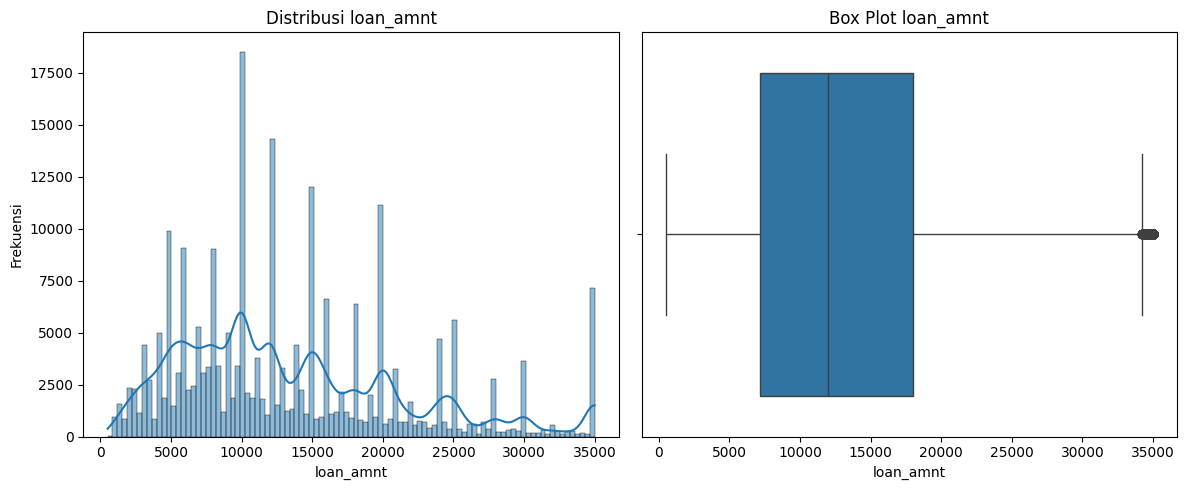


============================== Analisis Univariat Kolom Numerik: funded_amnt ==============================
count    237695.000000
mean      13428.704117
std        8036.706263
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18000.000000
max       35000.000000
Name: funded_amnt, dtype: float64
Skewness: 0.85
Kurtosis: 0.16
Mode: 10000


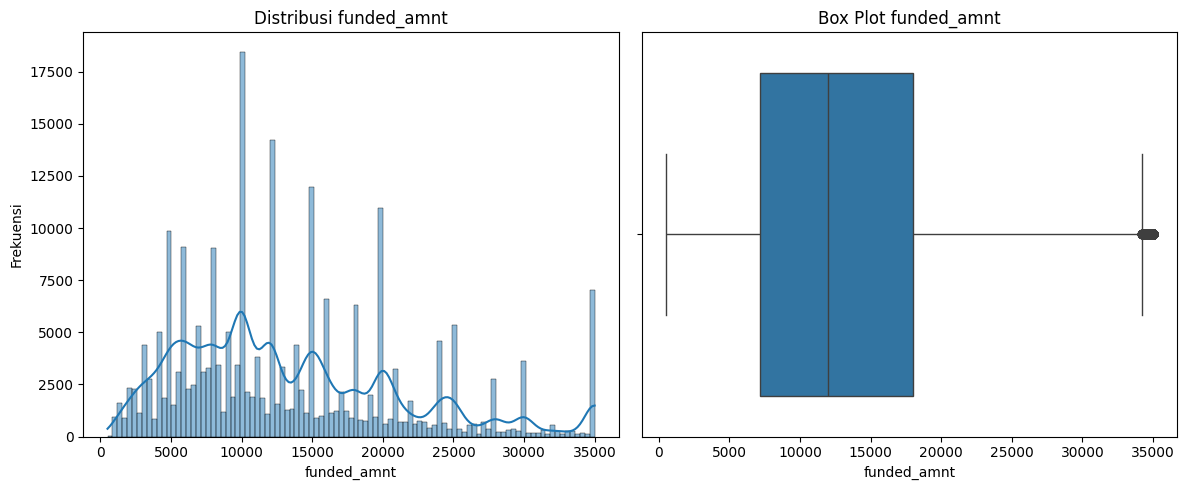


============================== Analisis Univariat Kolom Numerik: funded_amnt_inv ==============================
count    237695.000000
mean      13299.951072
std        8074.666938
min           0.000000
25%        7125.000000
50%       11900.000000
75%       18000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64
Skewness: 0.84
Kurtosis: 0.16
Mode: 10000.0


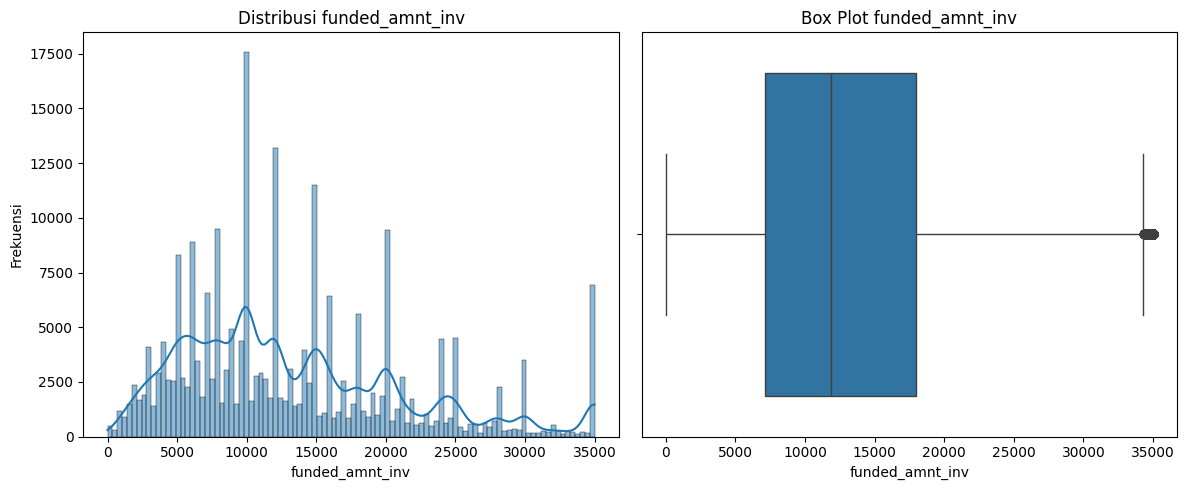


============================== Analisis Univariat Kolom Numerik: int_rate ==============================
count    237695.000000
mean         13.844646
std           4.378830
min           5.420000
25%          10.990000
50%          13.670000
75%          16.590000
max          26.060000
Name: int_rate, dtype: float64
Skewness: 0.32
Kurtosis: -0.29
Mode: 12.12


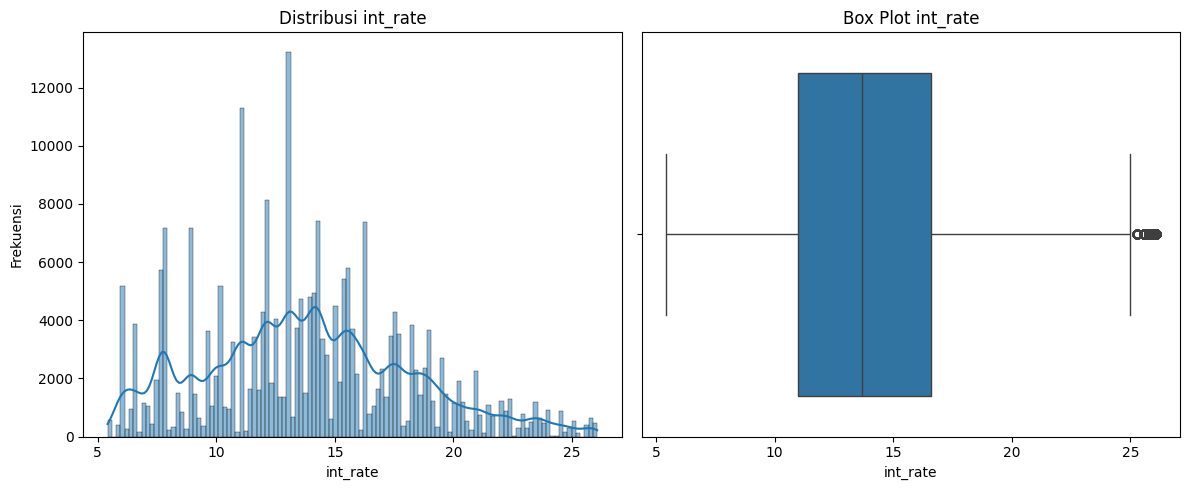


============================== Analisis Univariat Kolom Numerik: installment ==============================
count    237695.000000
mean        416.623498
std         243.631791
min          15.670000
25%         239.180000
50%         365.010000
75%         545.330000
max        1408.130000
Name: installment, dtype: float64
Skewness: 1.01
Kurtosis: 0.96
Mode: 332.72


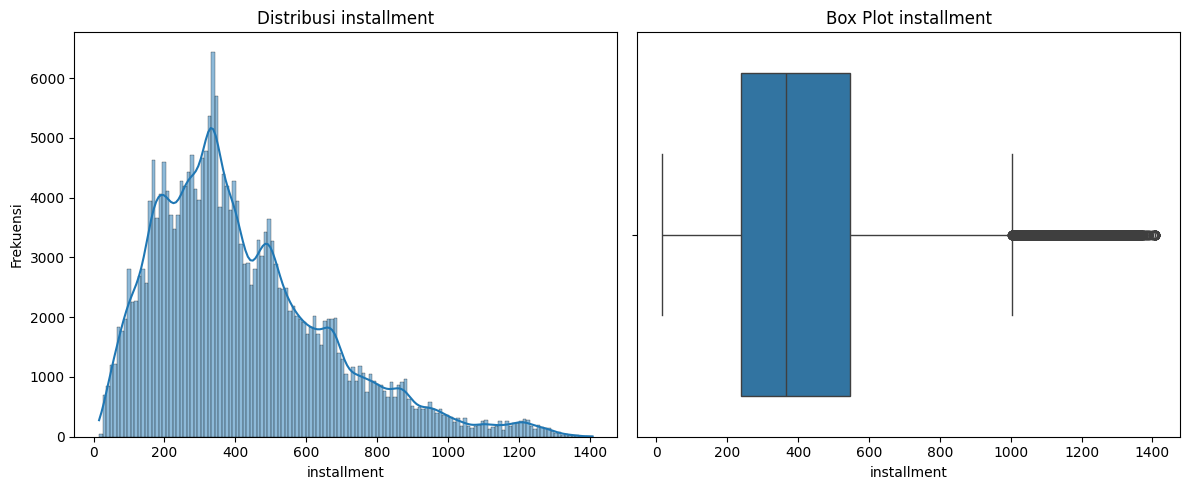


============================== Analisis Univariat Kolom Numerik: annual_inc ==============================
count    2.376950e+05
mean     7.192612e+04
std      5.516306e+04
min      1.896000e+03
25%      4.500000e+04
50%      6.142100e+04
75%      8.600000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64
Skewness: 31.05
Kurtosis: 2979.43
Mode: 60000.0


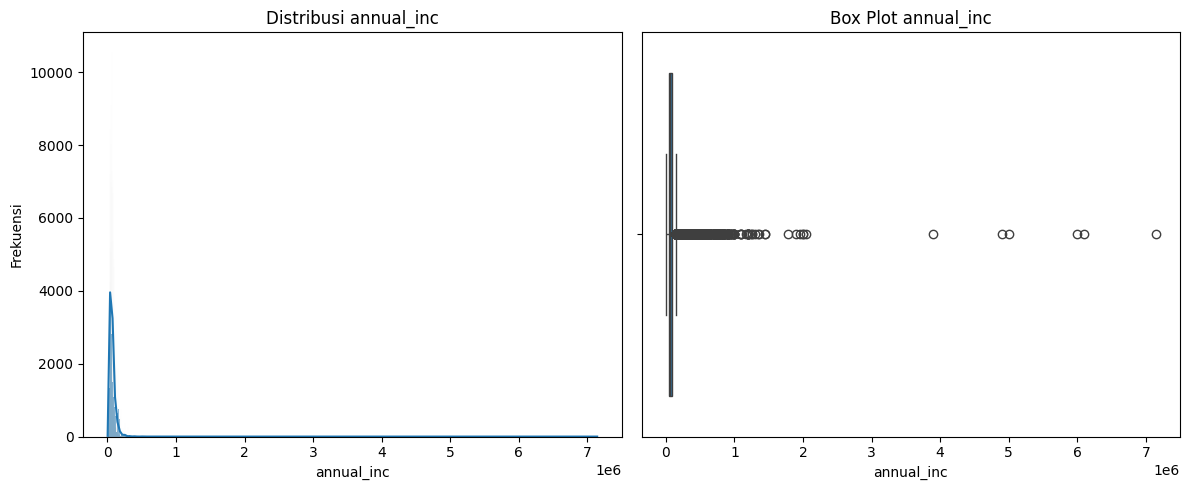


============================== Analisis Univariat Kolom Numerik: dti ==============================
count    237695.000000
mean         16.428473
std           7.694727
min           0.000000
25%          10.710000
50%          16.130000
75%          21.870000
max          39.990000
Name: dti, dtype: float64
Skewness: 0.18
Kurtosis: -0.53
Mode: 0.0


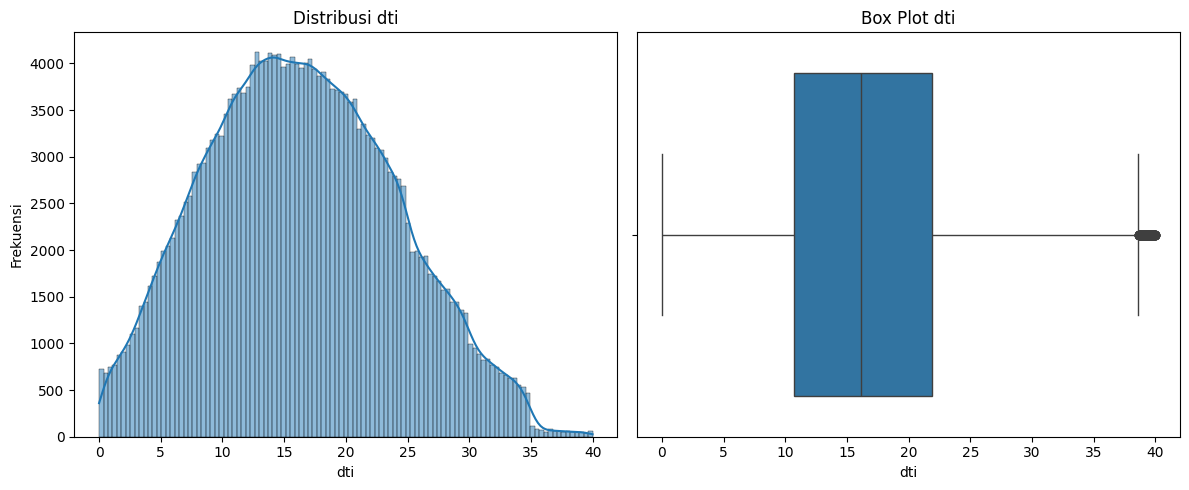


============================== Analisis Univariat Kolom Numerik: delinq_2yrs ==============================
count    237695.000000
mean          0.247266
std           0.733731
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64
Skewness: 5.84
Kurtosis: 67.24
Mode: 0.0


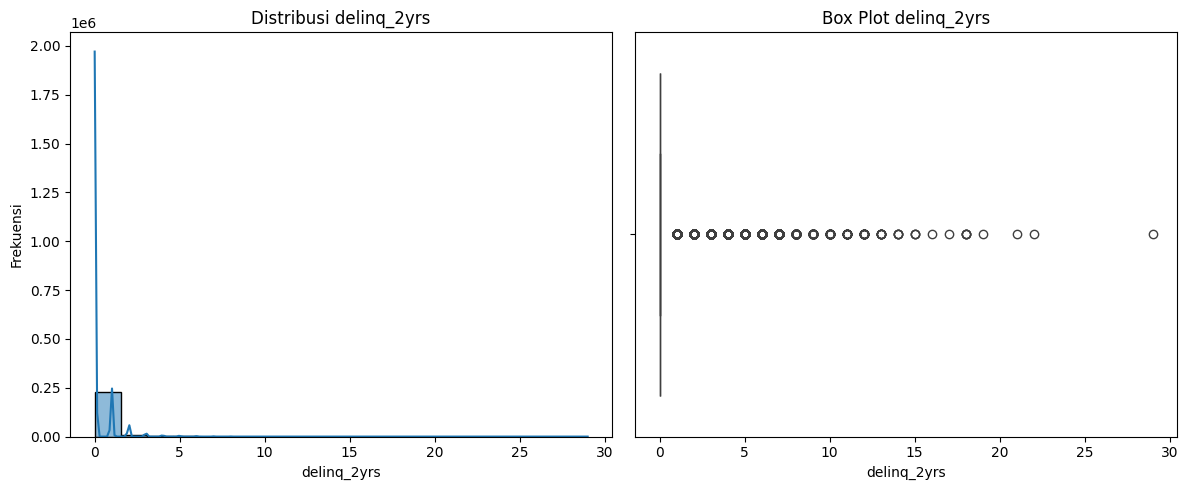


============================== Analisis Univariat Kolom Numerik: inq_last_6mths ==============================
count    237695.000000
mean          0.906881
std           1.173783
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          33.000000
Name: inq_last_6mths, dtype: float64
Skewness: 2.32
Kurtosis: 18.13
Mode: 0.0


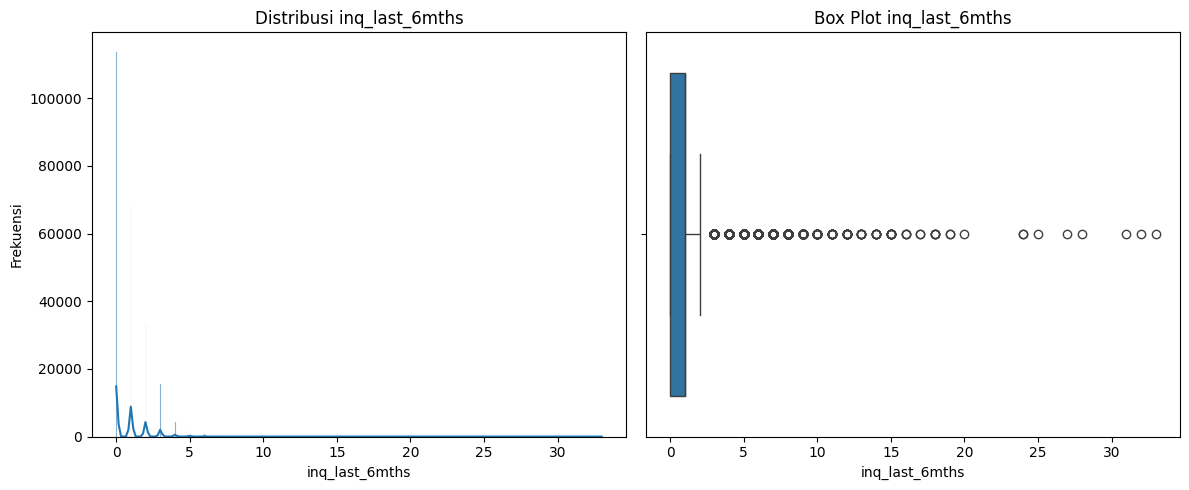


============================== Analisis Univariat Kolom Numerik: open_acc ==============================
count    237695.000000
mean         10.853943
std           4.824864
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          76.000000
Name: open_acc, dtype: float64
Skewness: 1.10
Kurtosis: 2.58
Mode: 9.0


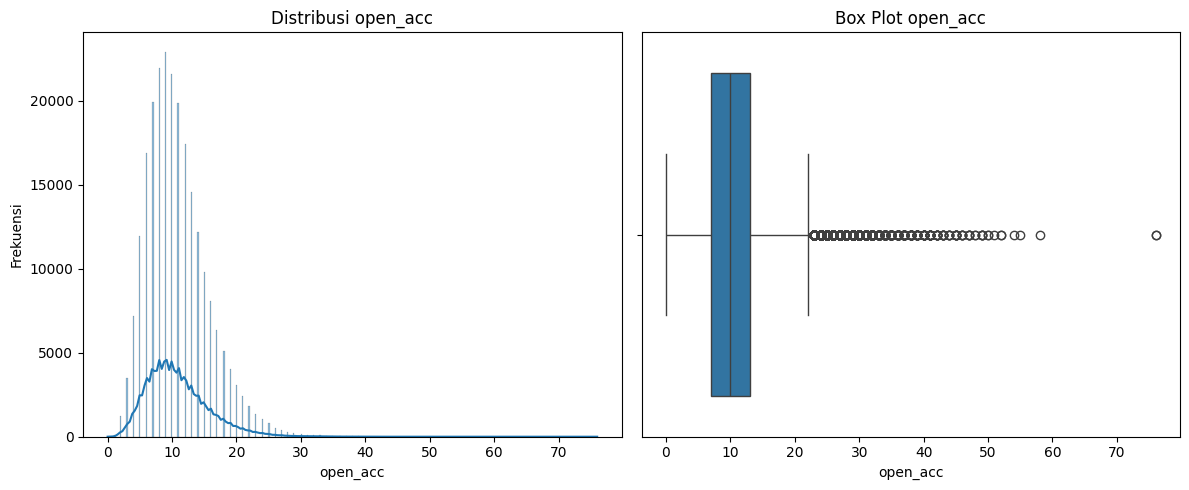


============================== Analisis Univariat Kolom Numerik: pub_rec ==============================
count    237695.000000
mean          0.134551
std           0.420928
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.000000
Name: pub_rec, dtype: float64
Skewness: 4.94
Kurtosis: 45.62
Mode: 0.0


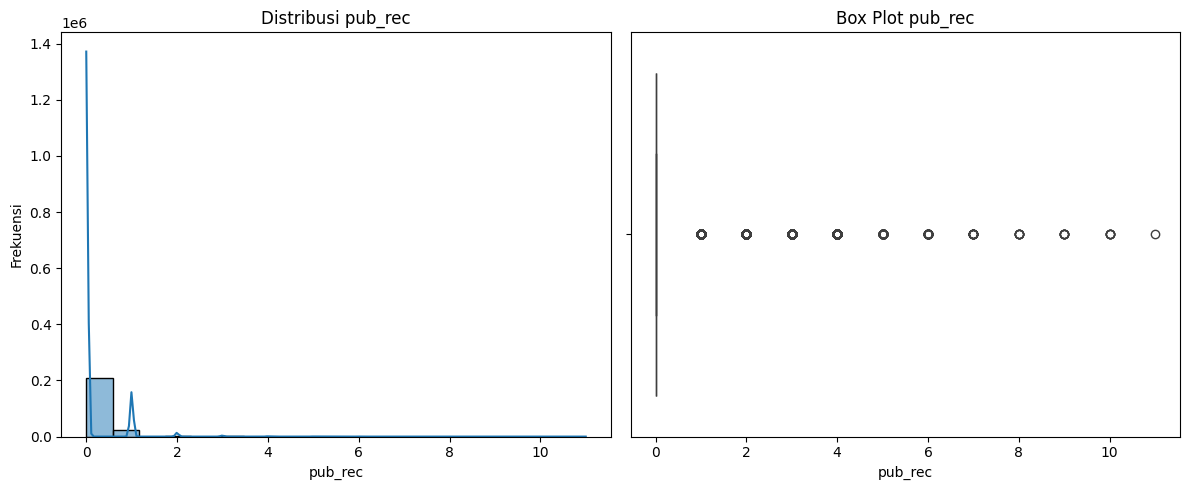


============================== Analisis Univariat Kolom Numerik: revol_bal ==============================
count    2.376950e+05
mean     1.522281e+04
std      1.920837e+04
min      0.000000e+00
25%      5.911000e+03
50%      1.098800e+04
75%      1.906700e+04
max      1.746716e+06
Name: revol_bal, dtype: float64
Skewness: 15.19
Kurtosis: 789.57
Mode: 0


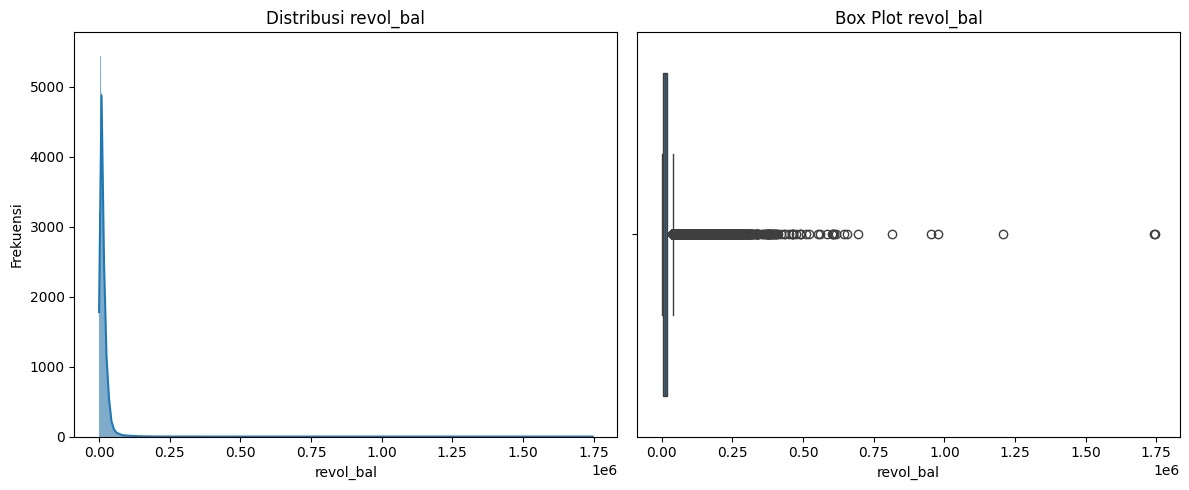


============================== Analisis Univariat Kolom Numerik: revol_util ==============================
count    237695.000000
mean         54.971841
std          24.667995
min           0.000000
25%          37.200000
50%          56.600000
75%          74.400000
max         892.300000
Name: revol_util, dtype: float64
Skewness: -0.10
Kurtosis: 4.83
Mode: 0.0


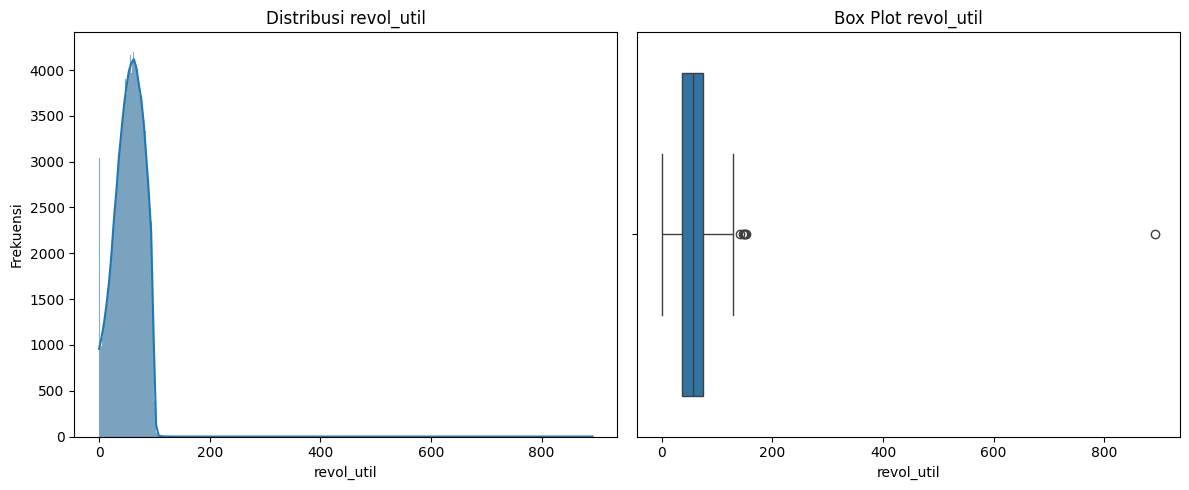


============================== Analisis Univariat Kolom Numerik: total_acc ==============================
count    237695.000000
mean         24.807181
std          11.662542
min           1.000000
25%          16.000000
50%          23.000000
75%          32.000000
max         150.000000
Name: total_acc, dtype: float64
Skewness: 0.79
Kurtosis: 0.78
Mode: 21.0


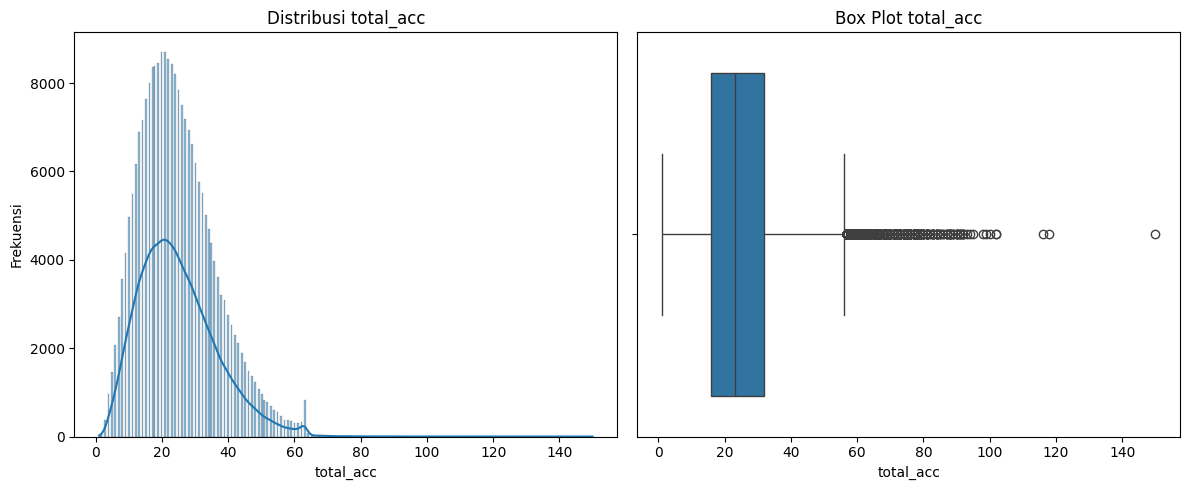


============================== Analisis Univariat Kolom Numerik: out_prncp ==============================
count    237695.000000
mean        328.398096
std        2186.834678
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       32160.380000
Name: out_prncp, dtype: float64
Skewness: 8.22
Kurtosis: 76.06
Mode: 0.0


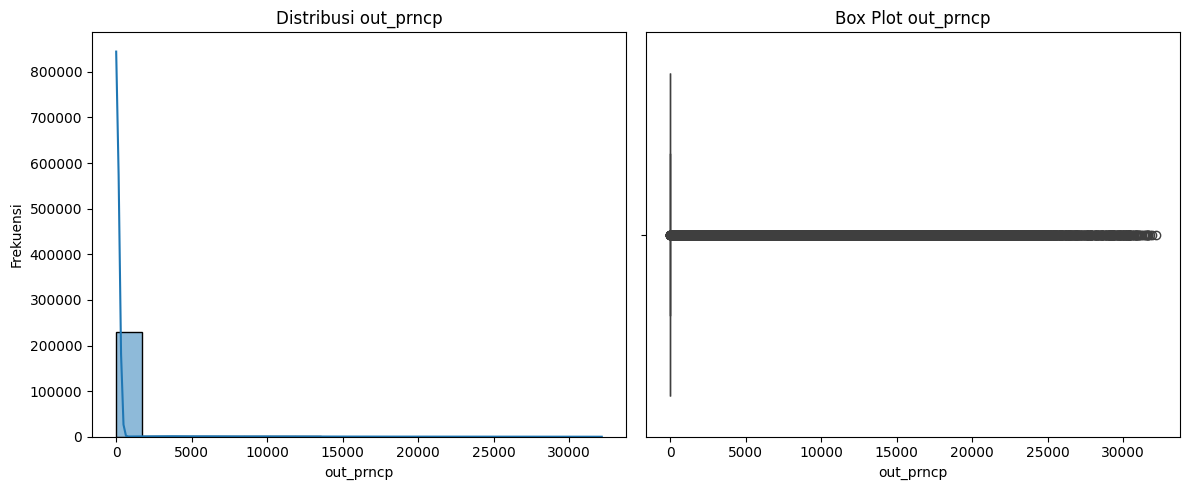


============================== Analisis Univariat Kolom Numerik: out_prncp_inv ==============================
count    237695.000000
mean        328.288404
std        2186.195130
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       32160.380000
Name: out_prncp_inv, dtype: float64
Skewness: 8.22
Kurtosis: 76.08
Mode: 0.0


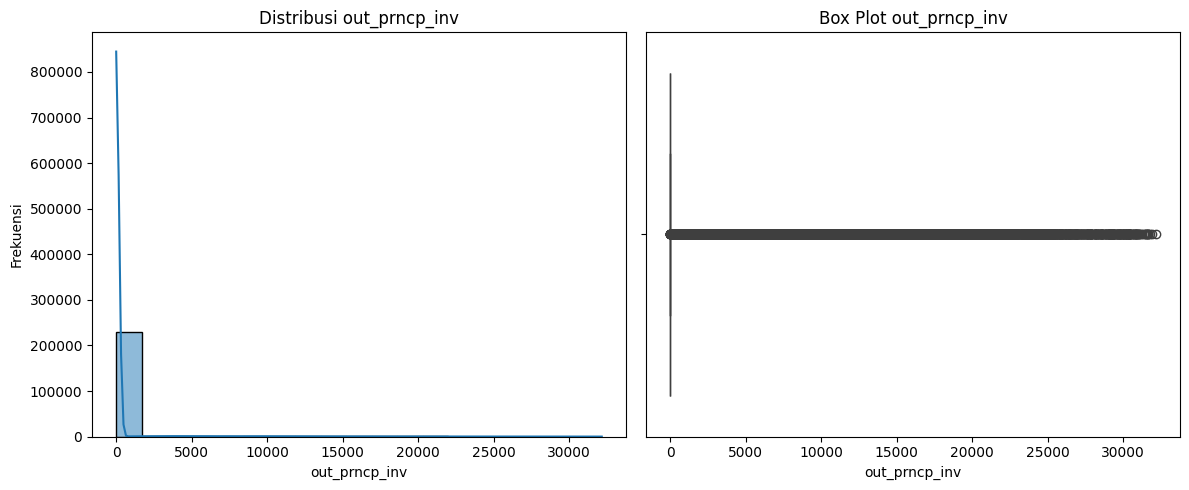


============================== Analisis Univariat Kolom Numerik: total_rec_prncp ==============================
count    237695.00000
mean      11107.76574
std        8162.54337
min           0.00000
25%        4927.27500
50%        9750.00000
75%       15250.00000
max       35000.03000
Name: total_rec_prncp, dtype: float64
Skewness: 0.97
Kurtosis: 0.46
Mode: 10000.0


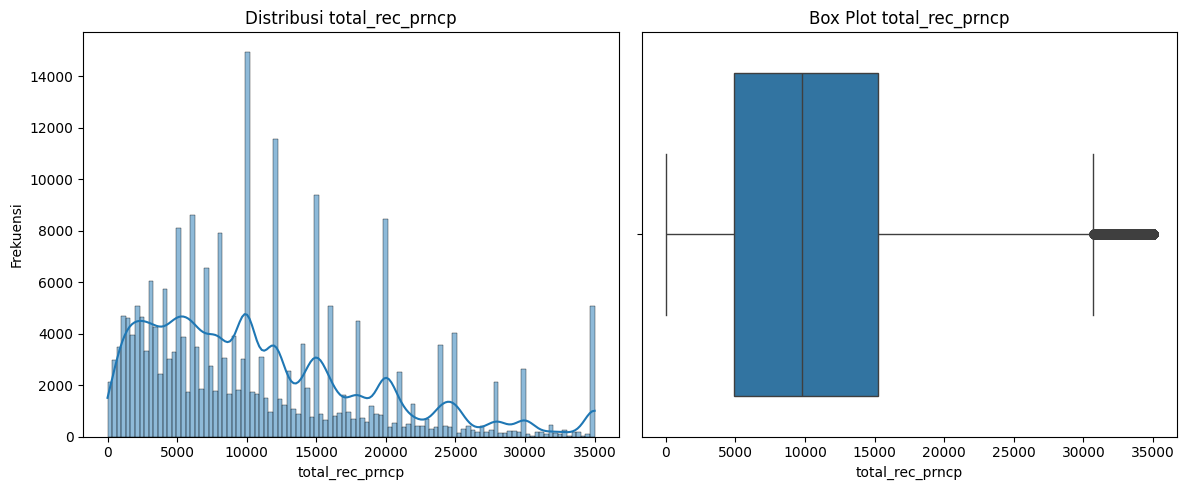


============================== Analisis Univariat Kolom Numerik: total_rec_int ==============================
count    237695.000000
mean       2124.180394
std        2153.943862
min           0.000000
25%         743.845000
50%        1462.590000
75%        2696.590000
max       22777.580000
Name: total_rec_int, dtype: float64
Skewness: 2.51
Kurtosis: 9.07
Mode: 0.0


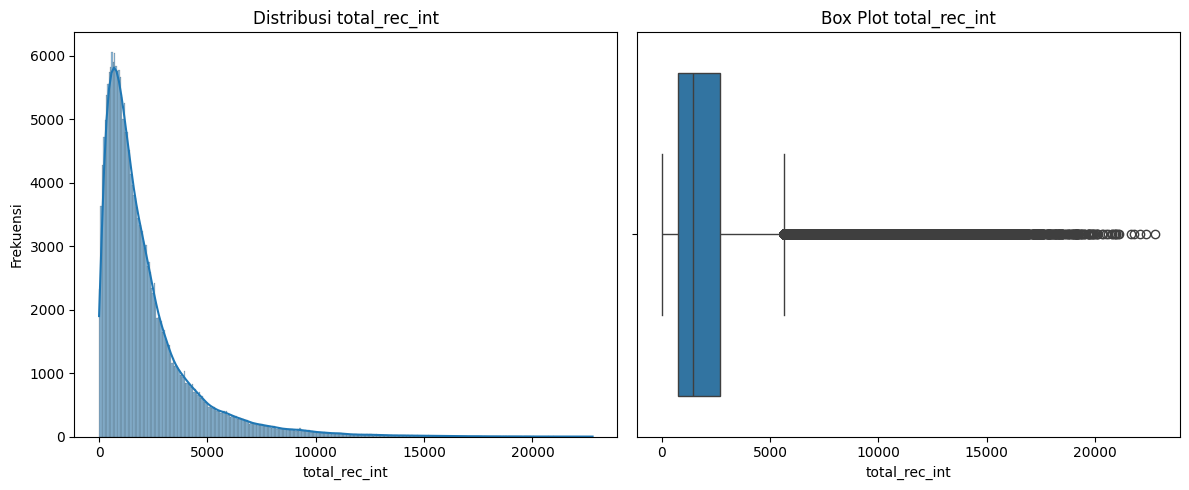


============================== Analisis Univariat Kolom Numerik: total_rec_late_fee ==============================
count    237695.000000
mean          0.922284
std           6.269179
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64
Skewness: 11.76
Kurtosis: 244.17
Mode: 0.0


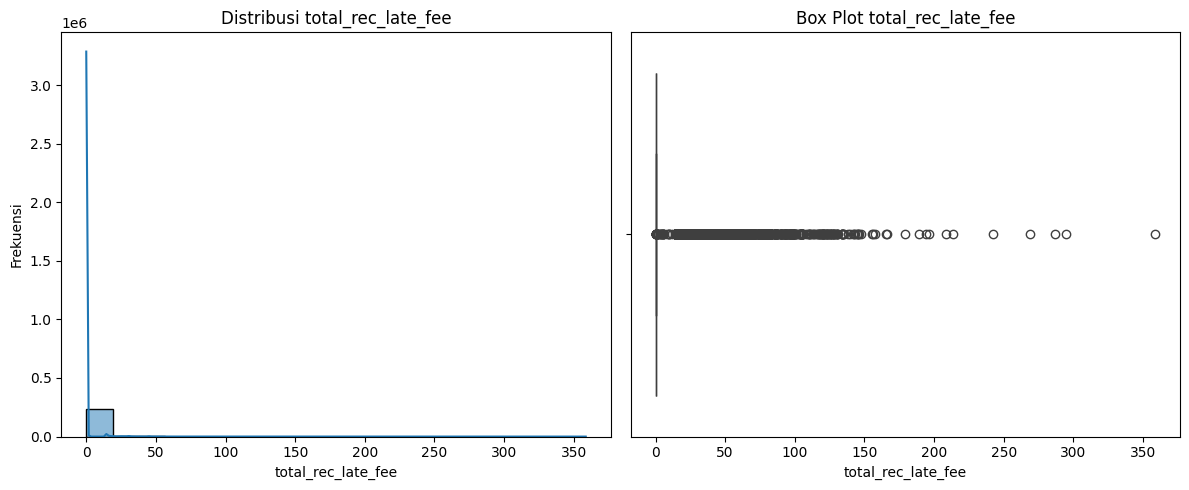


============================== Analisis Univariat Kolom Numerik: recoveries ==============================
count    237695.000000
mean        167.419279
std         764.502771
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       33520.270000
Name: recoveries, dtype: float64
Skewness: 9.40
Kurtosis: 170.75
Mode: 0.0


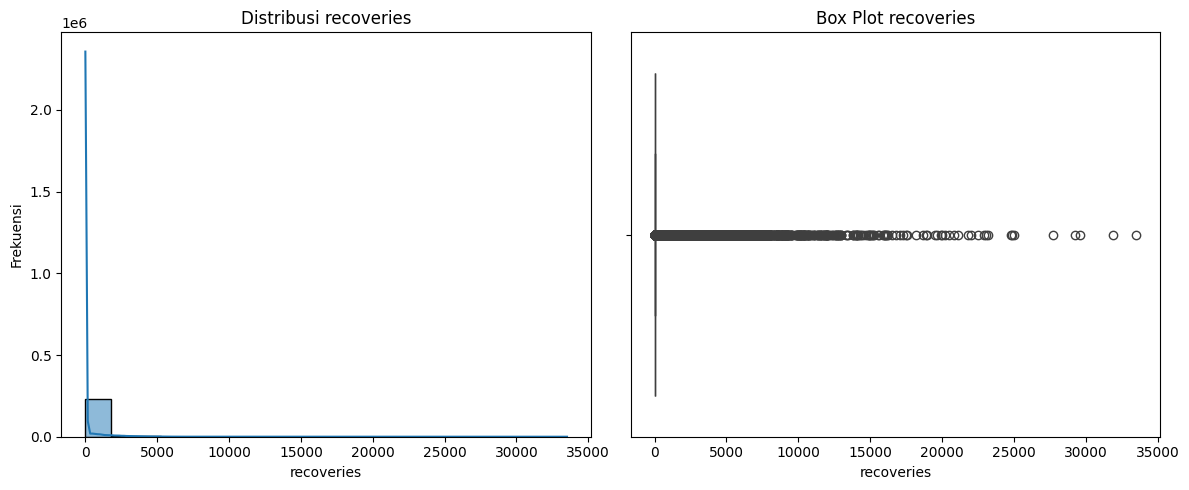


============================== Analisis Univariat Kolom Numerik: collection_recovery_fee ==============================
count    237695.000000
mean         17.579793
std         119.105531
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        7002.190000
Name: collection_recovery_fee, dtype: float64
Skewness: 15.91
Kurtosis: 484.95
Mode: 0.0


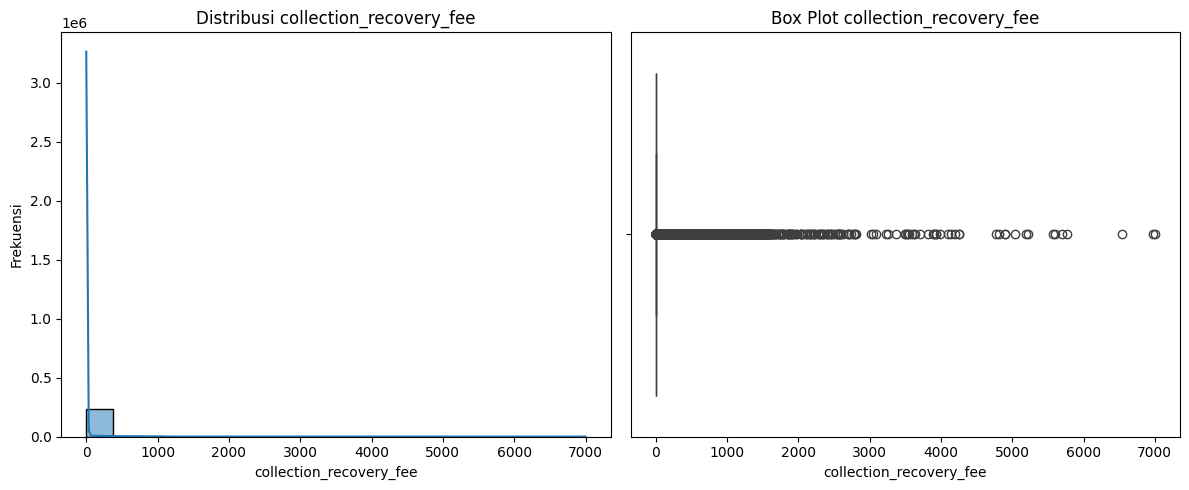


============================== Analisis Univariat Kolom Numerik: collections_12_mths_ex_med ==============================
count    237695.000000
mean          0.005856
std           0.082857
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: collections_12_mths_ex_med, dtype: float64
Skewness: 17.58
Kurtosis: 462.95
Mode: 0.0


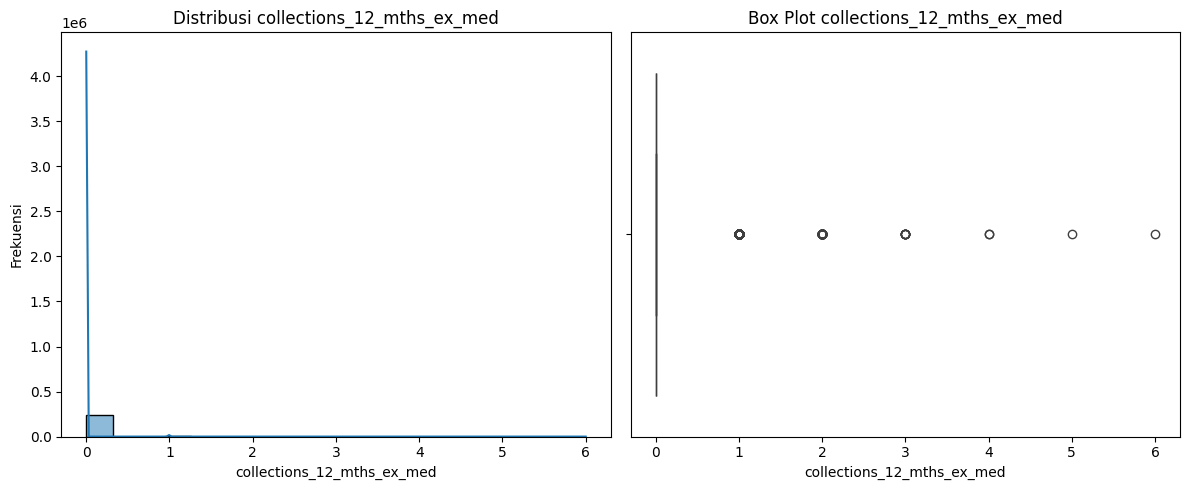


============================== Analisis Univariat Kolom Numerik: acc_now_delinq ==============================
count    237695.000000
mean          0.002886
std           0.058449
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: acc_now_delinq, dtype: float64
Skewness: 25.81
Kurtosis: 1007.75
Mode: 0.0


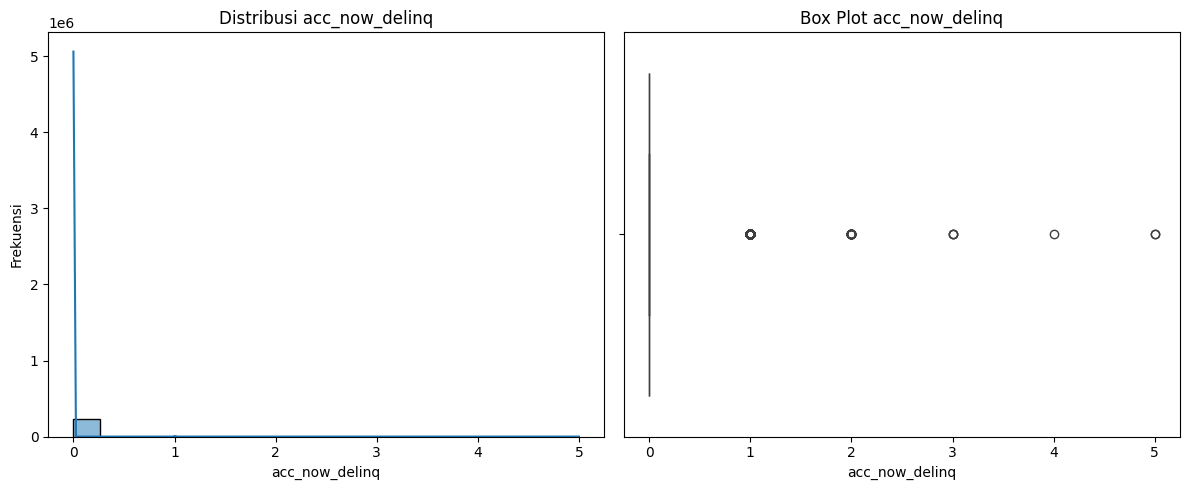


============================== Analisis Univariat Kolom Numerik: tot_coll_amt ==============================
count    2.376950e+05
mean     1.445875e+02
std      1.882389e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.152545e+06
Name: tot_coll_amt, dtype: float64
Skewness: 483.60
Kurtosis: 235120.32
Mode: 0.0


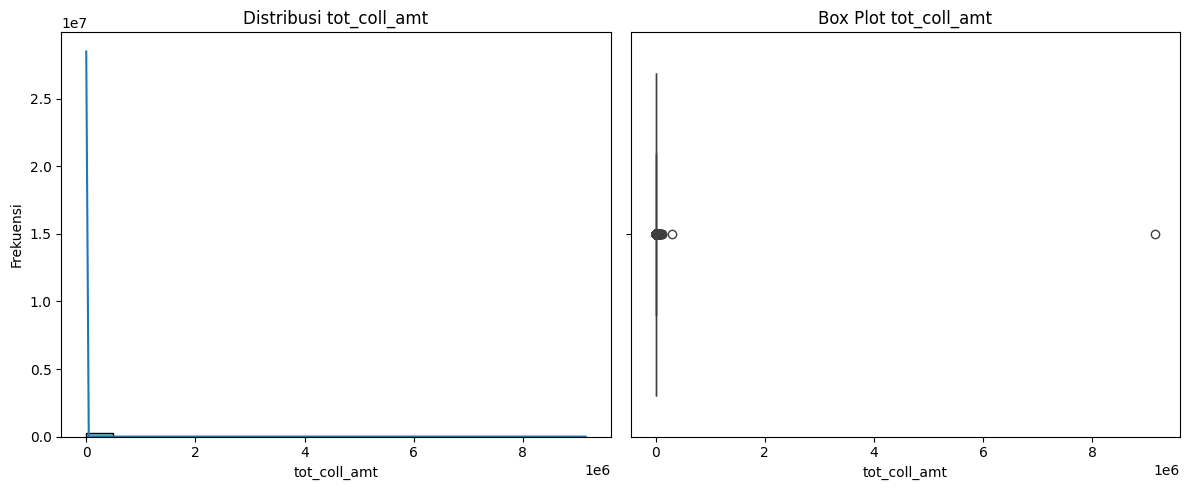


============================== Analisis Univariat Kolom Numerik: tot_cur_bal ==============================
count    2.376950e+05
mean     1.205340e+05
std      1.300272e+05
min      0.000000e+00
25%      3.974250e+04
50%      7.928900e+04
75%      1.568880e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64
Skewness: 4.17
Kurtosis: 86.34
Mode: 79289.0


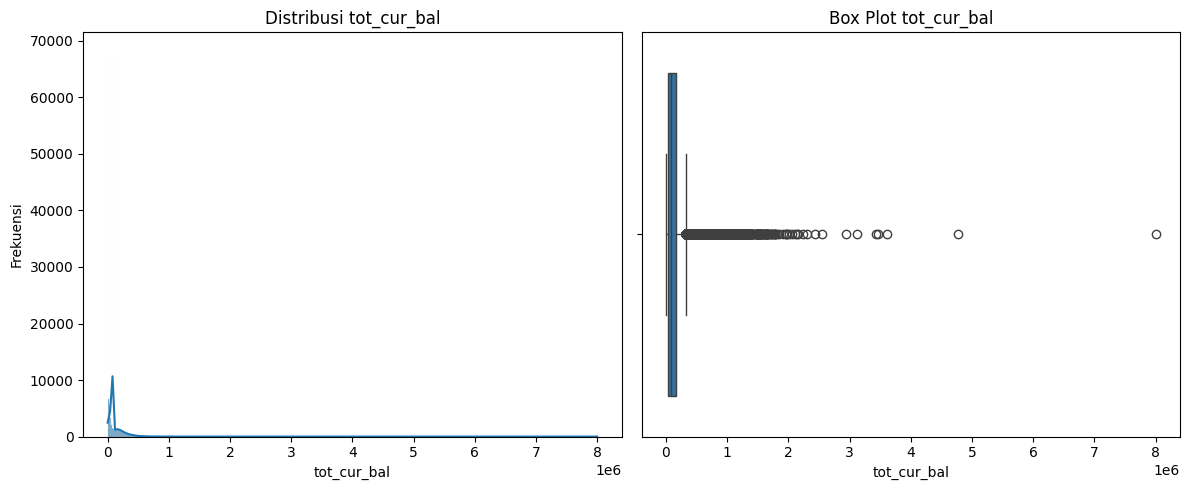


============================== Analisis Univariat Kolom Numerik: total_rev_hi_lim ==============================
count    2.376950e+05
mean     2.712498e+04
std      2.444518e+04
min      0.000000e+00
25%      1.640000e+04
50%      2.200000e+04
75%      2.940000e+04
max      2.013133e+06
Name: total_rev_hi_lim, dtype: float64
Skewness: 10.54
Kurtosis: 459.16
Mode: 22000.0


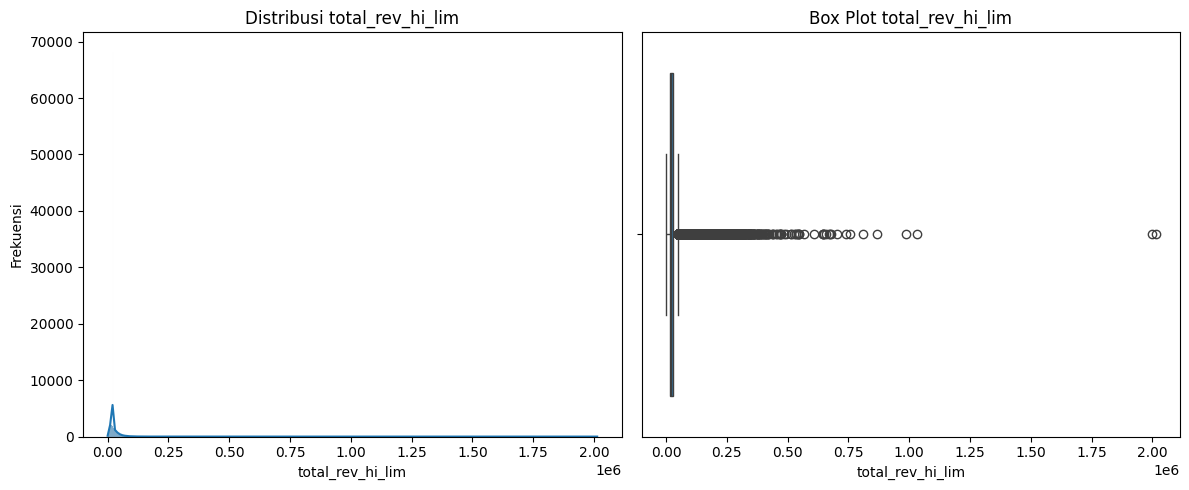


============================== Analisis Univariat Kolom Numerik: tot_coll_amt_missing_indicator ==============================
count    237695.000000
mean          0.280174
std           0.449085
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: tot_coll_amt_missing_indicator, dtype: float64
Skewness: 0.98
Kurtosis: -1.04
Mode: 0


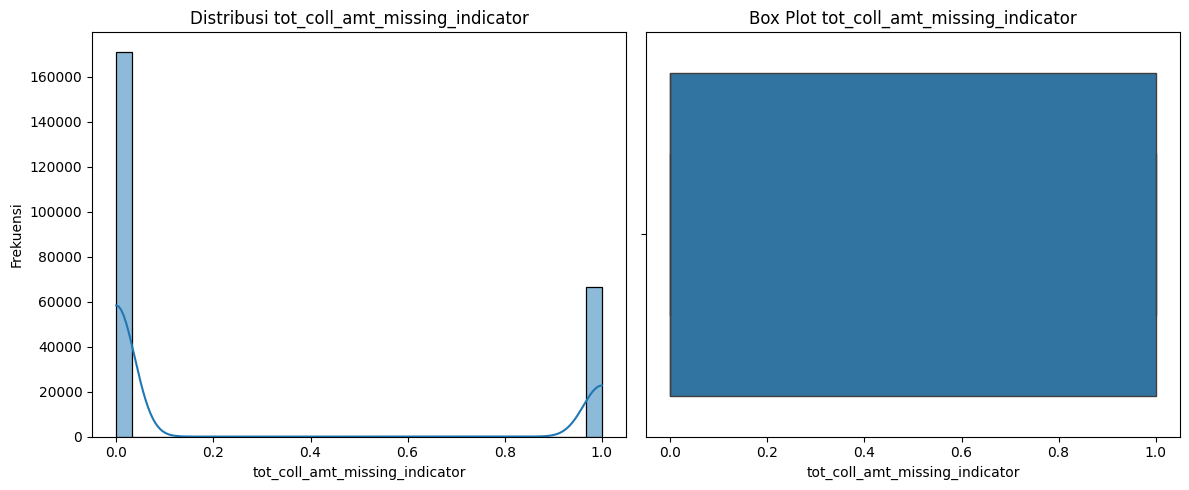


============================== Analisis Univariat Kolom Numerik: tot_cur_bal_missing_indicator ==============================
count    237695.000000
mean          0.280174
std           0.449085
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: tot_cur_bal_missing_indicator, dtype: float64
Skewness: 0.98
Kurtosis: -1.04
Mode: 0


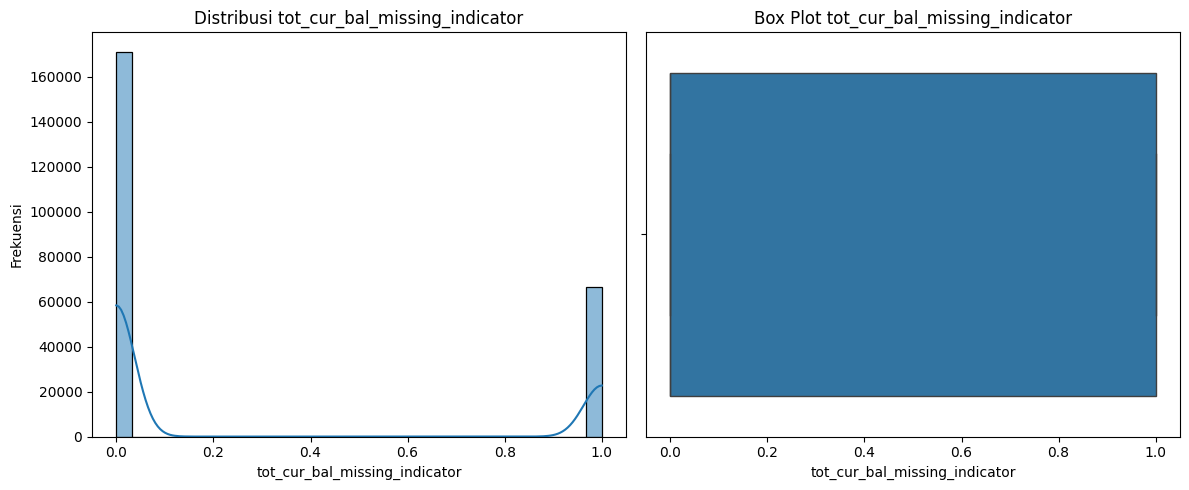


============================== Analisis Univariat Kolom Numerik: total_rev_hi_lim_missing_indicator ==============================
count    237695.000000
mean          0.280174
std           0.449085
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: total_rev_hi_lim_missing_indicator, dtype: float64
Skewness: 0.98
Kurtosis: -1.04
Mode: 0


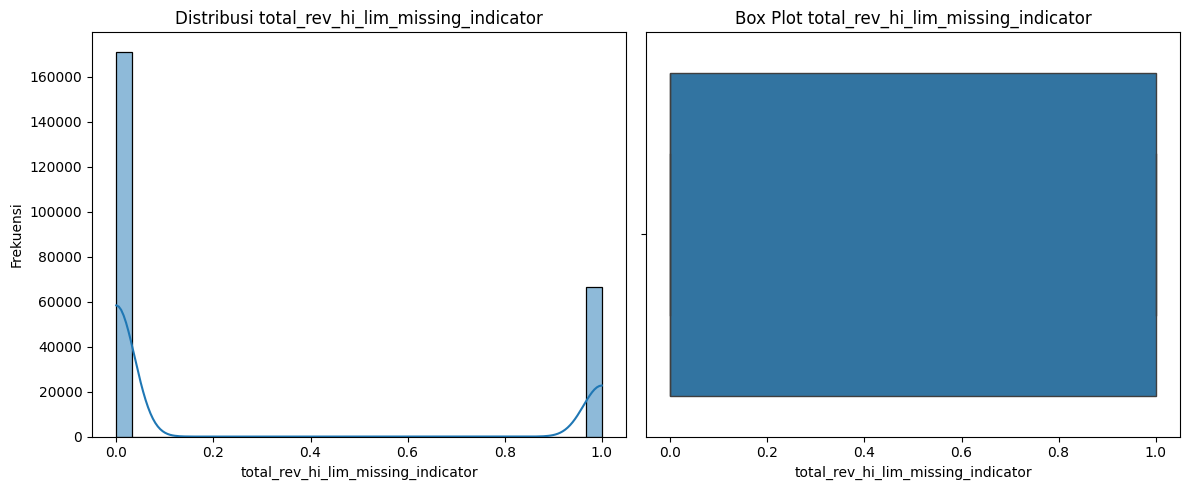

In [19]:
for col in numeric_features:
    print(f"\n{'='*30} Analisis Univariat Kolom Numerik: {col} {'='*30}")
    print(df[col].describe())
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurt():.2f}")
    print(f"Mode: {df[col].mode().iloc[0] if not df[col].mode().empty else None}") # Menampilkan mode pertama jika ada

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

Berdasarkan boxplot di atas, outlier tidak disebabkan oleh kesalahan input (human error). Oleh karena itu, kita tidak disarankan menghapus data outlier, karena dapat menyebabkan hilangnya informasi atau insight yang berharga. Untuk mengatasi hal tersebut digunakanlah standarisasi 

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


============================== Analisis Univariat Kolom Numerik: loan_amnt ==============================
count    2.376950e+05
mean     6.552555e-17
std      1.000002e+00
min     -1.609435e+00
25%     -7.783173e-01
50%     -1.828898e-01
75%      5.613946e-01
max      2.670200e+00
Name: loan_amnt, dtype: float64
Skewness: 0.84
Kurtosis: 0.14
Mode: -0.4309846119686509


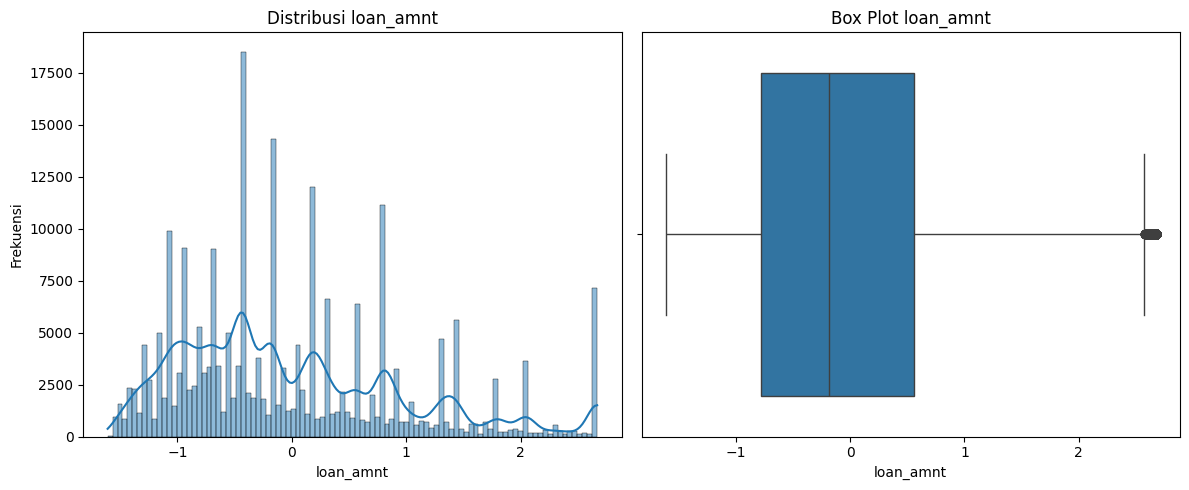


============================== Analisis Univariat Kolom Numerik: funded_amnt ==============================
count    2.376950e+05
mean     4.268727e-17
std      1.000002e+00
min     -1.608710e+00
25%     -7.750336e-01
50%     -1.777727e-01
75%      5.688034e-01
max      2.684102e+00
Name: funded_amnt, dtype: float64
Skewness: 0.85
Kurtosis: 0.16
Mode: -0.4266314105202221


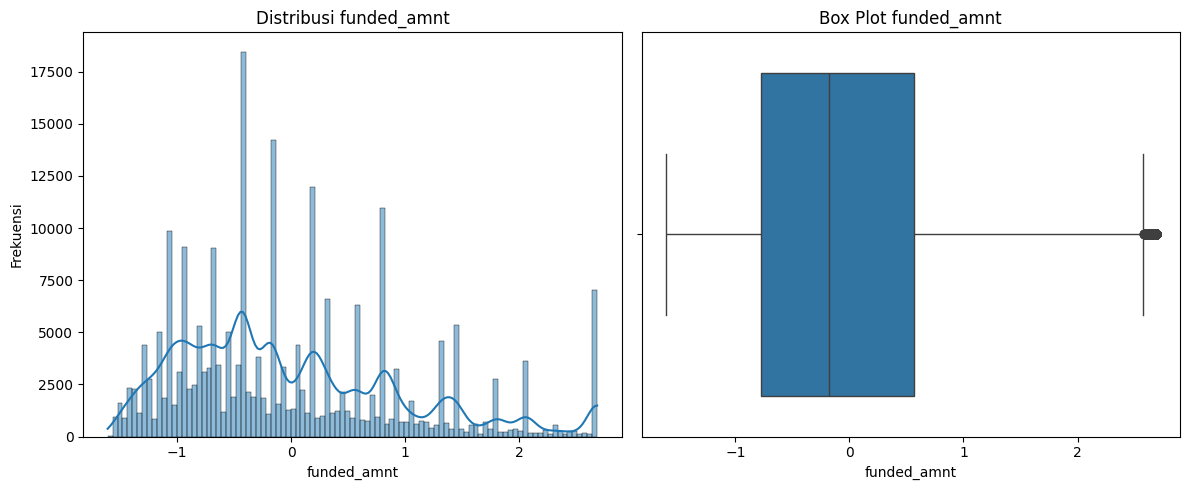


============================== Analisis Univariat Kolom Numerik: funded_amnt_inv ==============================
count    2.376950e+05
mean    -1.488674e-16
std      1.000002e+00
min     -1.647124e+00
25%     -7.647330e-01
50%     -1.733761e-01
75%      5.820746e-01
max      2.687429e+00
Name: funded_amnt_inv, dtype: float64
Skewness: 0.84
Kurtosis: 0.16
Mode: -0.4086803876091835


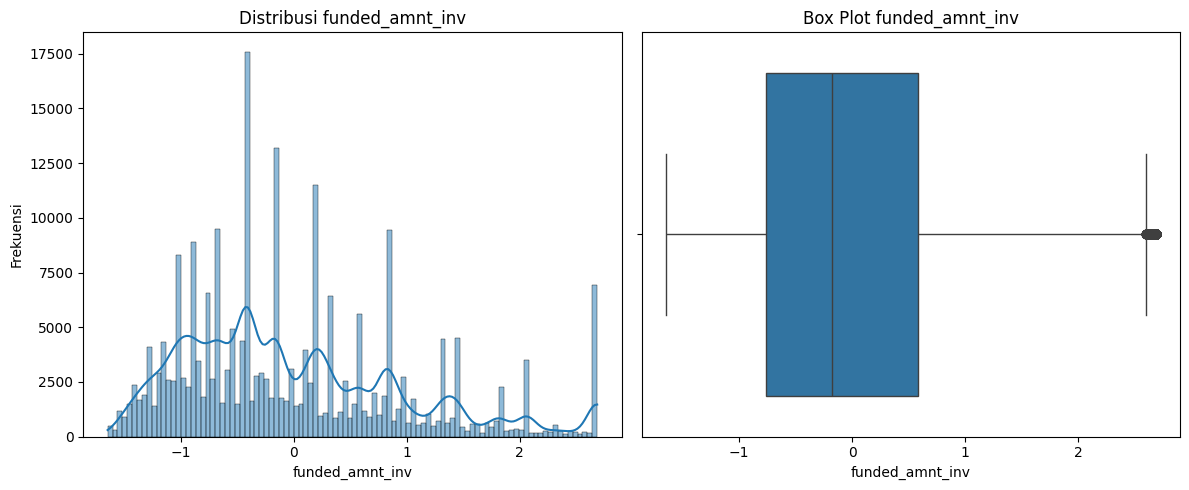


============================== Analisis Univariat Kolom Numerik: int_rate ==============================
count    2.376950e+05
mean    -8.051094e-16
std      1.000002e+00
min     -1.923953e+00
25%     -6.519211e-01
50%     -3.988419e-02
75%      6.269620e-01
max      2.789645e+00
Name: int_rate, dtype: float64
Skewness: 0.32
Kurtosis: -0.29
Mode: -0.39386077011128334


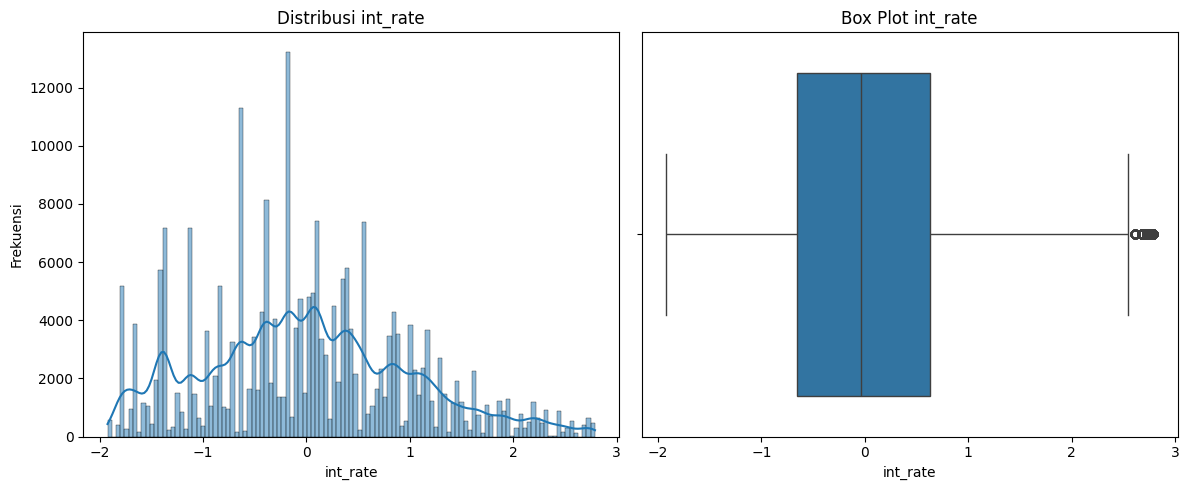


============================== Analisis Univariat Kolom Numerik: installment ==============================
count    2.376950e+05
mean     9.500010e-17
std      1.000002e+00
min     -1.645739e+00
25%     -7.283281e-01
50%     -2.118509e-01
75%      5.282840e-01
max      4.069701e+00
Name: installment, dtype: float64
Skewness: 1.01
Kurtosis: 0.96
Mode: -0.3443872147268432


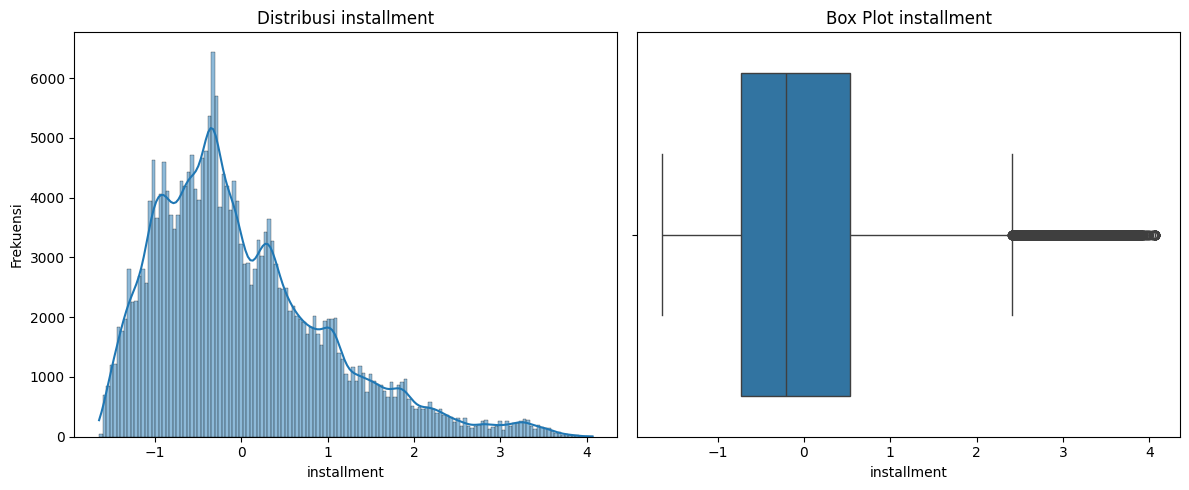


============================== Analisis Univariat Kolom Numerik: annual_inc ==============================
count    2.376950e+05
mean     5.542171e-17
std      1.000002e+00
min     -1.269514e+00
25%     -4.881197e-01
50%     -1.904380e-01
75%      2.551329e-01
max      1.281631e+02
Name: annual_inc, dtype: float64
Skewness: 31.05
Kurtosis: 2979.43
Mode: -0.21619800598791783


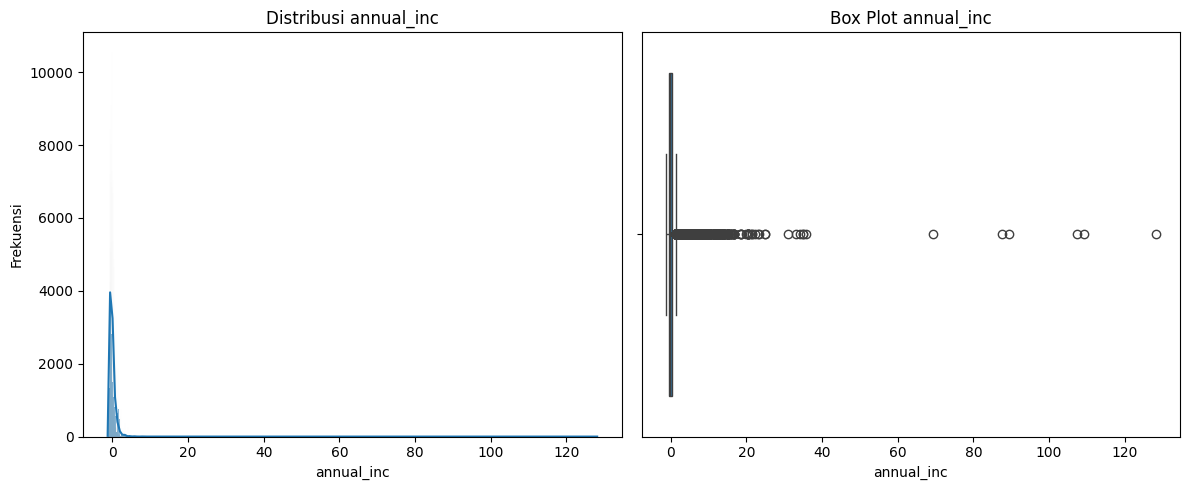


============================== Analisis Univariat Kolom Numerik: dti ==============================
count    2.376950e+05
mean     3.790064e-17
std      1.000002e+00
min     -2.135034e+00
25%     -7.431693e-01
50%     -3.878931e-02
75%      7.071777e-01
max      3.062042e+00
Name: dti, dtype: float64
Skewness: 0.18
Kurtosis: -0.53
Mode: -2.1350344529087515


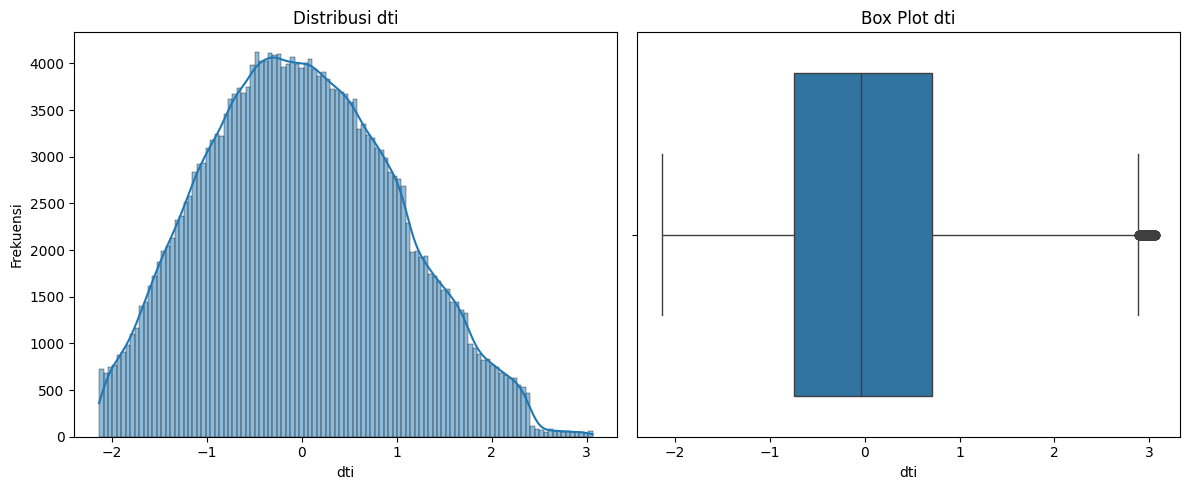


============================== Analisis Univariat Kolom Numerik: delinq_2yrs ==============================
count    2.376950e+05
mean     3.530369e-17
std      1.000002e+00
min     -3.369996e-01
25%     -3.369996e-01
50%     -3.369996e-01
75%     -3.369996e-01
max      3.918711e+01
Name: delinq_2yrs, dtype: float64
Skewness: 5.84
Kurtosis: 67.24
Mode: -0.3369995734215198


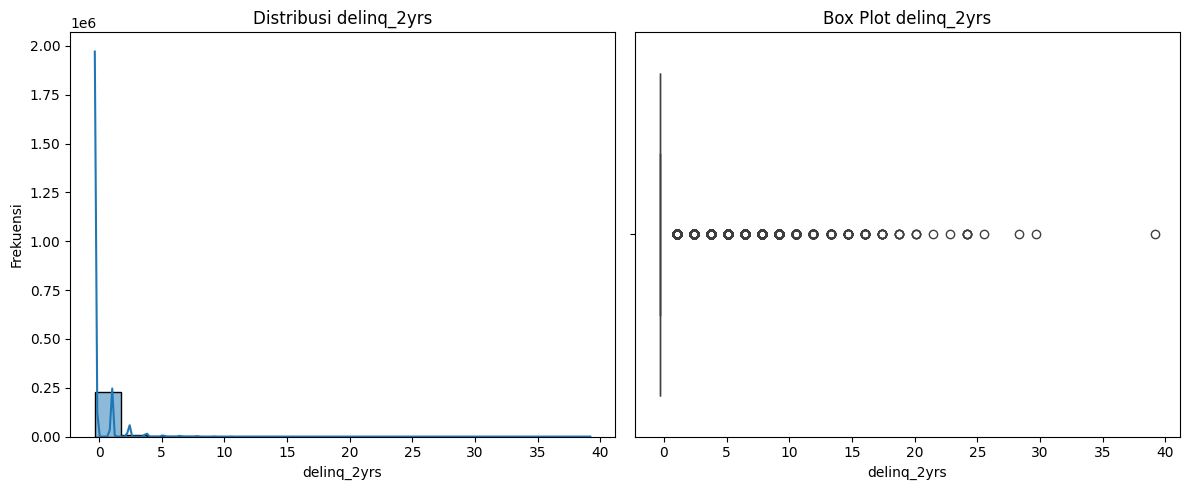


============================== Analisis Univariat Kolom Numerik: inq_last_6mths ==============================
count    2.376950e+05
mean    -2.609663e-17
std      1.000002e+00
min     -7.726151e-01
25%     -7.726151e-01
50%      7.933282e-02
75%      7.933282e-02
max      2.734167e+01
Name: inq_last_6mths, dtype: float64
Skewness: 2.32
Kurtosis: 18.13
Mode: -0.7726151193249889


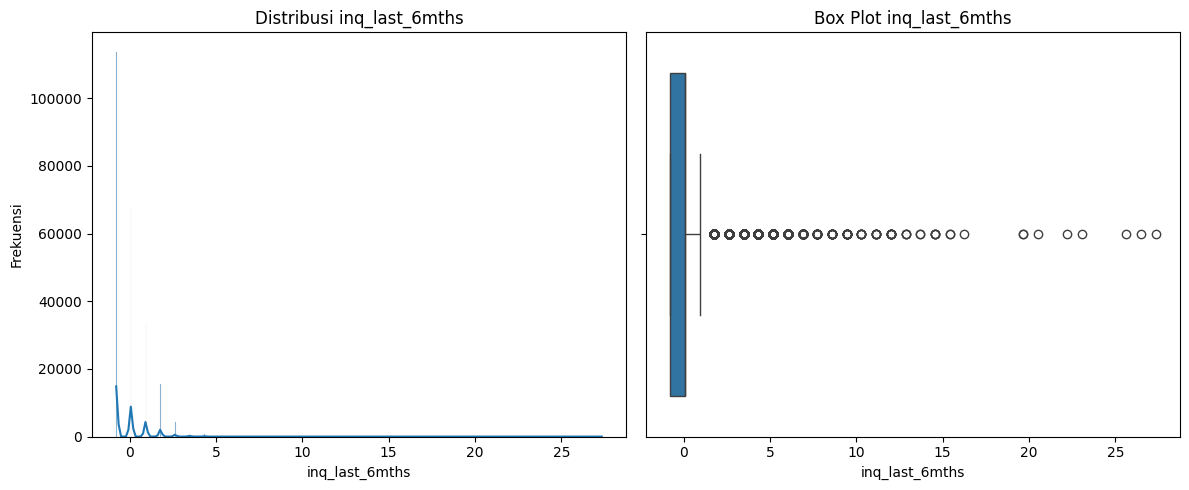


============================== Analisis Univariat Kolom Numerik: open_acc ==============================
count    2.376950e+05
mean     8.500835e-17
std      1.000002e+00
min     -2.249590e+00
25%     -7.987689e-01
50%     -1.769884e-01
75%      4.447921e-01
max      1.350218e+01
Name: open_acc, dtype: float64
Skewness: 1.10
Kurtosis: 2.58
Mode: -0.38424856685824027


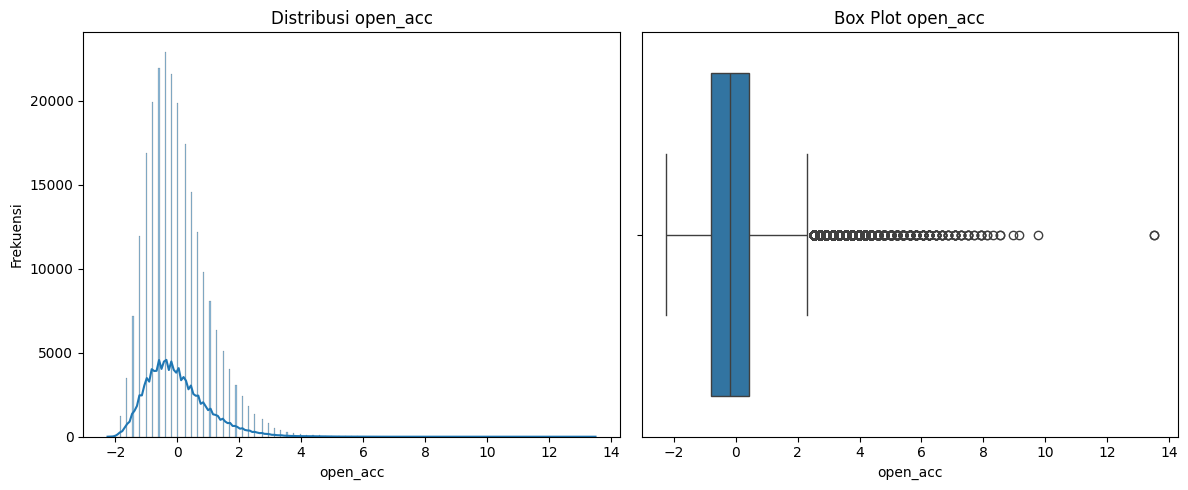


============================== Analisis Univariat Kolom Numerik: pub_rec ==============================
count    2.376950e+05
mean     3.322612e-17
std      1.000002e+00
min     -3.196526e-01
25%     -3.196526e-01
50%     -3.196526e-01
75%     -3.196526e-01
max      2.581311e+01
Name: pub_rec, dtype: float64
Skewness: 4.94
Kurtosis: 45.62
Mode: -0.3196525748895499


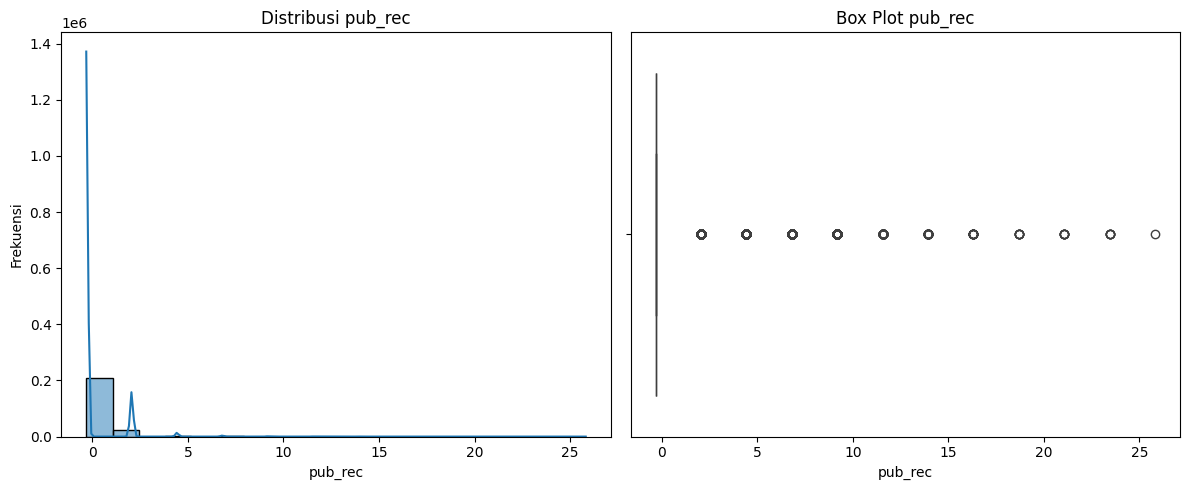


============================== Analisis Univariat Kolom Numerik: revol_bal ==============================
count    2.376950e+05
mean     3.522895e-17
std      1.000002e+00
min     -7.925108e-01
25%     -4.847797e-01
50%     -2.204674e-01
75%      2.001314e-01
max      9.014282e+01
Name: revol_bal, dtype: float64
Skewness: 15.19
Kurtosis: 789.57
Mode: -0.7925107797246528


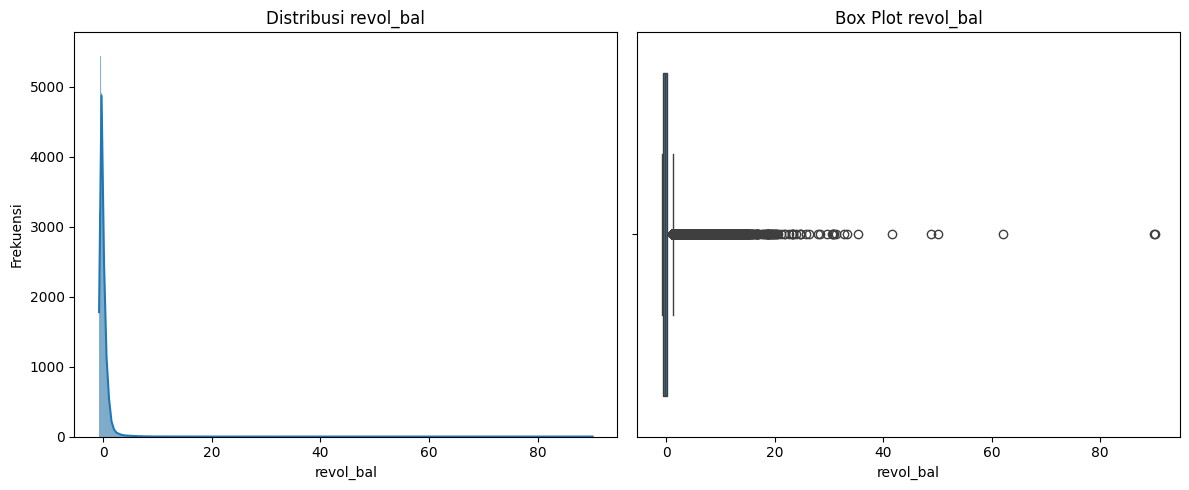


============================== Analisis Univariat Kolom Numerik: revol_util ==============================
count    2.376950e+05
mean     1.901198e-16
std      1.000002e+00
min     -2.228473e+00
25%     -7.204428e-01
50%      6.600304e-02
75%      7.875873e-01
max      3.394398e+01
Name: revol_util, dtype: float64
Skewness: -0.10
Kurtosis: 4.83
Mode: -2.228472833186354


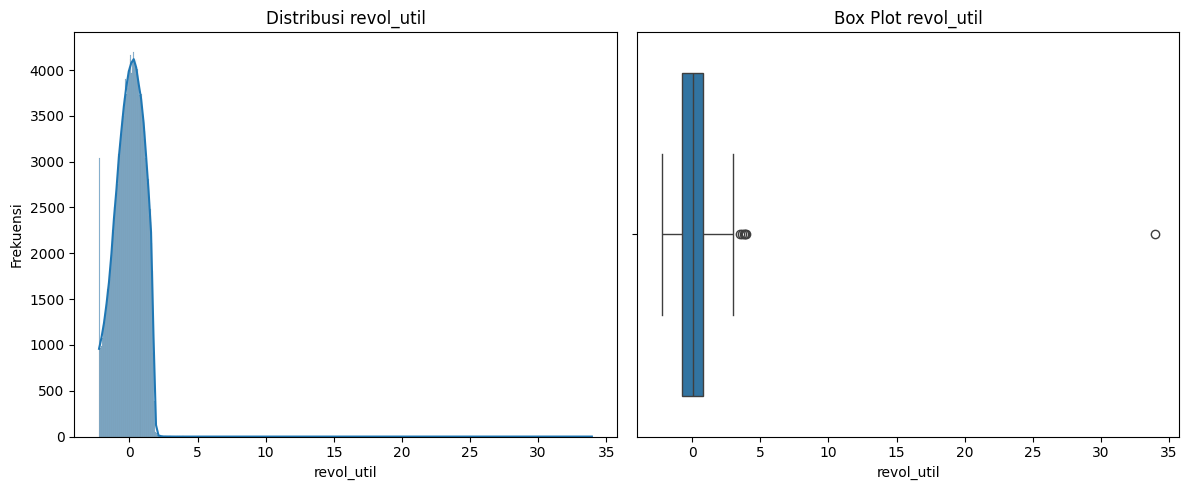


============================== Analisis Univariat Kolom Numerik: total_acc ==============================
count    2.376950e+05
mean     2.866743e-17
std      1.000002e+00
min     -2.041341e+00
25%     -7.551698e-01
50%     -1.549564e-01
75%      6.167466e-01
max      1.073463e+01
Name: total_acc, dtype: float64
Skewness: 0.79
Kurtosis: 0.78
Mode: -0.3264459271629527


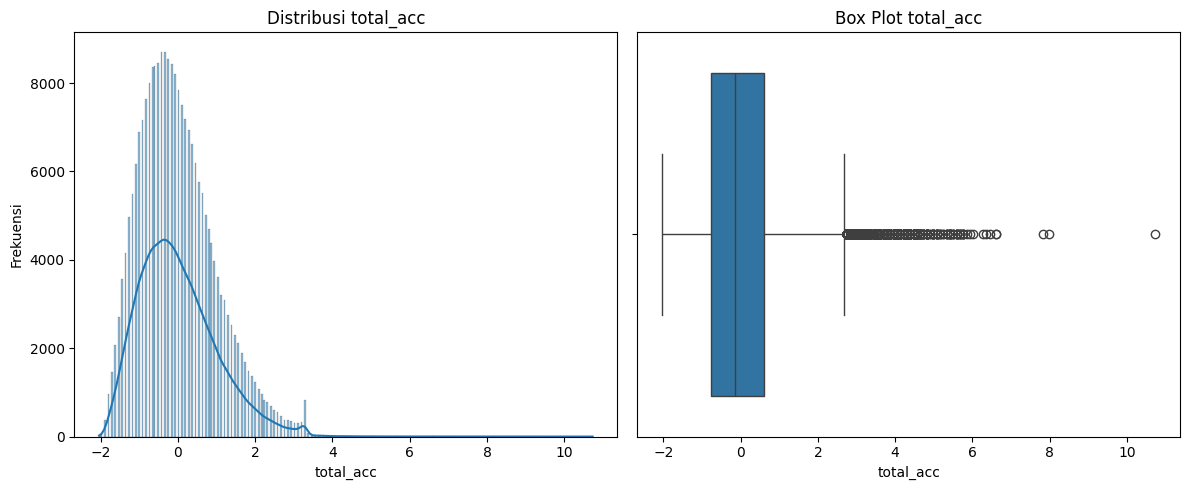


============================== Analisis Univariat Kolom Numerik: out_prncp ==============================
count    2.376950e+05
mean     3.403323e-17
std      1.000002e+00
min     -1.501708e-01
25%     -1.501708e-01
50%     -1.501708e-01
75%     -1.501708e-01
max      1.455622e+01
Name: out_prncp, dtype: float64
Skewness: 8.22
Kurtosis: 76.06
Mode: -0.15017083382899057


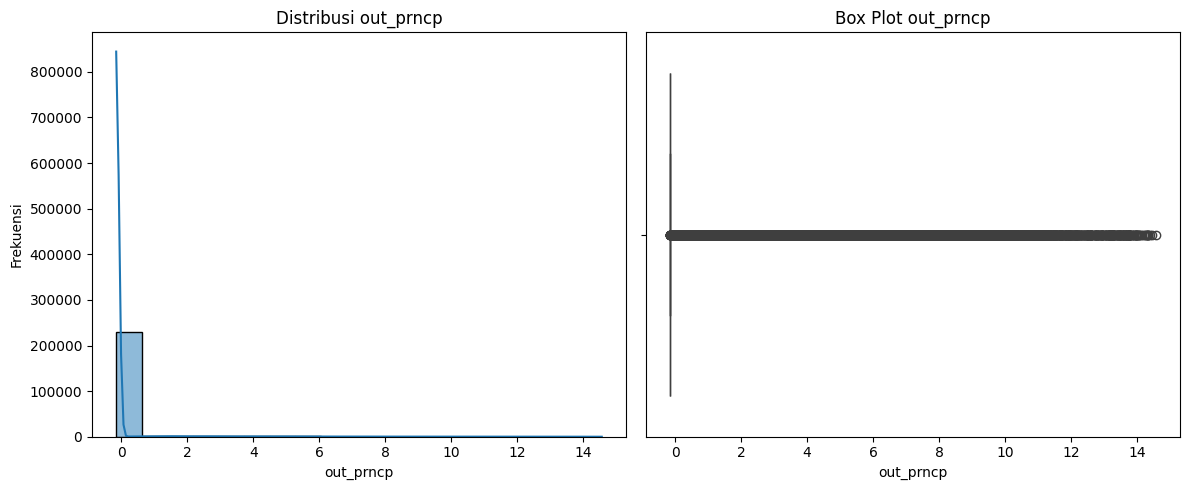


============================== Analisis Univariat Kolom Numerik: out_prncp_inv ==============================
count    2.376950e+05
mean     1.366112e-17
std      1.000002e+00
min     -1.501646e-01
25%     -1.501646e-01
50%     -1.501646e-01
75%     -1.501646e-01
max      1.456053e+01
Name: out_prncp_inv, dtype: float64
Skewness: 8.22
Kurtosis: 76.08
Mode: -0.15016458968401583


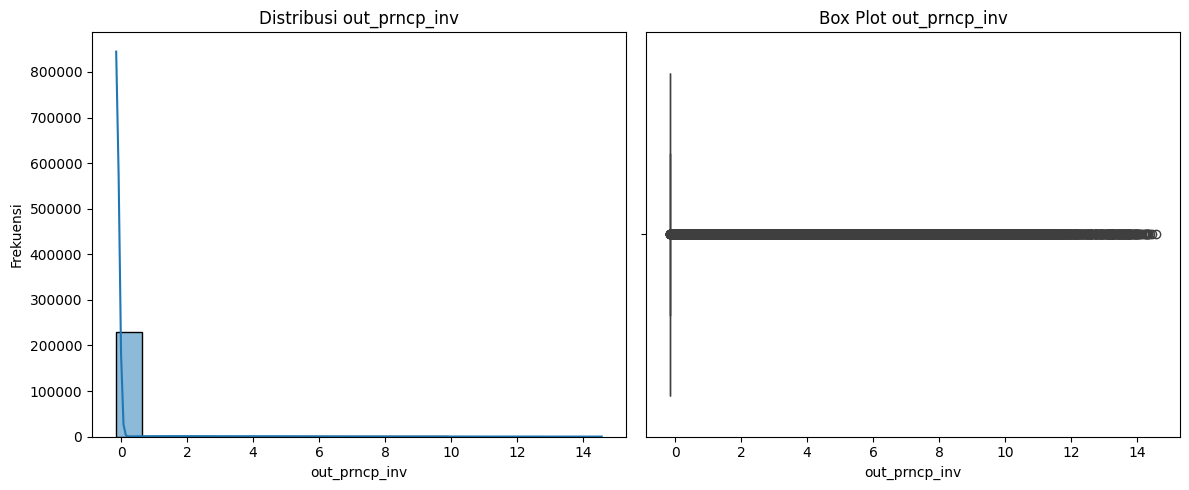


============================== Analisis Univariat Kolom Numerik: total_rec_prncp ==============================
count    2.376950e+05
mean     2.896038e-16
std      1.000002e+00
min     -1.360825e+00
25%     -7.571787e-01
50%     -1.663414e-01
75%      5.074696e-01
max      2.927067e+00
Name: total_rec_prncp, dtype: float64
Skewness: 0.97
Kurtosis: 0.46
Mode: -0.13571359072454603


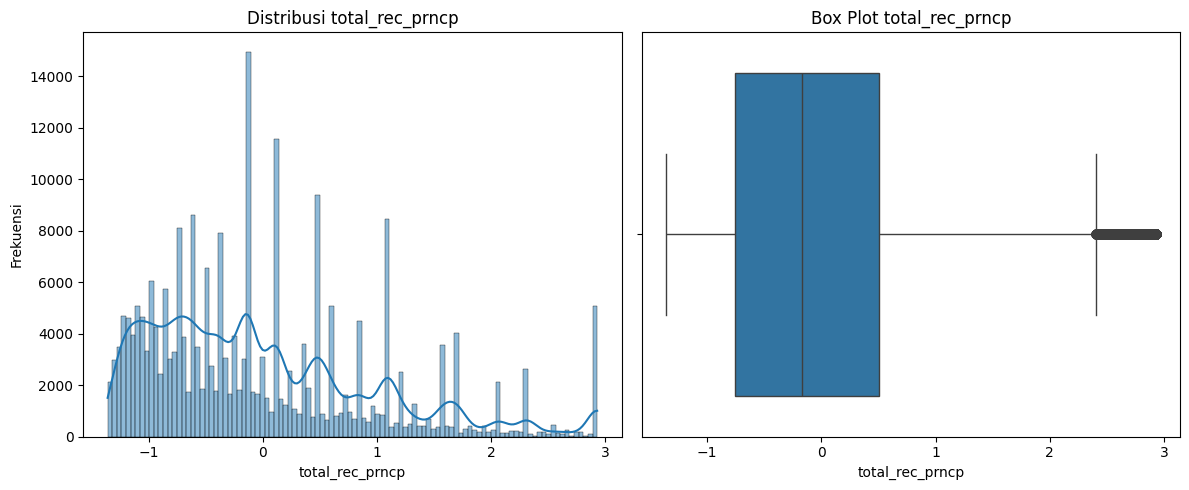


============================== Analisis Univariat Kolom Numerik: total_rec_int ==============================
count    2.376950e+05
mean    -2.263202e-16
std      1.000002e+00
min     -9.861839e-01
25%     -6.408423e-01
50%     -3.071537e-01
75%      2.657501e-01
max      9.588664e+00
Name: total_rec_int, dtype: float64
Skewness: 2.51
Kurtosis: 9.07
Mode: -0.9861839483896518


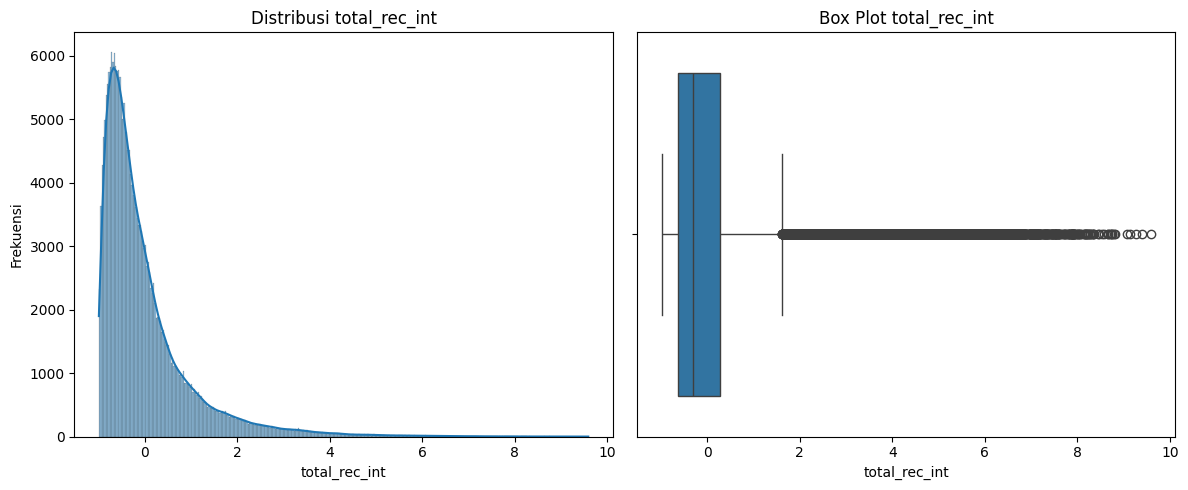


============================== Analisis Univariat Kolom Numerik: total_rec_late_fee ==============================
count    2.376950e+05
mean    -3.365957e-17
std      1.000002e+00
min     -1.471144e-01
25%     -1.471144e-01
50%     -1.471144e-01
75%     -1.471144e-01
max      5.706624e+01
Name: total_rec_late_fee, dtype: float64
Skewness: 11.76
Kurtosis: 244.17
Mode: -0.14711437701935218


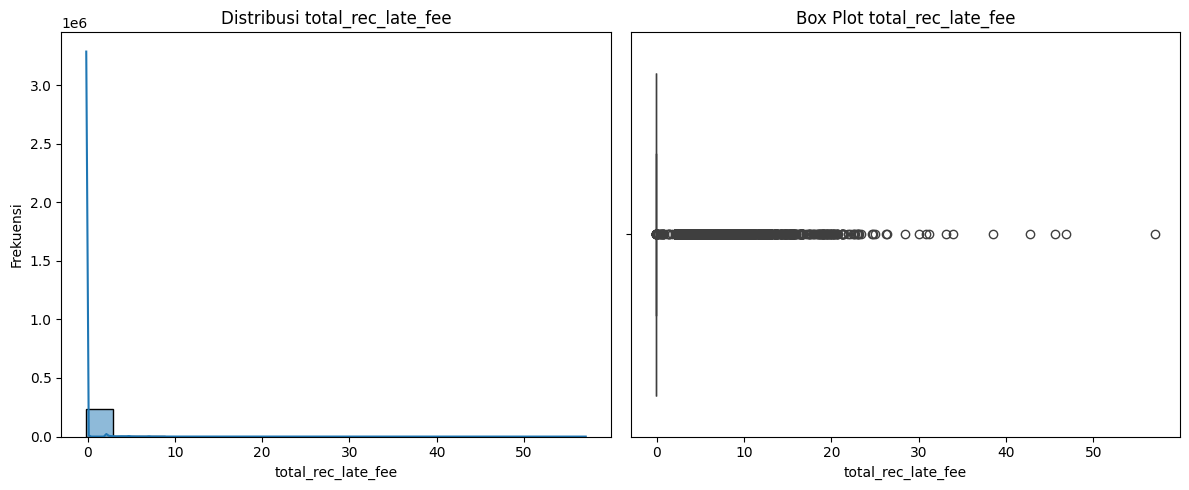


============================== Analisis Univariat Kolom Numerik: recoveries ==============================
count    2.376950e+05
mean    -2.709805e-17
std      1.000002e+00
min     -2.189915e-01
25%     -2.189915e-01
50%     -2.189915e-01
75%     -2.189915e-01
max      4.362695e+01
Name: recoveries, dtype: float64
Skewness: 9.40
Kurtosis: 170.75
Mode: -0.21899152955968115


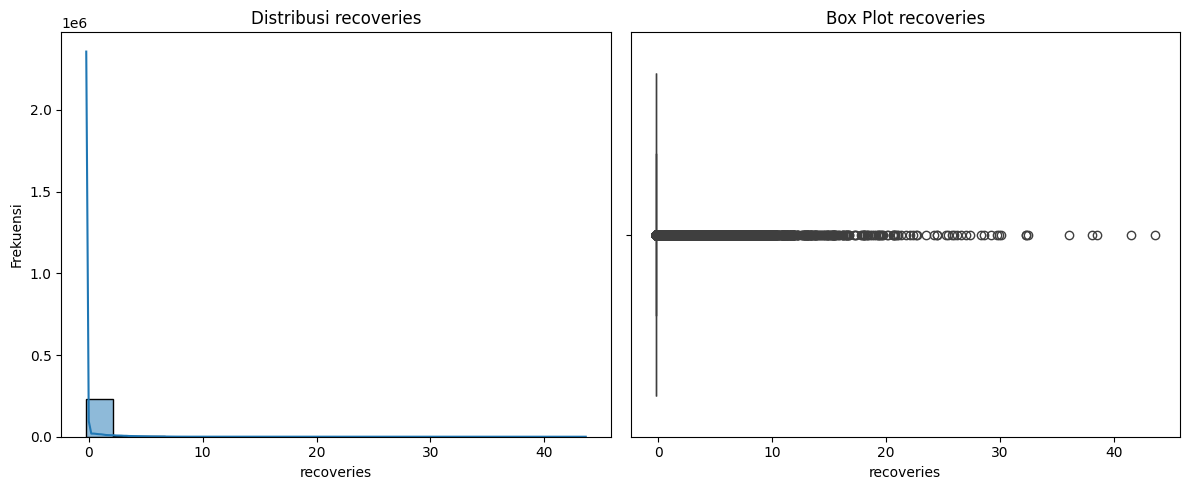


============================== Analisis Univariat Kolom Numerik: collection_recovery_fee ==============================
count    2.376950e+05
mean    -1.792835e-17
std      1.000002e+00
min     -1.475988e-01
25%     -1.475988e-01
50%     -1.475988e-01
75%     -1.475988e-01
max      5.864232e+01
Name: collection_recovery_fee, dtype: float64
Skewness: 15.91
Kurtosis: 484.95
Mode: -0.147598769128932


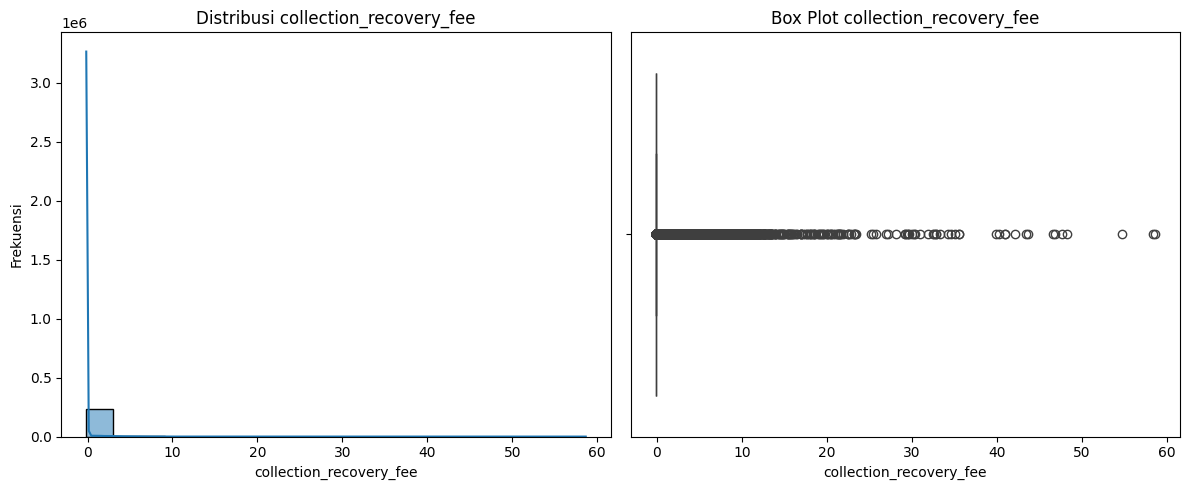


============================== Analisis Univariat Kolom Numerik: collections_12_mths_ex_med ==============================
count    2.376950e+05
mean    -1.975183e-17
std      1.000002e+00
min     -7.067883e-02
25%     -7.067883e-02
50%     -7.067883e-02
75%     -7.067883e-02
max      7.234313e+01
Name: collections_12_mths_ex_med, dtype: float64
Skewness: 17.58
Kurtosis: 462.95
Mode: -0.07067882907558228


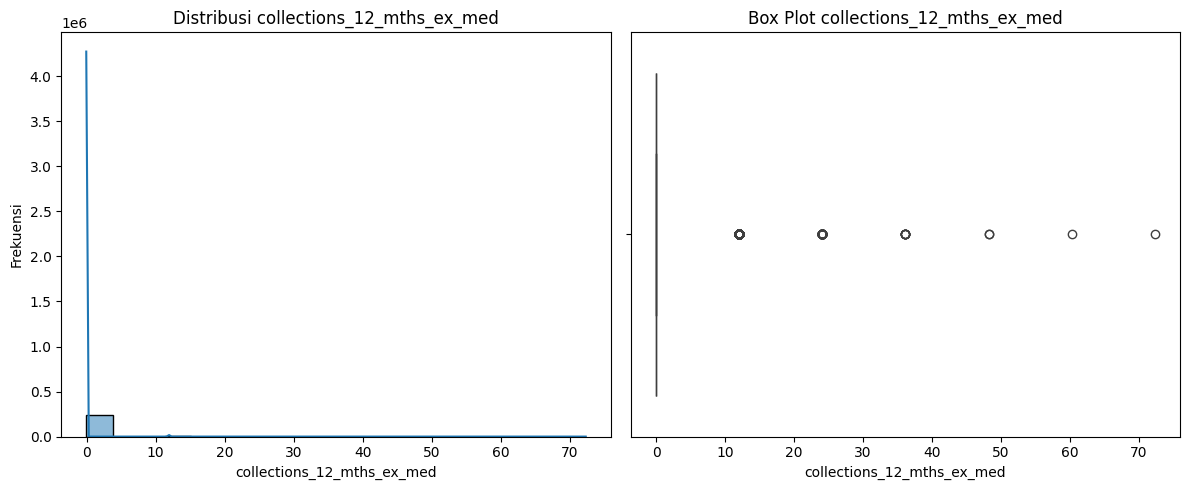


============================== Analisis Univariat Kolom Numerik: acc_now_delinq ==============================
count    2.376950e+05
mean     1.182270e-17
std      1.000002e+00
min     -4.937768e-02
25%     -4.937768e-02
50%     -4.937768e-02
75%     -4.937768e-02
max      8.549601e+01
Name: acc_now_delinq, dtype: float64
Skewness: 25.81
Kurtosis: 1007.75
Mode: -0.04937768040959483


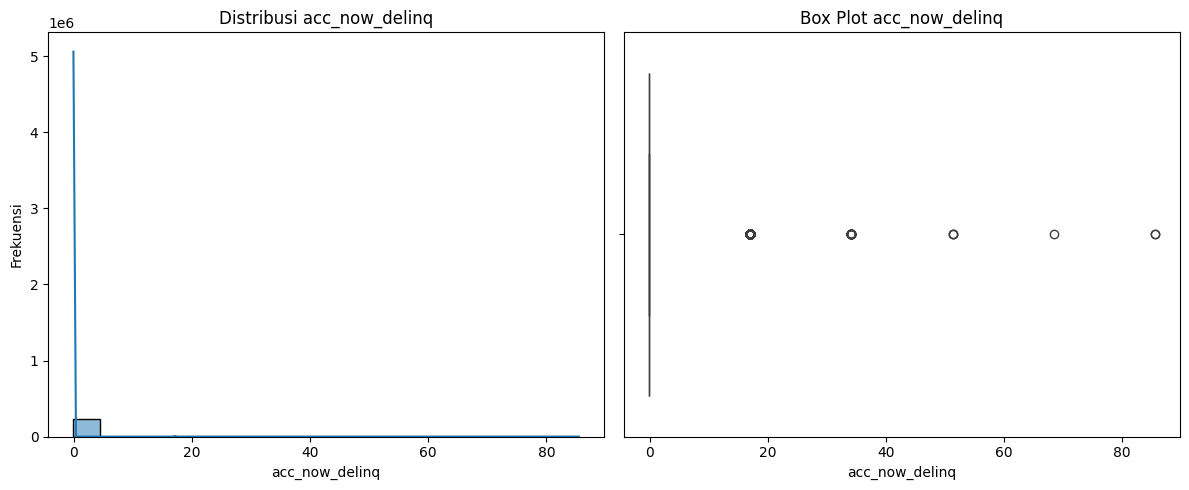


============================== Analisis Univariat Kolom Numerik: tot_coll_amt ==============================
count    2.376950e+05
mean    -4.898343e-19
std      1.000002e+00
min     -7.681081e-03
25%     -7.681081e-03
50%     -7.681081e-03
75%     -7.681081e-03
max      4.862129e+02
Name: tot_coll_amt, dtype: float64
Skewness: 483.60
Kurtosis: 235120.32
Mode: -0.007681080571146553


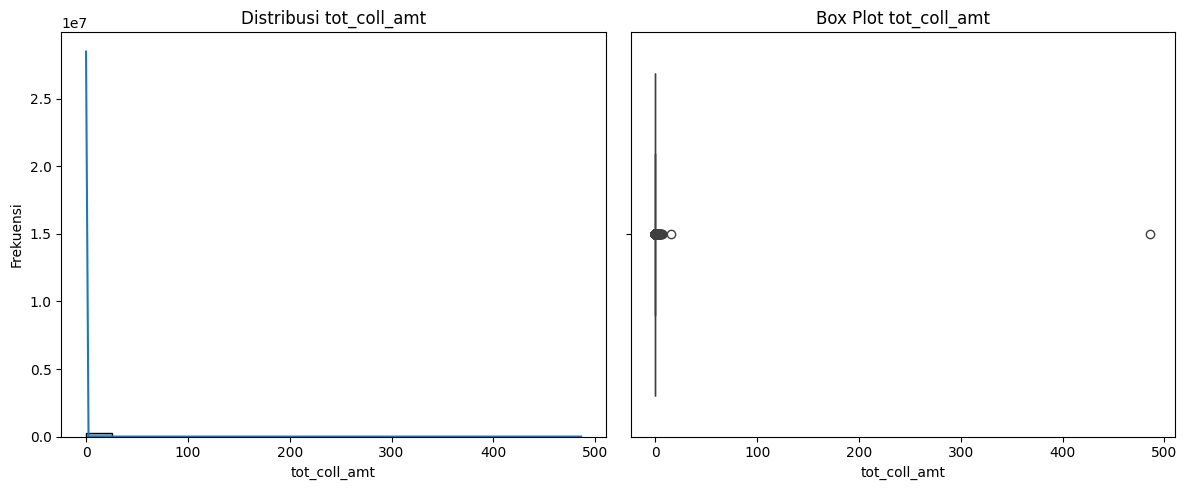


============================== Analisis Univariat Kolom Numerik: tot_cur_bal ==============================
count    2.376950e+05
mean    -5.395695e-17
std      1.000002e+00
min     -9.269926e-01
25%     -6.213443e-01
50%     -3.172034e-01
75%      2.795885e-01
max      6.059934e+01
Name: tot_cur_bal, dtype: float64
Skewness: 4.17
Kurtosis: 86.34
Mode: -0.31720340818997356


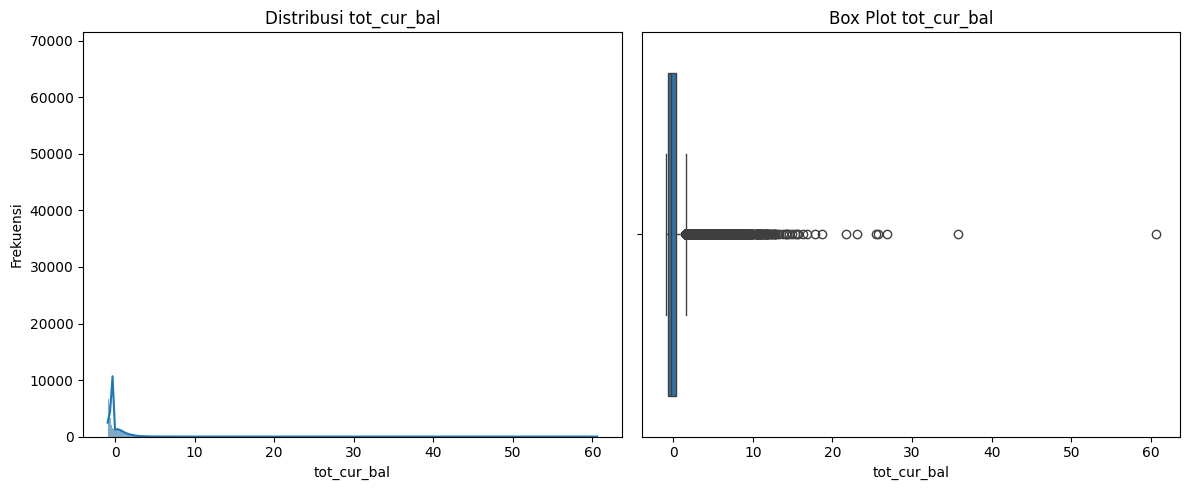


============================== Analisis Univariat Kolom Numerik: total_rev_hi_lim ==============================
count    2.376950e+05
mean    -4.953278e-17
std      1.000002e+00
min     -1.109627e+00
25%     -4.387366e-01
50%     -2.096522e-01
75%      9.306657e-02
max      8.124349e+01
Name: total_rev_hi_lim, dtype: float64
Skewness: 10.54
Kurtosis: 459.16
Mode: -0.20965217189355773


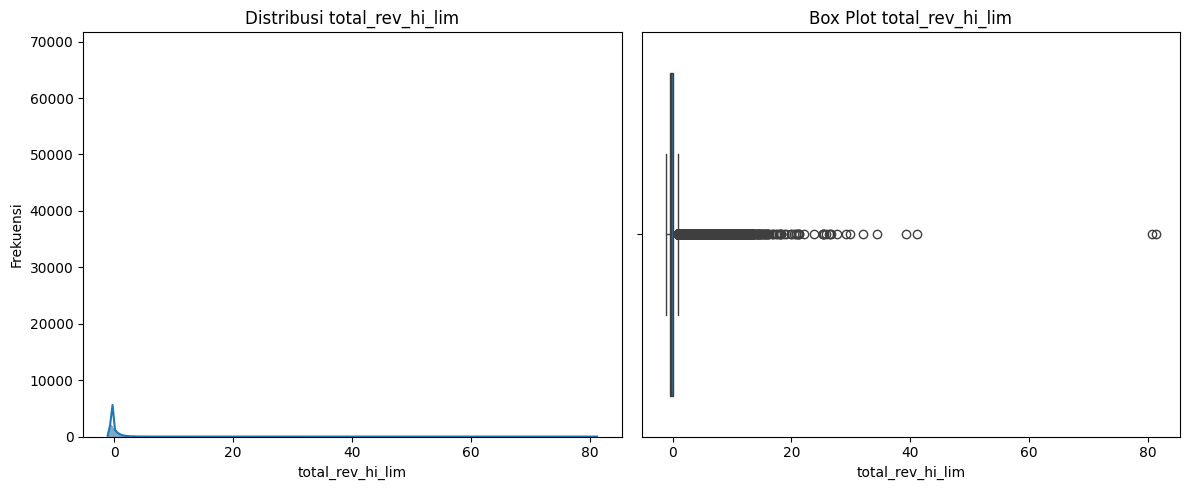


============================== Analisis Univariat Kolom Numerik: tot_coll_amt_missing_indicator ==============================
count    2.376950e+05
mean    -1.484489e-16
std      1.000002e+00
min     -6.238790e-01
25%     -6.238790e-01
50%     -6.238790e-01
75%      1.602875e+00
max      1.602875e+00
Name: tot_coll_amt_missing_indicator, dtype: float64
Skewness: 0.98
Kurtosis: -1.04
Mode: -0.6238789559170811


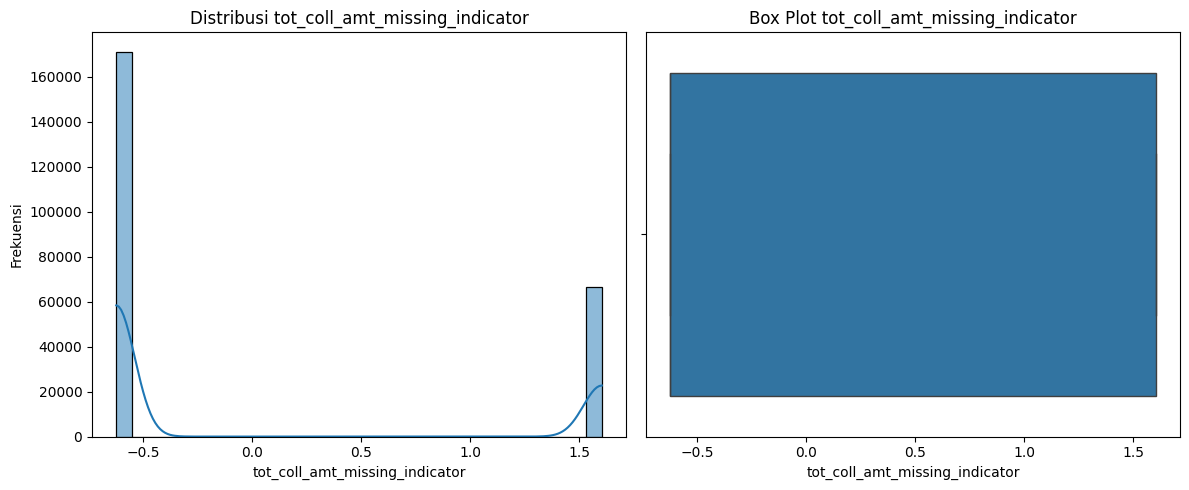


============================== Analisis Univariat Kolom Numerik: tot_cur_bal_missing_indicator ==============================
count    2.376950e+05
mean    -1.484489e-16
std      1.000002e+00
min     -6.238790e-01
25%     -6.238790e-01
50%     -6.238790e-01
75%      1.602875e+00
max      1.602875e+00
Name: tot_cur_bal_missing_indicator, dtype: float64
Skewness: 0.98
Kurtosis: -1.04
Mode: -0.6238789559170811


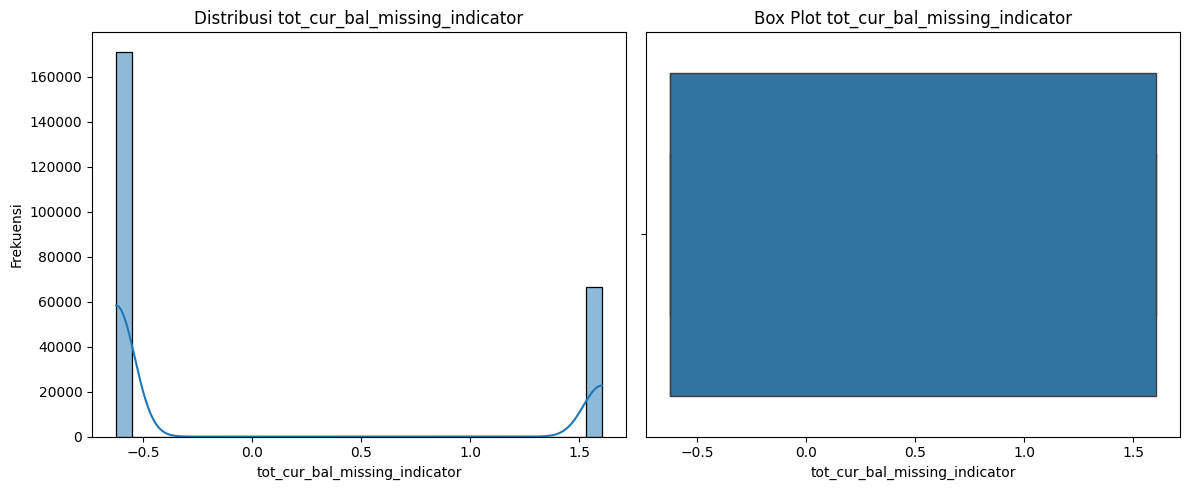


============================== Analisis Univariat Kolom Numerik: total_rev_hi_lim_missing_indicator ==============================
count    2.376950e+05
mean    -1.484489e-16
std      1.000002e+00
min     -6.238790e-01
25%     -6.238790e-01
50%     -6.238790e-01
75%      1.602875e+00
max      1.602875e+00
Name: total_rev_hi_lim_missing_indicator, dtype: float64
Skewness: 0.98
Kurtosis: -1.04
Mode: -0.6238789559170811


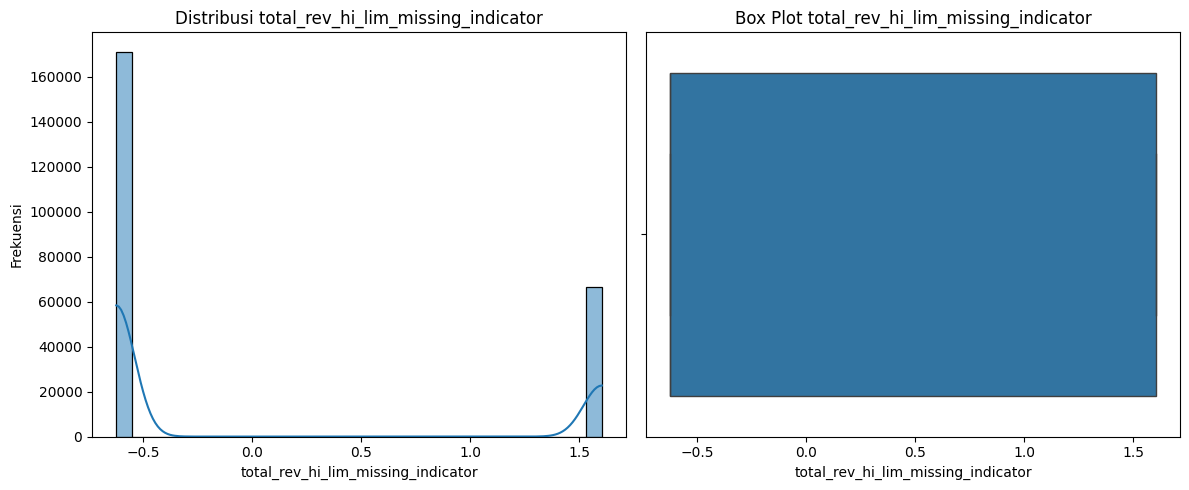

In [21]:
for col in numeric_features:
    print(f"\n{'='*30} Analisis Univariat Kolom Numerik: {col} {'='*30}")
    print(df[col].describe())
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurt():.2f}")
    print(f"Mode: {df[col].mode().iloc[0] if not df[col].mode().empty else None}") # Menampilkan mode pertama jika ada

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

#### Analisis data kategorik


============================== Analisis Univariat Kolom Kategorikal: term ==============================
Jumlah Nilai Unik: 2

Value Counts:
term
36 months    185700
60 months     51995
Name: count, dtype: int64

Proporsi (%):
term
36 months    78.125329
60 months    21.874671
Name: proportion, dtype: float64


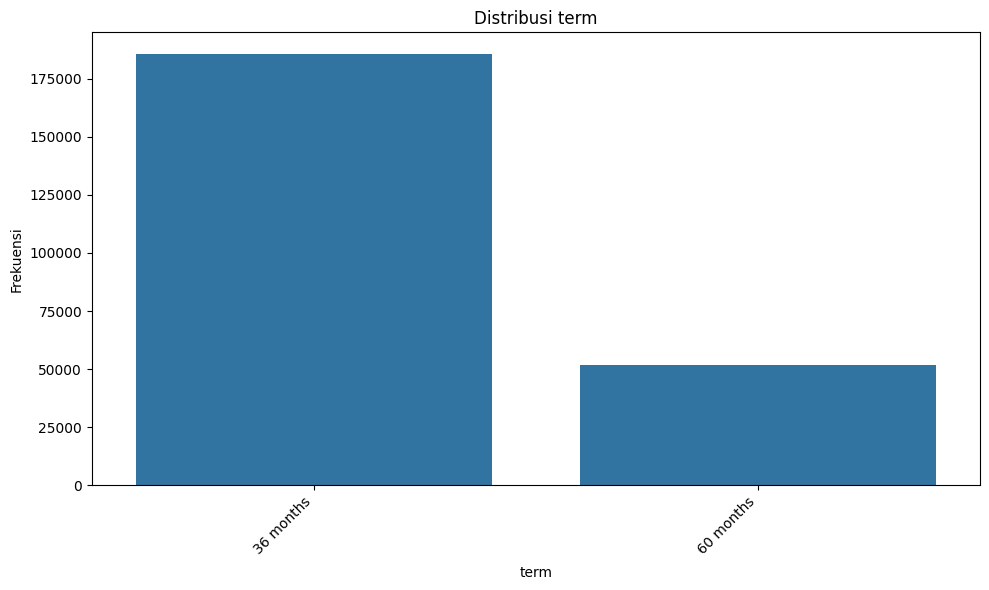


============================== Analisis Univariat Kolom Kategorikal: grade ==============================
Jumlah Nilai Unik: 7

Value Counts:
grade
B    71990
C    60683
A    39442
D    38431
E    17911
F     7273
G     1965
Name: count, dtype: int64

Proporsi (%):
grade
B    30.286712
C    25.529776
A    16.593534
D    16.168199
E     7.535287
F     3.059804
G     0.826690
Name: proportion, dtype: float64


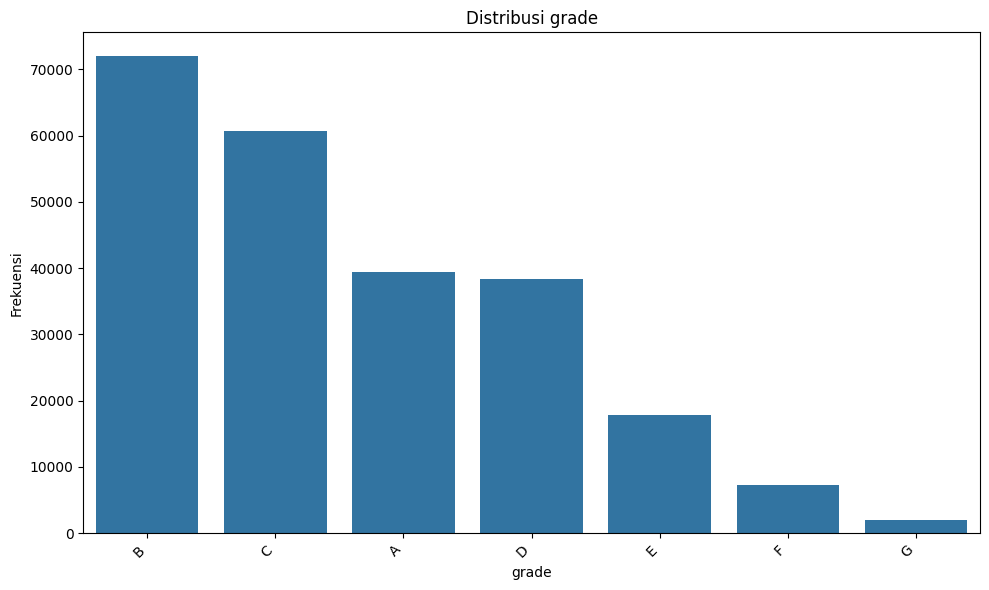


============================== Analisis Univariat Kolom Kategorikal: sub_grade ==============================
Jumlah Nilai Unik: 35

Value Counts:
sub_grade
B3    17316
B4    16057
C1    13950
B2    13874
B5    13368
C2    13305
C3    11851
B1    11375
C4    11144
A5    11074
C5    10433
A4    10370
D1     9475
D2     8645
D3     7565
D4     6990
A3     6746
A2     5758
D5     5756
A1     5494
E1     4319
E2     4313
E3     3510
E4     3118
E5     2651
F1     2083
F2     1662
F3     1493
F4     1134
F5      901
G1      661
G2      478
G3      330
G4      257
G5      239
Name: count, dtype: int64

Proporsi (%):
sub_grade
B3    7.284966
B4    6.755296
C1    5.868866
B2    5.836892
B5    5.624014
C2    5.597509
C3    4.985801
B1    4.785545
C4    4.688361
A5    4.658912
C5    4.389238
A4    4.362734
D1    3.986201
D2    3.637014
D3    3.182650
D4    2.940743
A3    2.838091
A2    2.422432
D5    2.421591
A1    2.311365
E1    1.817034
E2    1.814510
E3    1.476682
E4    1.311765
E5    1.115

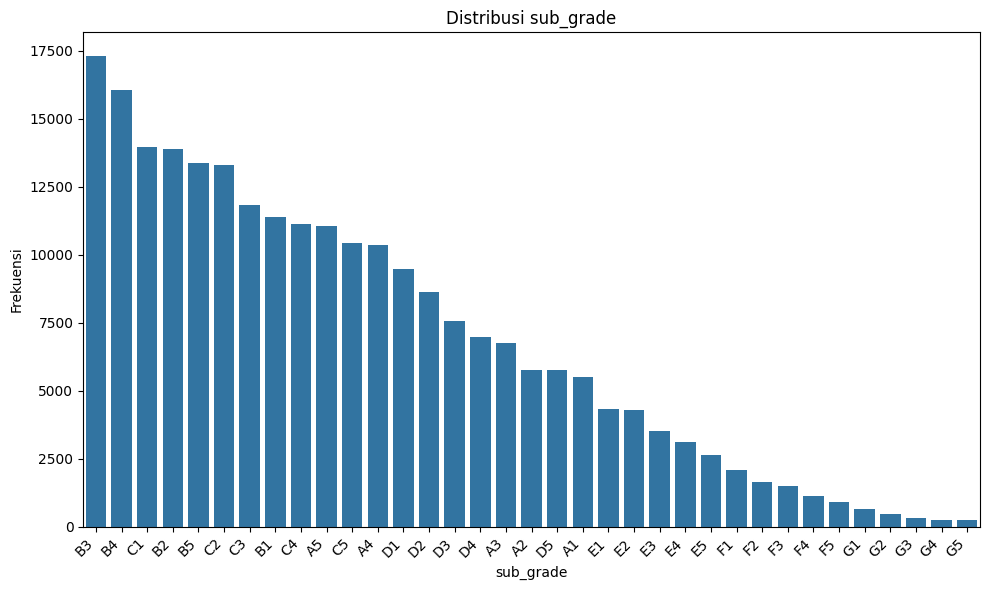


============================== Analisis Univariat Kolom Kategorikal: emp_length ==============================
Jumlah Nilai Unik: 11

Value Counts:
emp_length
10+ years    80095
2 years      22246
< 1 year     19886
3 years      19295
5 years      17224
1 year       16006
4 years      15322
6 years      14242
7 years      13402
8 years      11042
9 years       8935
Name: count, dtype: int64

Proporsi (%):
emp_length
10+ years    33.696544
2 years       9.359053
< 1 year      8.366184
3 years       8.117546
5 years       7.246261
1 year        6.733840
4 years       6.446076
6 years       5.991712
7 years       5.638318
8 years       4.645449
9 years       3.759019
Name: proportion, dtype: float64


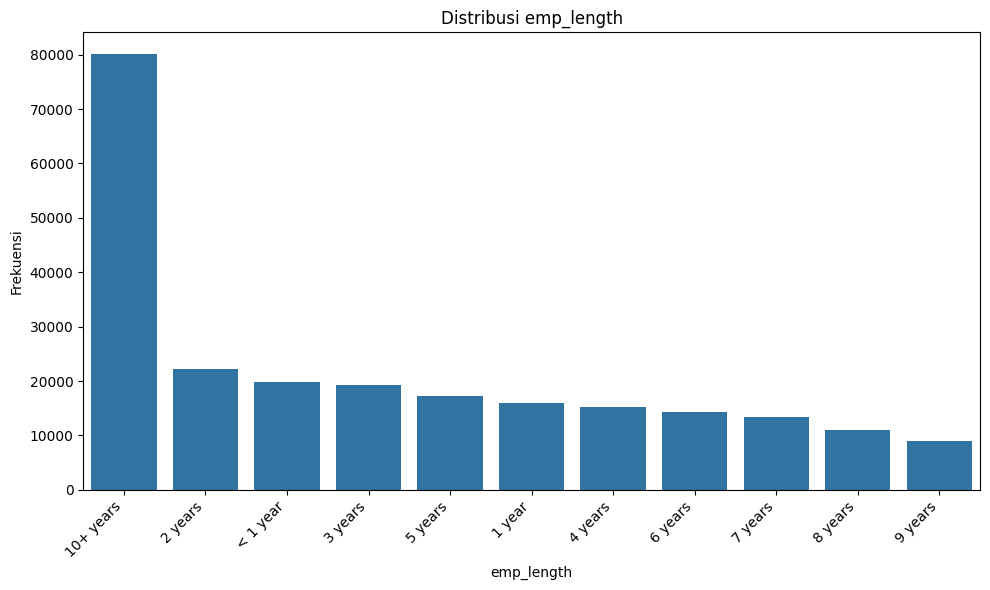


============================== Analisis Univariat Kolom Kategorikal: home_ownership ==============================
Jumlah Nilai Unik: 6

Value Counts:
home_ownership
MORTGAGE    116769
RENT        100703
OWN          19995
OTHER          179
NONE            48
ANY              1
Name: count, dtype: int64

Proporsi (%):
home_ownership
MORTGAGE    49.125560
RENT        42.366478
OWN          8.412041
OTHER        0.075307
NONE         0.020194
ANY          0.000421
Name: proportion, dtype: float64


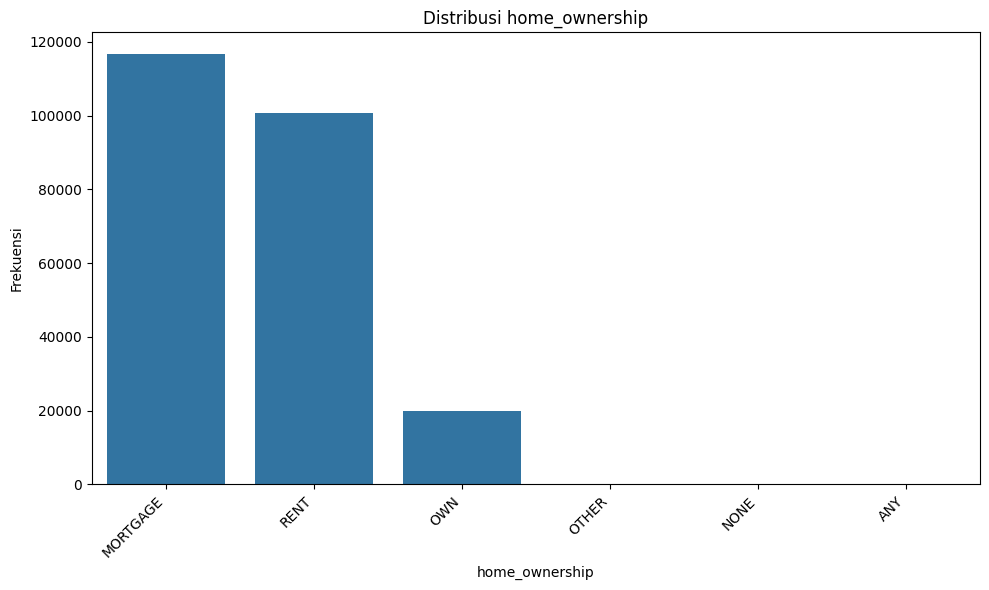


============================== Analisis Univariat Kolom Kategorikal: verification_status ==============================
Jumlah Nilai Unik: 3

Value Counts:
verification_status
Verified           88337
Not Verified       82760
Source Verified    66598
Name: count, dtype: int64

Proporsi (%):
verification_status
Verified           37.164013
Not Verified       34.817729
Source Verified    28.018259
Name: proportion, dtype: float64


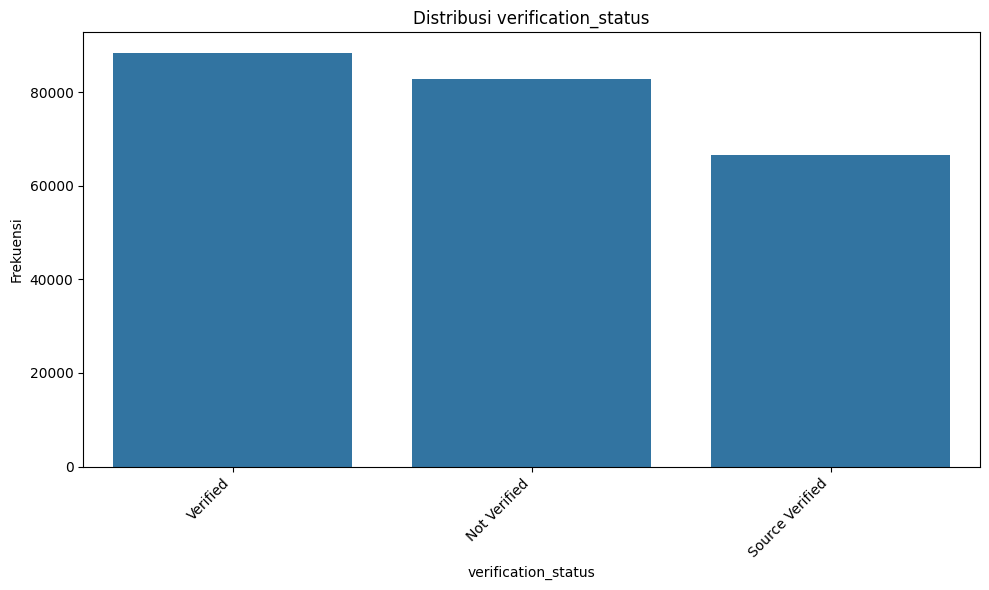


============================== Analisis Univariat Kolom Kategorikal: issue_d ==============================
Jumlah Nilai Unik: 91

Value Counts:
issue_d
Oct-14    9704
Jul-14    9226
Apr-14    7121
Nov-13    6904
Dec-13    6893
          ... 
Aug-07      74
Jul-07      63
Sep-08      57
Sep-07      53
Jun-07      24
Name: count, Length: 91, dtype: int64

Proporsi (%):
issue_d
Oct-14    4.082543
Jul-14    3.881445
Apr-14    2.995856
Nov-13    2.904563
Dec-13    2.899935
            ...   
Aug-07    0.031132
Jul-07    0.026505
Sep-08    0.023980
Sep-07    0.022297
Jun-07    0.010097
Name: proportion, Length: 91, dtype: float64


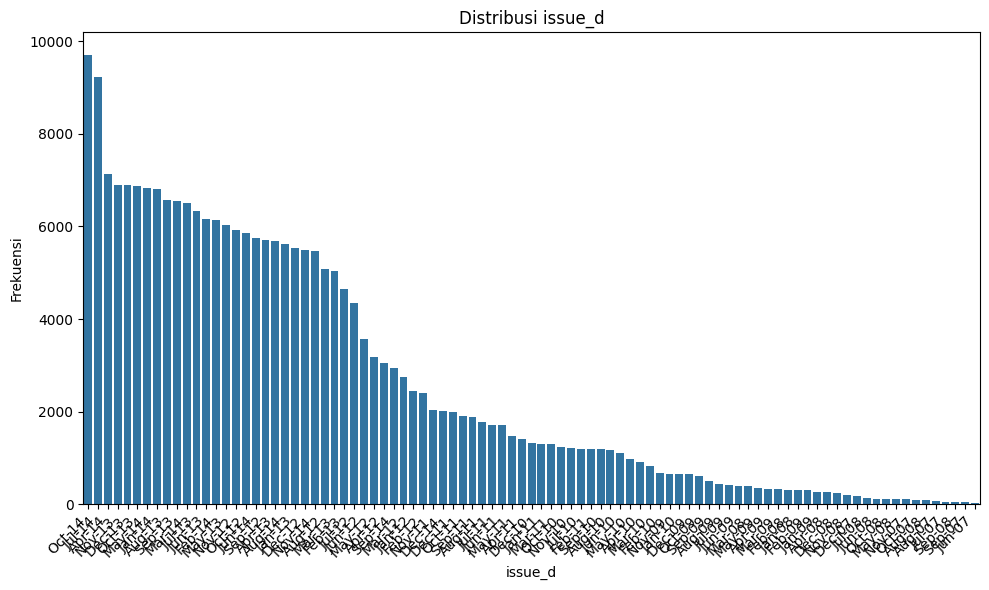


============================== Analisis Univariat Kolom Kategorikal: pymnt_plan ==============================
Jumlah Nilai Unik: 2

Value Counts:
pymnt_plan
n    237689
y         6
Name: count, dtype: int64

Proporsi (%):
pymnt_plan
n    99.997476
y     0.002524
Name: proportion, dtype: float64


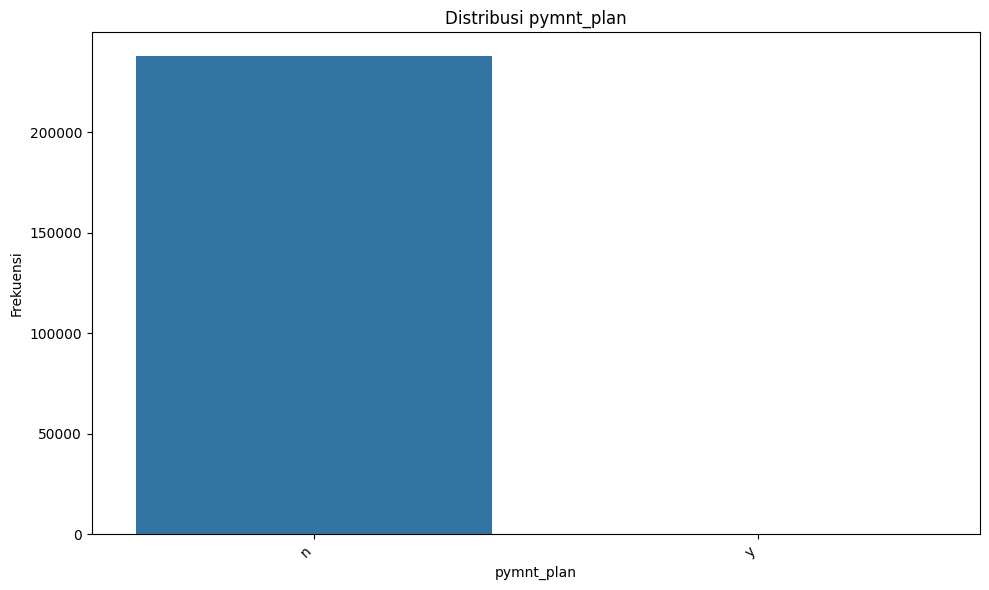


============================== Analisis Univariat Kolom Kategorikal: purpose ==============================
Jumlah Nilai Unik: 14

Value Counts:
purpose
debt_consolidation    138318
credit_card            47421
home_improvement       13824
other                  13635
major_purchase          5951
small_business          4766
car                     3498
medical                 2706
wedding                 2017
moving                  1892
house                   1533
vacation                1456
educational              422
renewable_energy         256
Name: count, dtype: int64

Proporsi (%):
purpose
debt_consolidation    58.191380
credit_card           19.950357
home_improvement       5.815856
other                  5.736343
major_purchase         2.503629
small_business         2.005091
car                    1.471634
medical                1.138434
wedding                0.848566
moving                 0.795978
house                  0.644944
vacation               0.612550
educati

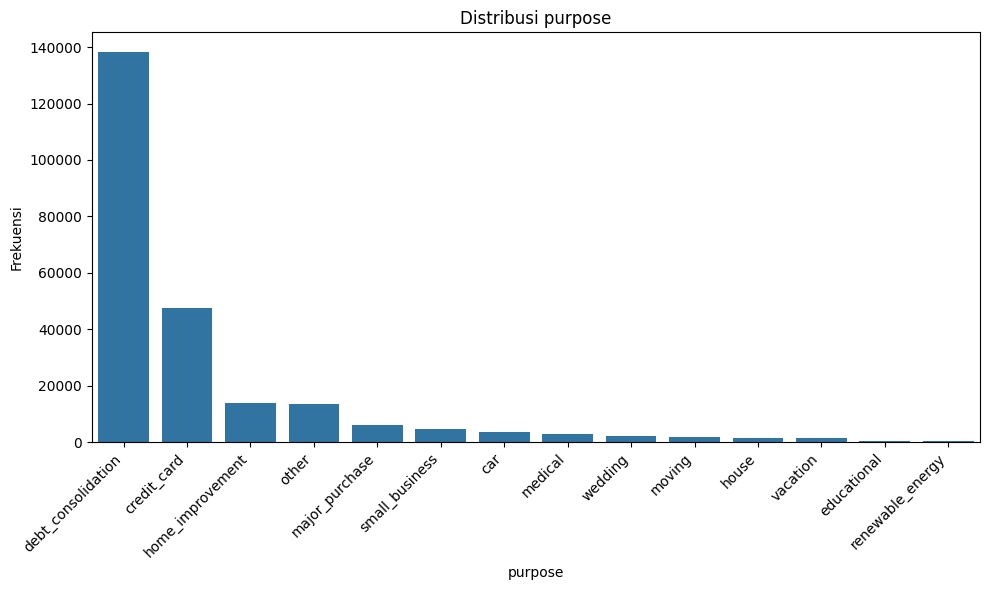


============================== Analisis Univariat Kolom Kategorikal: earliest_cr_line ==============================
Jumlah Nilai Unik: 634

Value Counts:
earliest_cr_line
Oct-00    2056
Oct-99    1883
Nov-00    1847
Oct-01    1840
Nov-99    1807
          ... 
Dec-50       1
Nov-63       1
May-60       1
Mar-61       1
Nov-56       1
Name: count, Length: 634, dtype: int64

Proporsi (%):
earliest_cr_line
Oct-00    0.864974
Oct-99    0.792192
Nov-00    0.777046
Oct-01    0.774101
Nov-99    0.760218
            ...   
Dec-50    0.000421
Nov-63    0.000421
May-60    0.000421
Mar-61    0.000421
Nov-56    0.000421
Name: proportion, Length: 634, dtype: float64


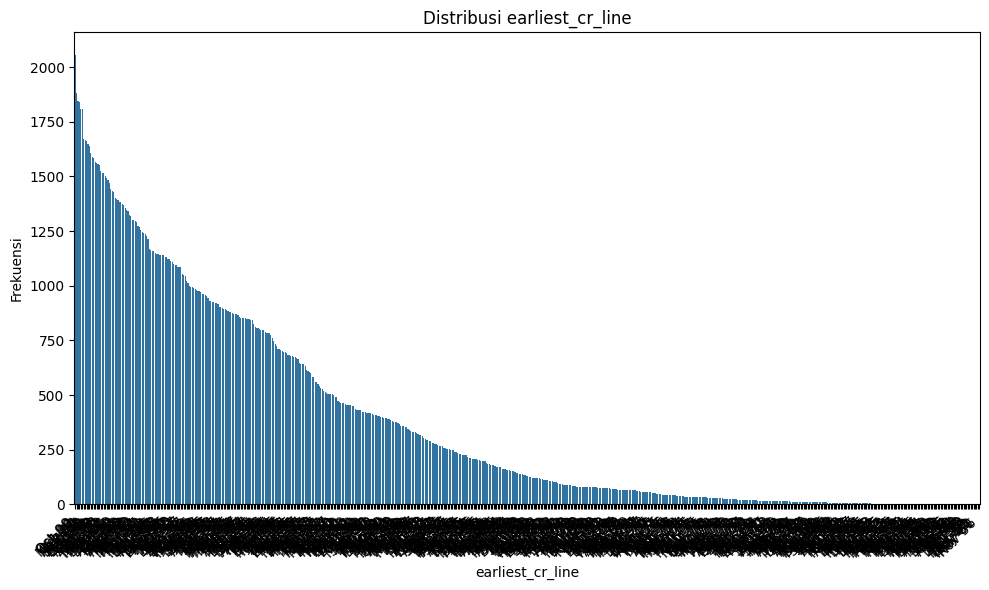


============================== Analisis Univariat Kolom Kategorikal: initial_list_status ==============================
Jumlah Nilai Unik: 2

Value Counts:
initial_list_status
f    177046
w     60649
Name: count, dtype: int64

Proporsi (%):
initial_list_status
f    74.484528
w    25.515472
Name: proportion, dtype: float64


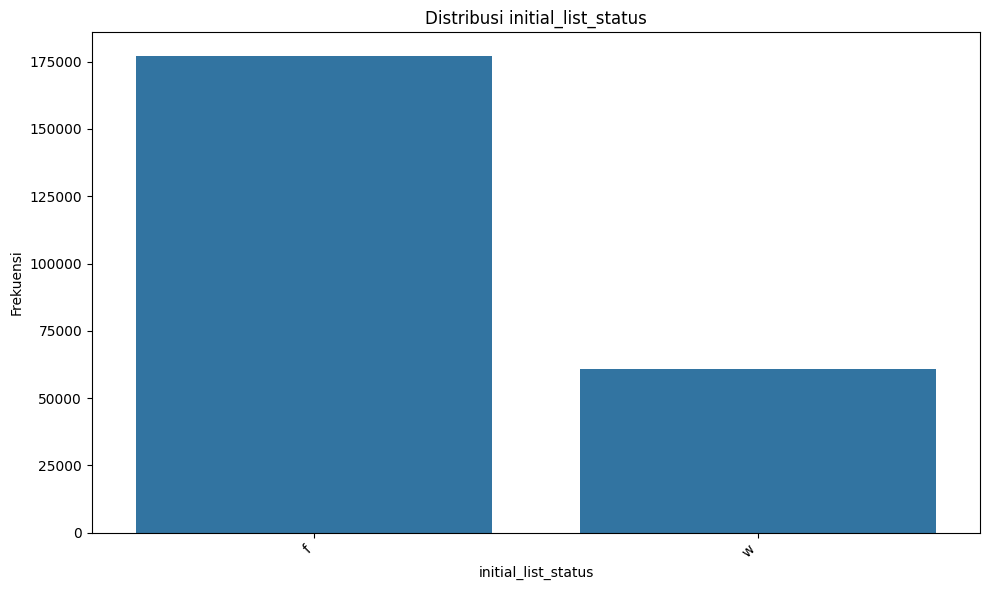


============================== Analisis Univariat Kolom Kategorikal: application_type ==============================
Jumlah Nilai Unik: 1

Value Counts:
application_type
INDIVIDUAL    237695
Name: count, dtype: int64

Proporsi (%):
application_type
INDIVIDUAL    100.0
Name: proportion, dtype: float64


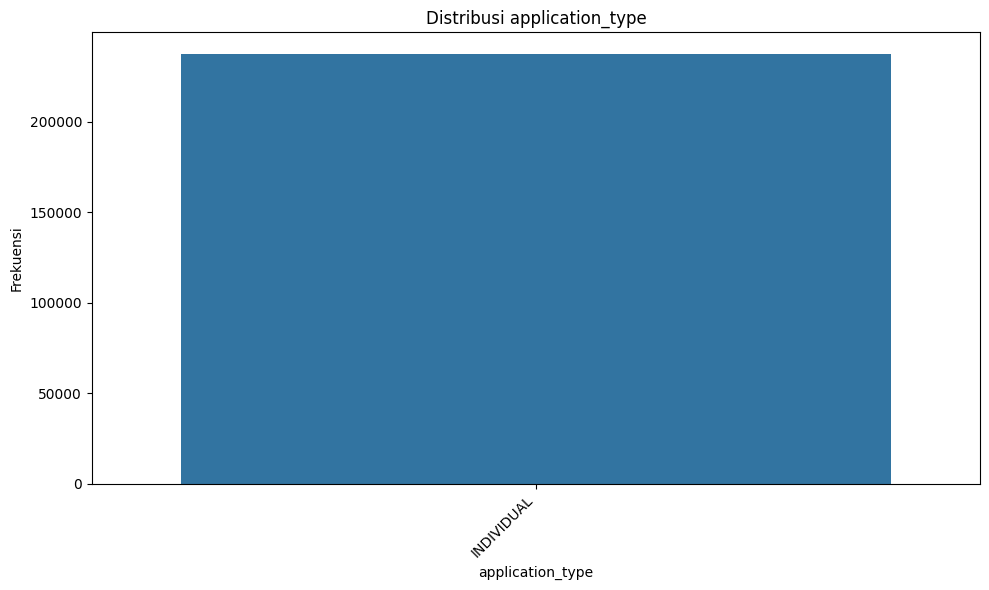


============================== Analisis Univariat Kolom Kategorikal: loan_outcome ==============================
Jumlah Nilai Unik: 2

Value Counts:
loan_outcome
GOOD    186727
BAD      50968
Name: count, dtype: int64

Proporsi (%):
loan_outcome
GOOD    78.557395
BAD     21.442605
Name: proportion, dtype: float64


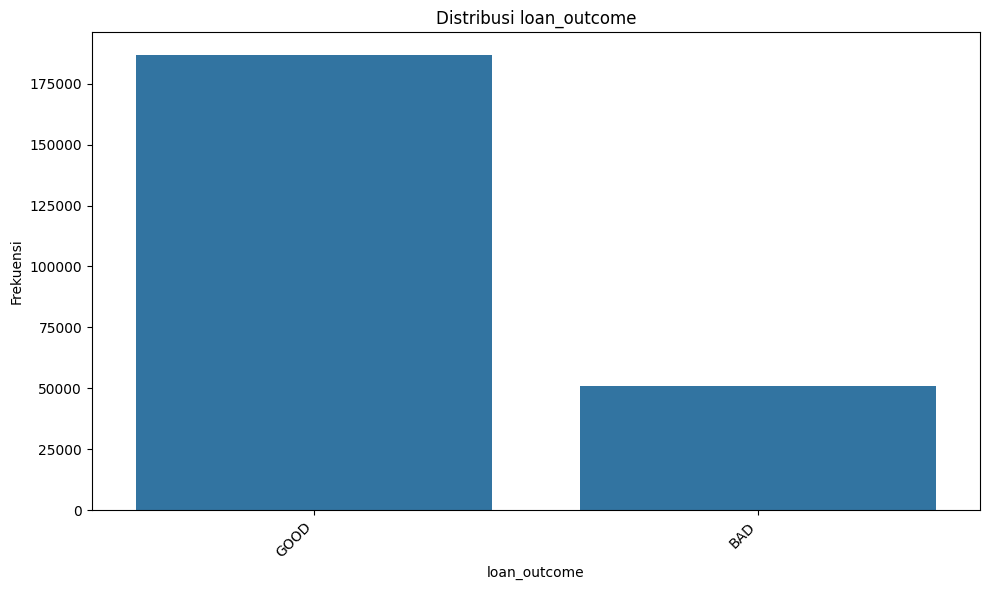

In [22]:
for col in kategorical_features:
    if col in df.columns:  # Pastikan kolom masih ada setelah penghapusan
        print(f"\n{'='*30} Analisis Univariat Kolom Kategorikal: {col} {'='*30}")
        print(f"Jumlah Nilai Unik: {df[col].nunique()}")
        print("\nValue Counts:")
        print(df[col].value_counts())
        print("\nProporsi (%):")
        print(df[col].value_counts(normalize=True) * 100)

        plt.figure(figsize=(10, 6))
        sns.countplot(x=df[col], order=df[col].value_counts().index) # Mengurutkan berdasarkan frekuensi
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

* pada fitur application_type hanya memiliki satu nilai, jadi sebaiknya kolom ini dihapus
* fitur earliest_cr_line bisa dianggap kurang informatif
* fitur pymnt_plan hampir seluruh data berada dalam satu kategori, hal tersebut menunjukkan fitur tersebut memiliki varian yg rendah
* fitur issue_d didapatkan setelah pinjaman disetujui, maka fitur ini dianggap tidak informatif untuk model
* fitur sub_grade dan grade dihapus untuk mencegah masalah dimensi yang terlalu besar


In [23]:
dropped_columns = ['application_type', 'earliest_cr_line', 'pymnt_plan', 'issue_d', 'sub_grade', 'grade']

df = df.drop(columns=dropped_columns, axis=1)
df.shape

(237695, 36)

## Analisis multivariat

In [24]:
kategorical_features = df.select_dtypes(include=['object']).columns
numeric_features = df.select_dtypes(include=['number']).columns


--- Korelasi Antar Fitur Numerik ---


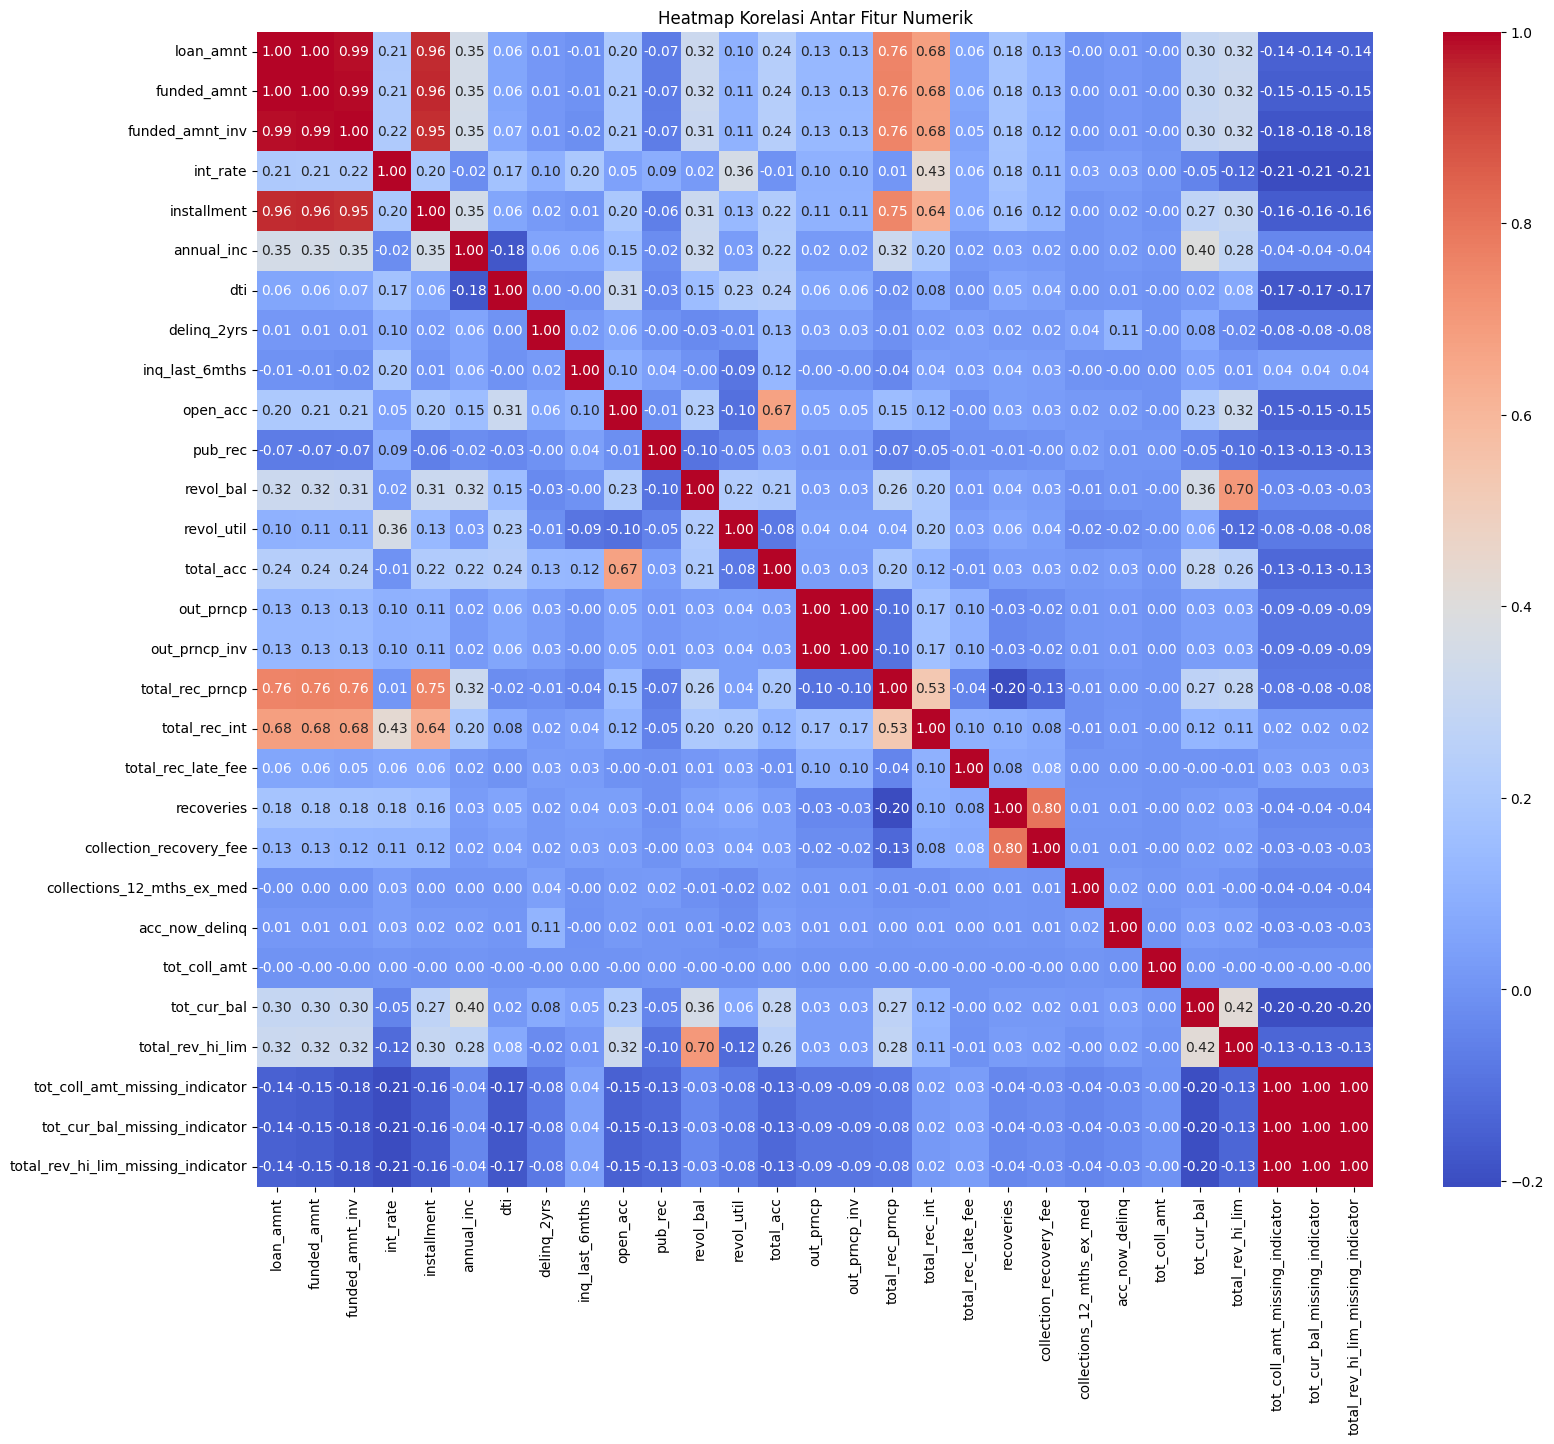

Interpretasi: Perhatikan nilai korelasi yang tinggi (positif atau negatif) antar fitur.


In [25]:
# --- 1. Korelasi Antar Fitur Numerik ---
print("\n--- Korelasi Antar Fitur Numerik ---")
if 'loan_outcome' in numeric_features:
    numeric_features.remove('loan_outcome')

correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()
print("Interpretasi: Perhatikan nilai korelasi yang tinggi (positif atau negatif) antar fitur.")



--- Hubungan Antara Fitur Numerik dengan Target ('loan_outcome') ---


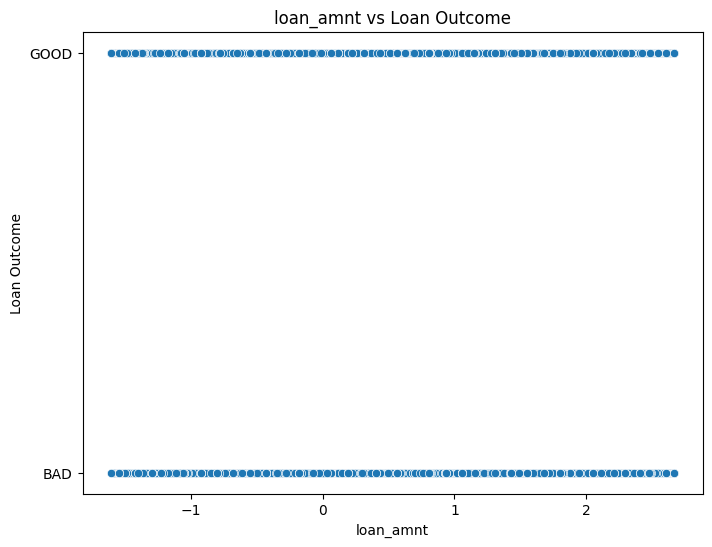

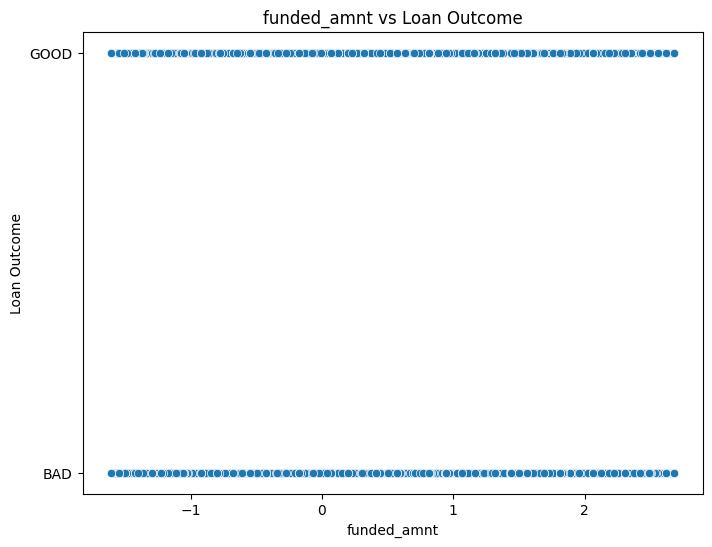

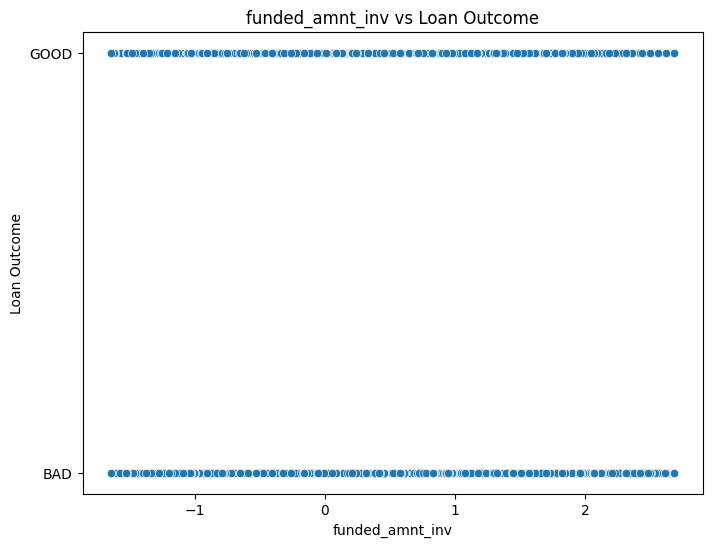

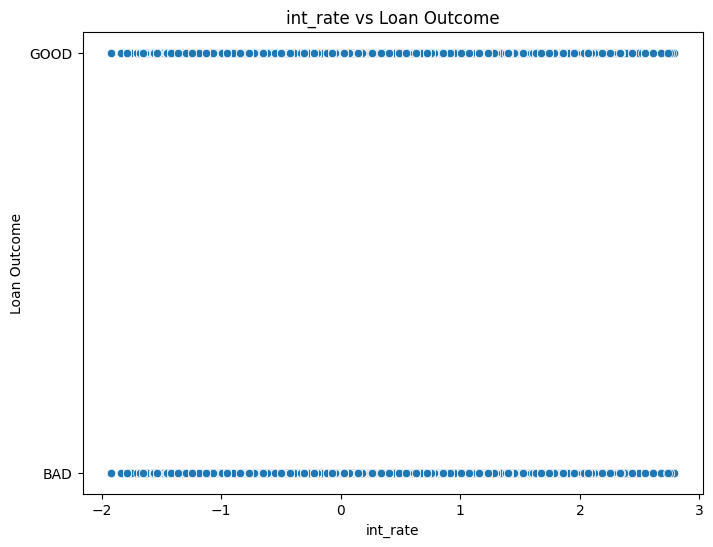

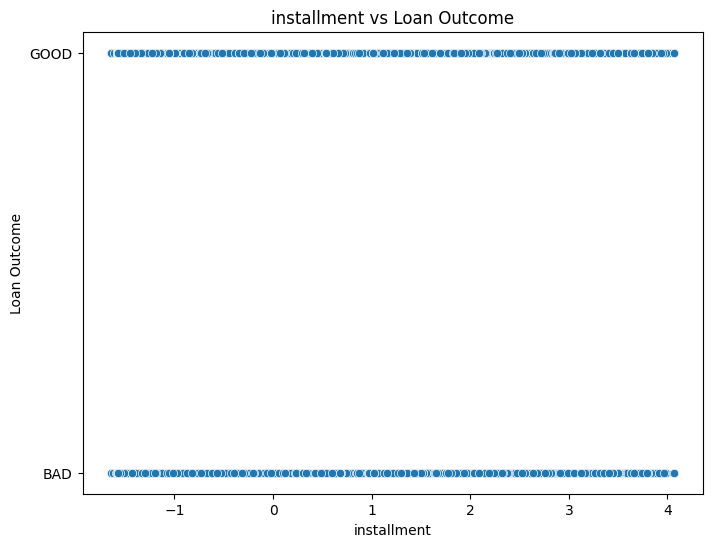

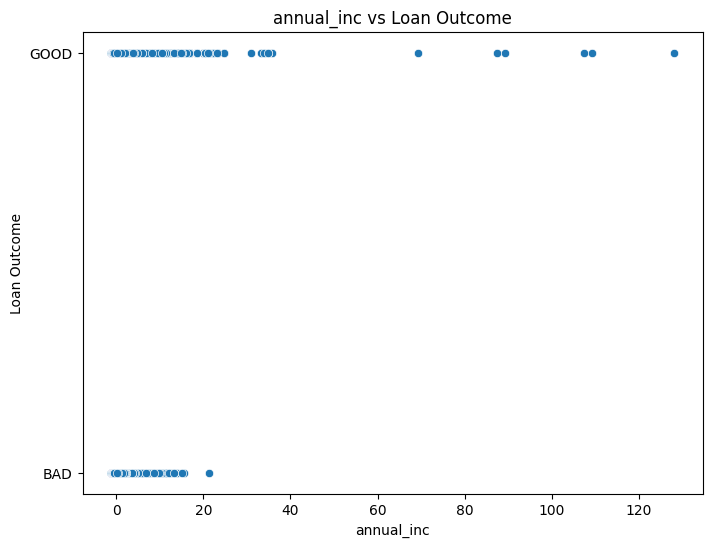

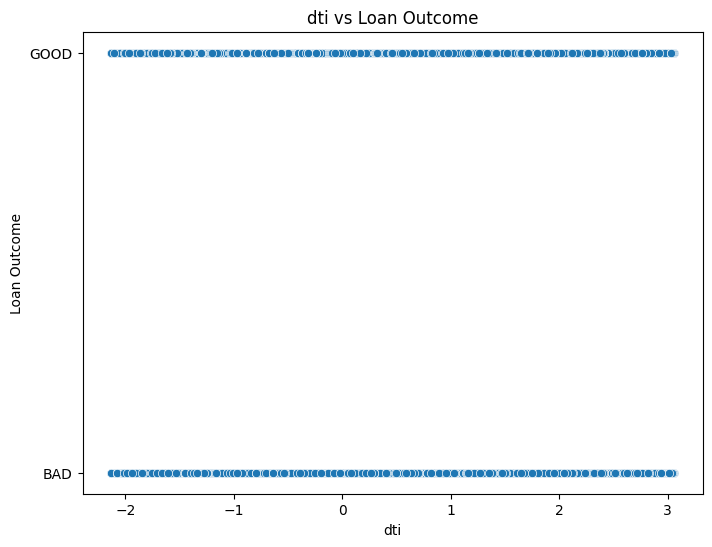

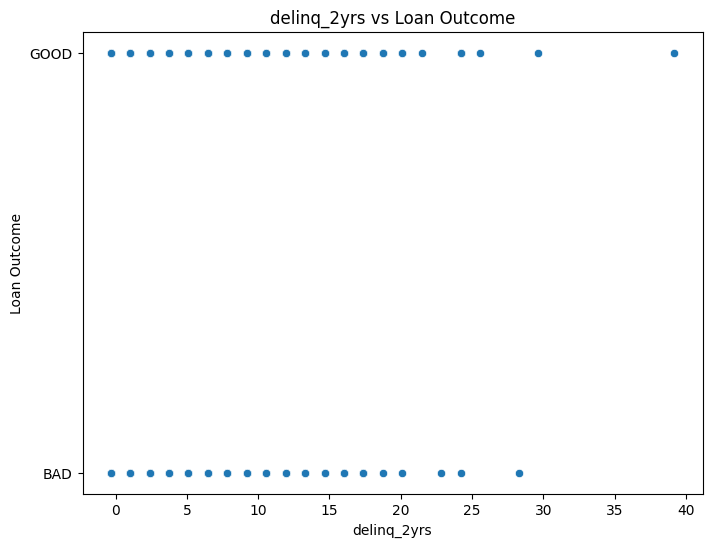

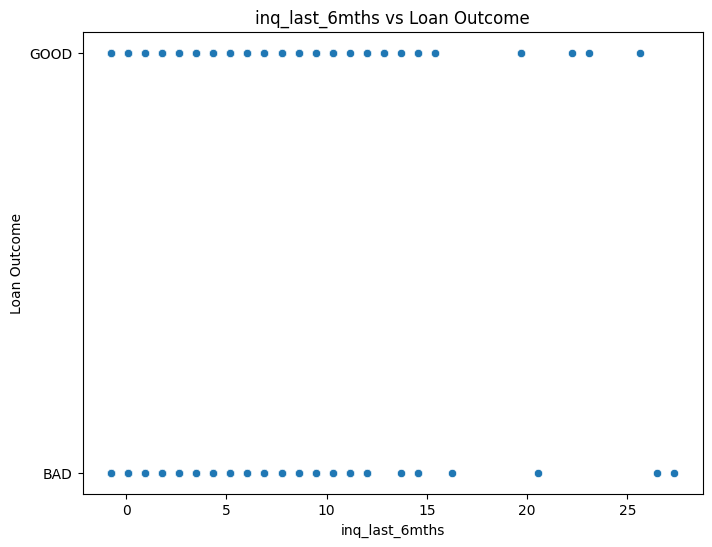

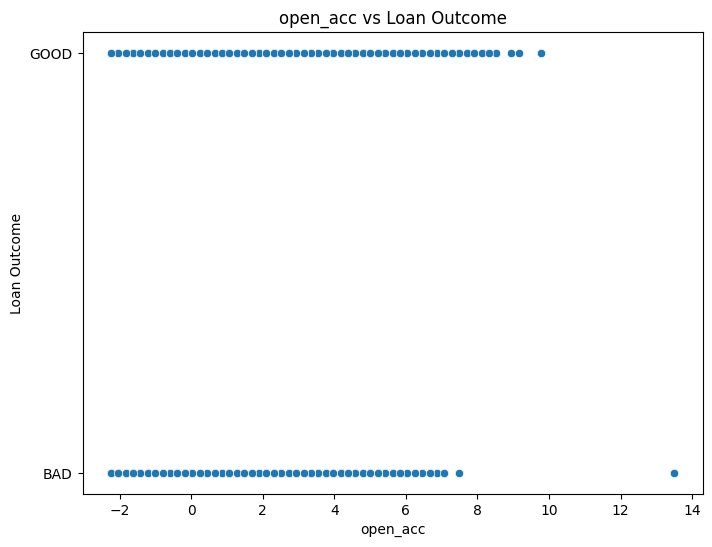

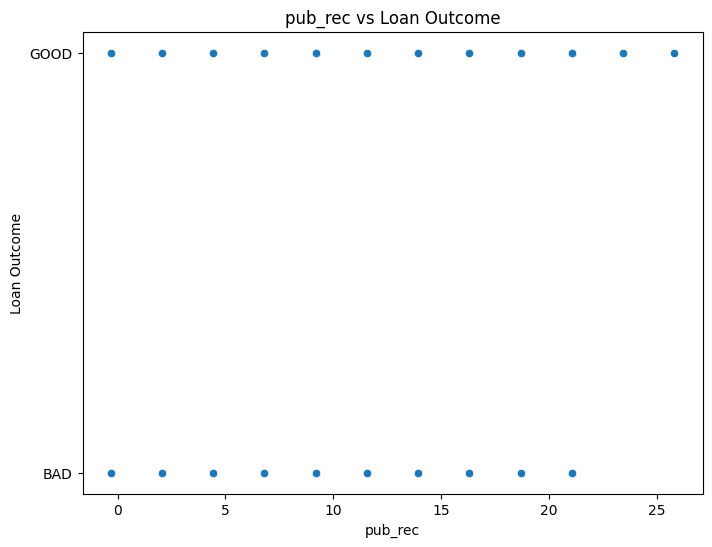

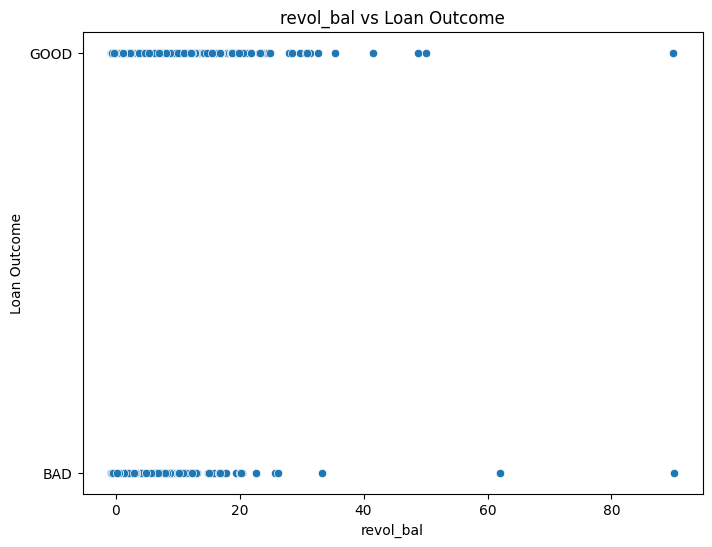

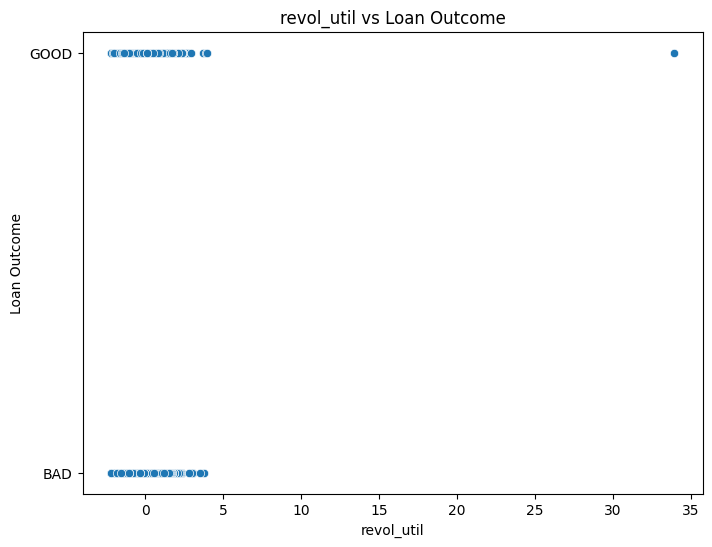

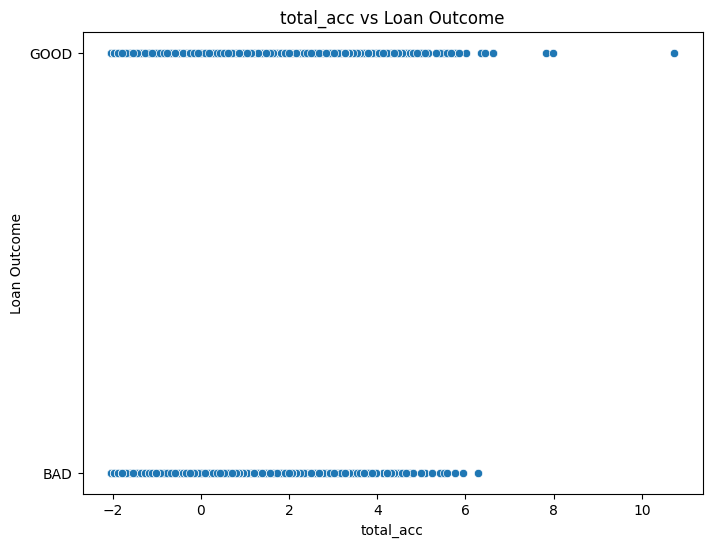

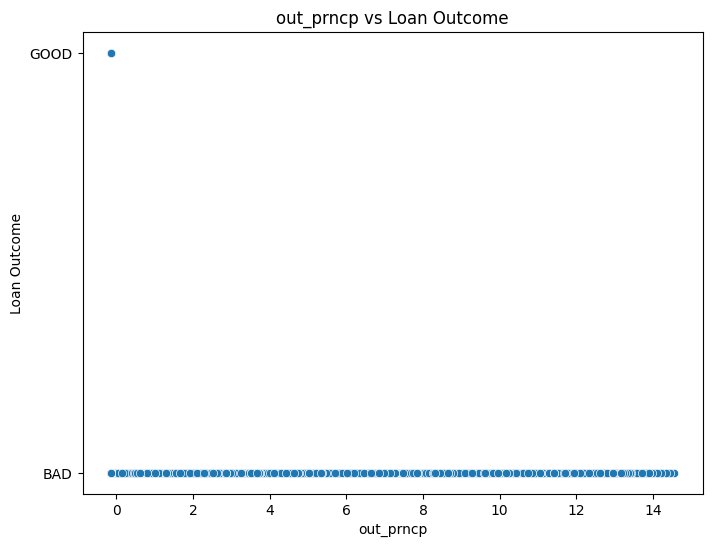

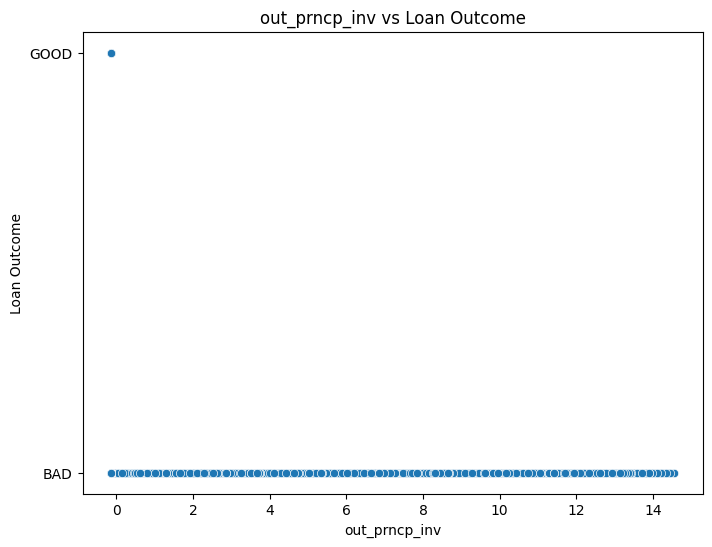

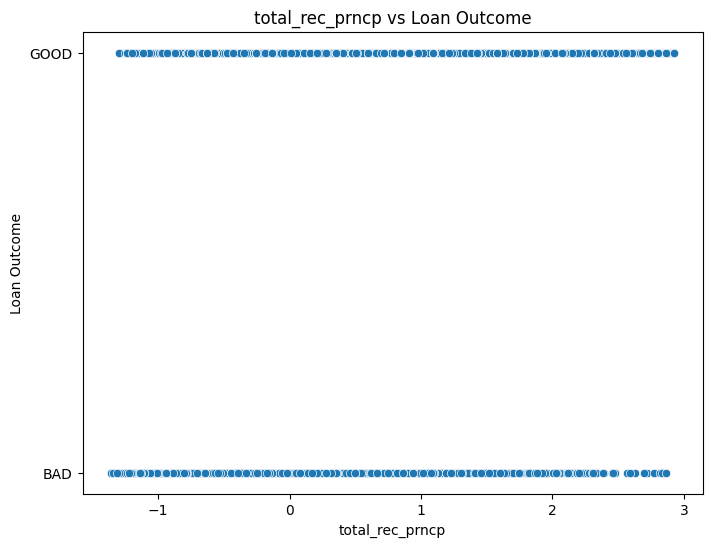

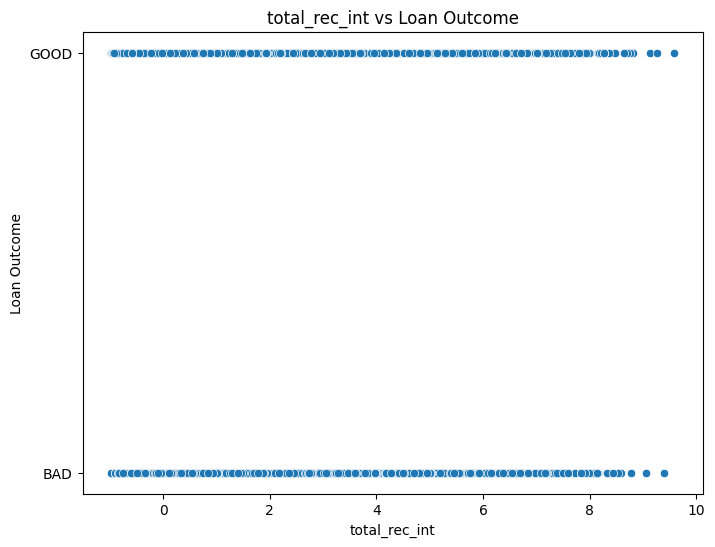

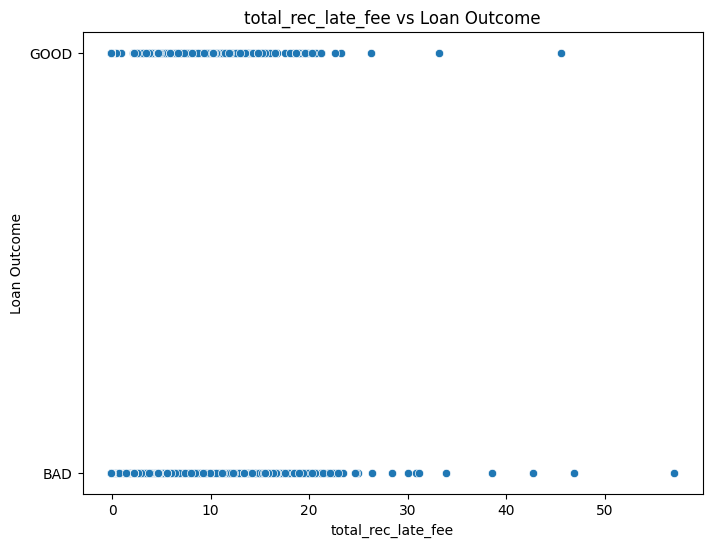

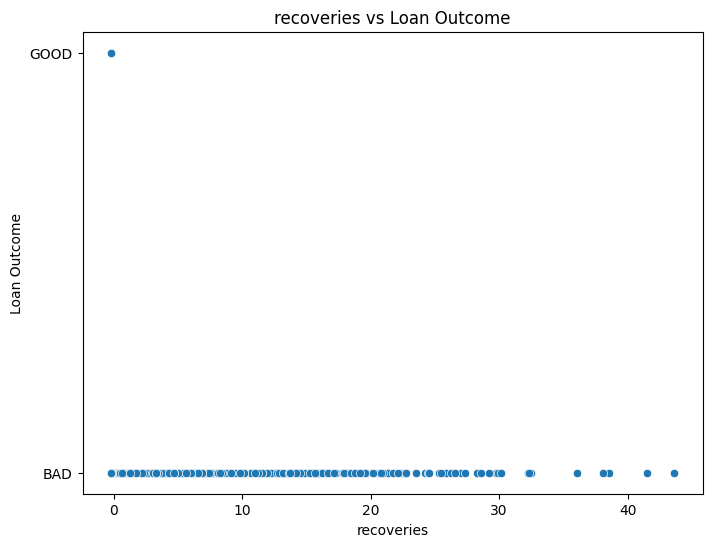

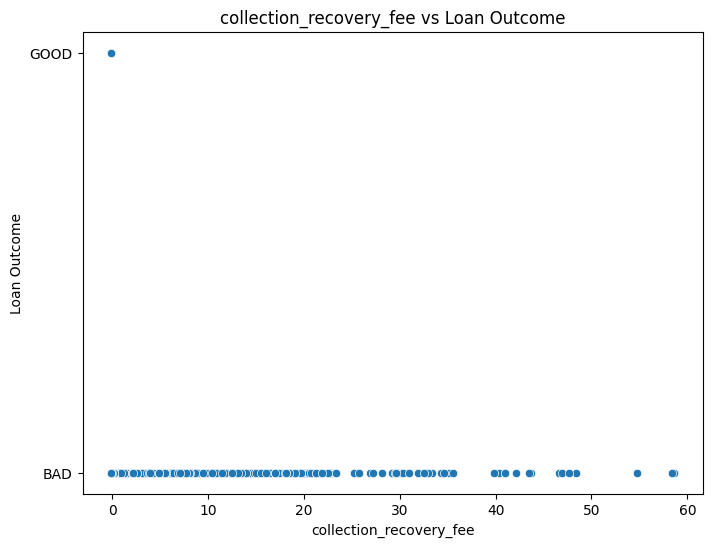

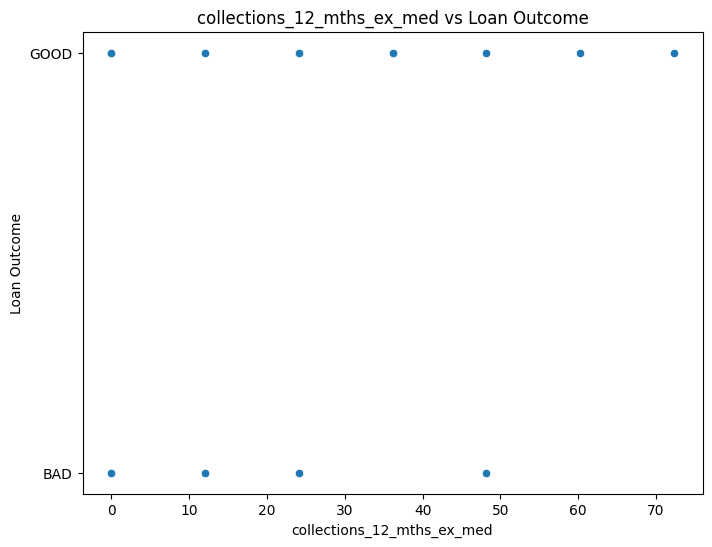

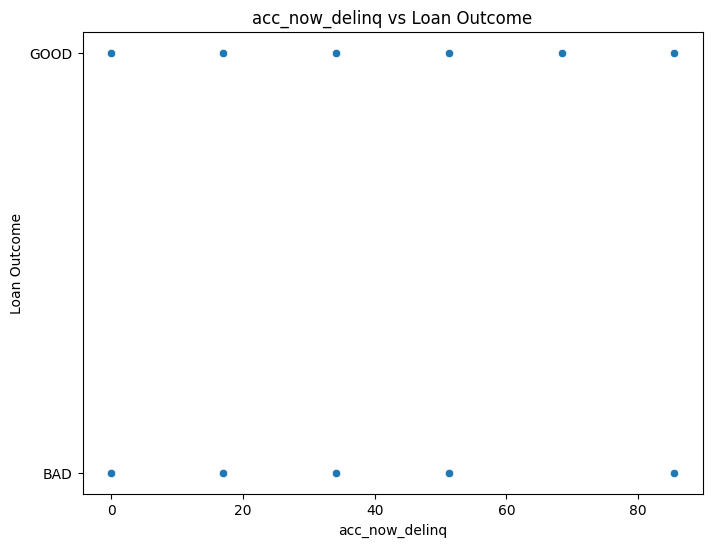

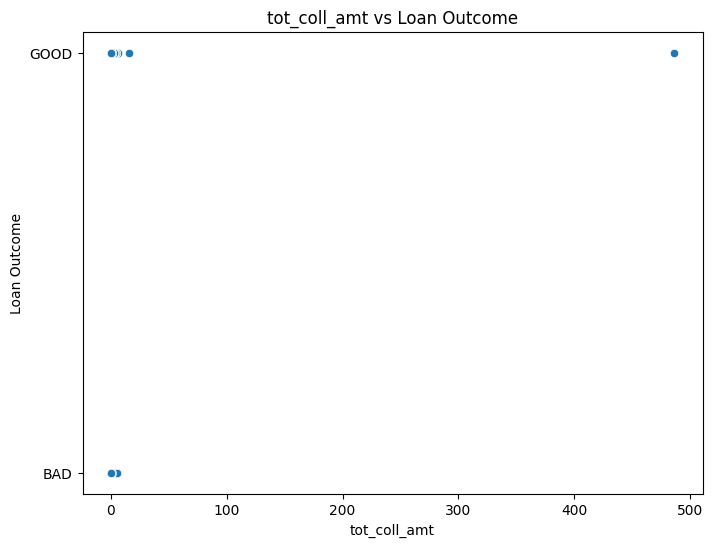

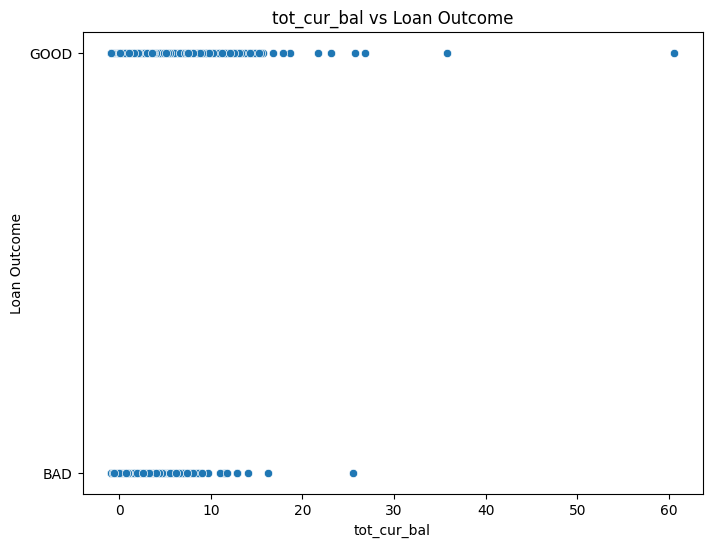

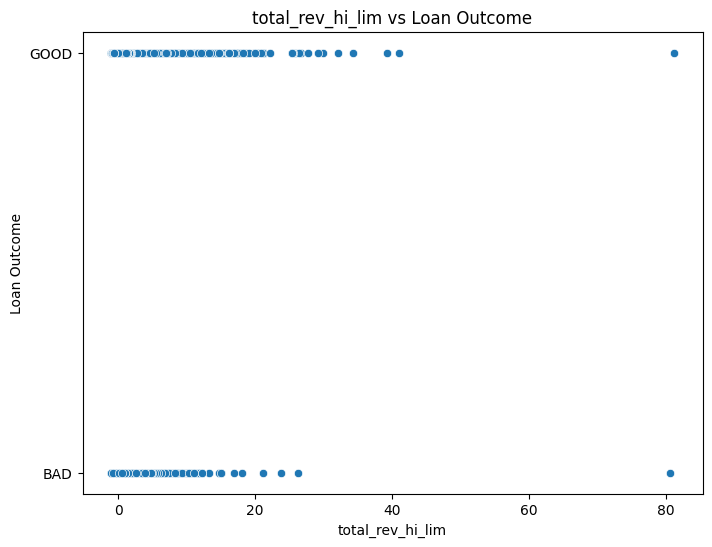

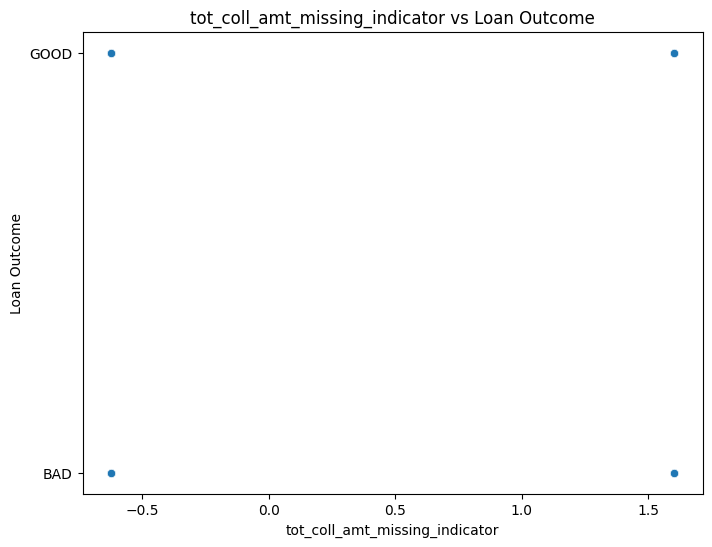

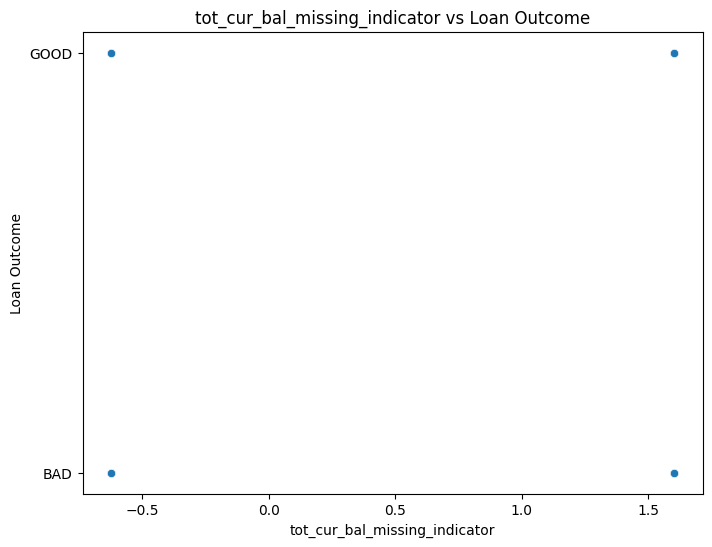

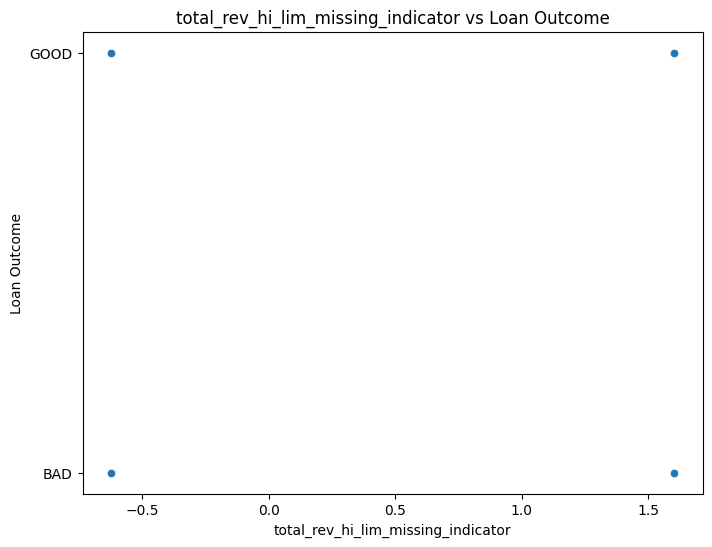

Interpretasi: Cari pola atau tren hubungan antara fitur dan target.


In [26]:
# --- 2. Hubungan Antara Fitur Numerik dengan Target ---
print("\n--- Hubungan Antara Fitur Numerik dengan Target ('loan_outcome') ---")
for col in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='loan_outcome', data=df)
    plt.title(f'{col} vs Loan Outcome')
    plt.xlabel(col)
    plt.ylabel('Loan Outcome')
    plt.show()
print("Interpretasi: Cari pola atau tren hubungan antara fitur dan target.")


--- Hubungan Antara Fitur Kategorikal (Encoded) dengan Target ('loan_outcome') ---


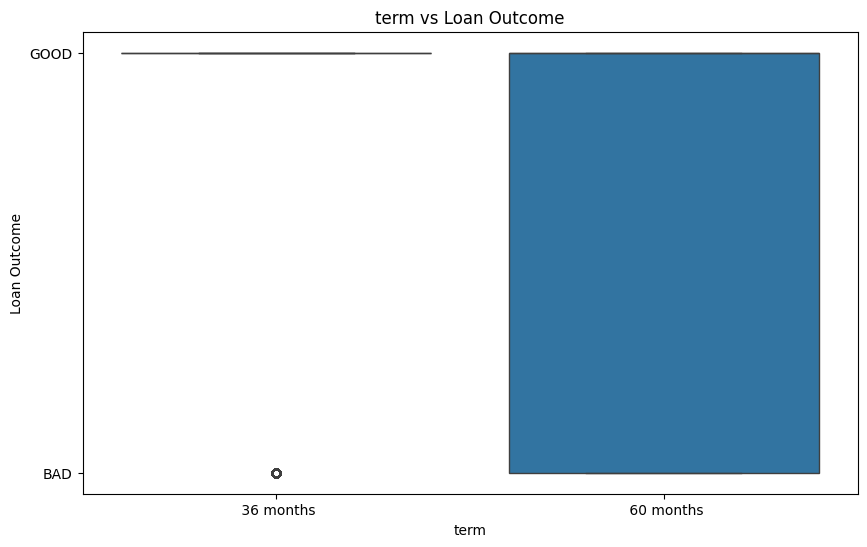

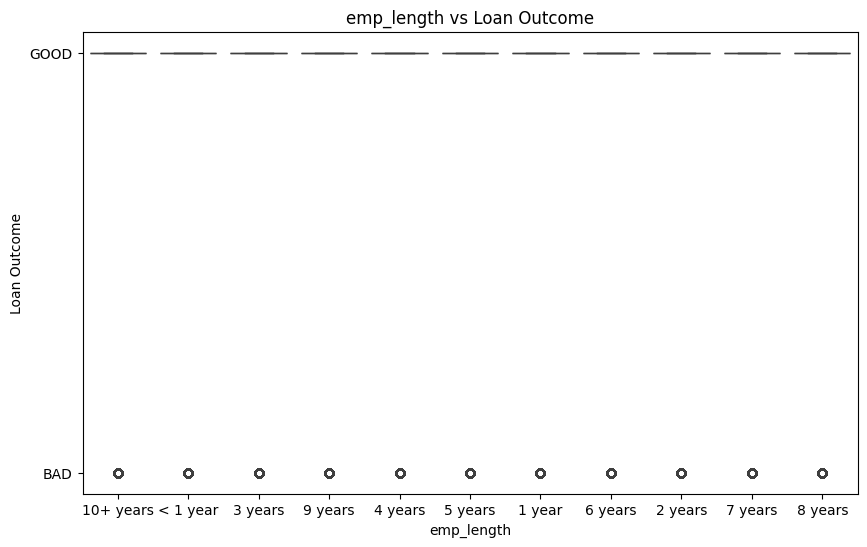

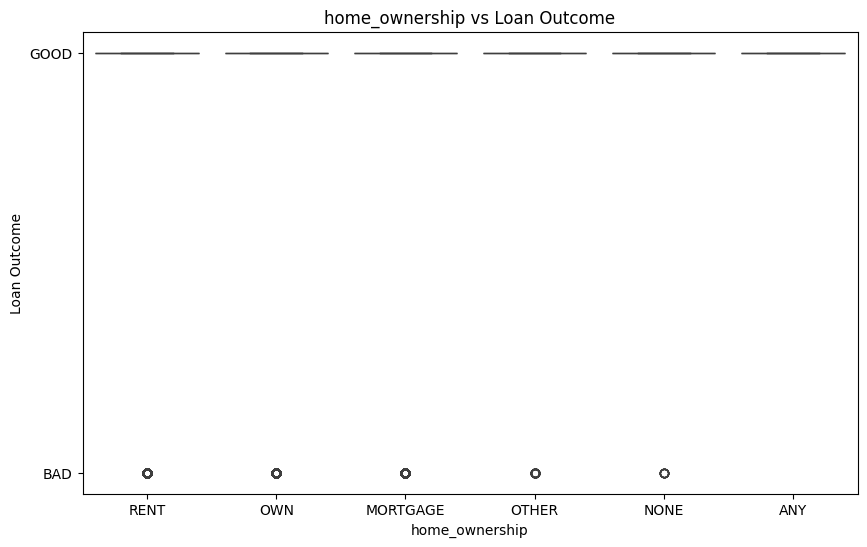

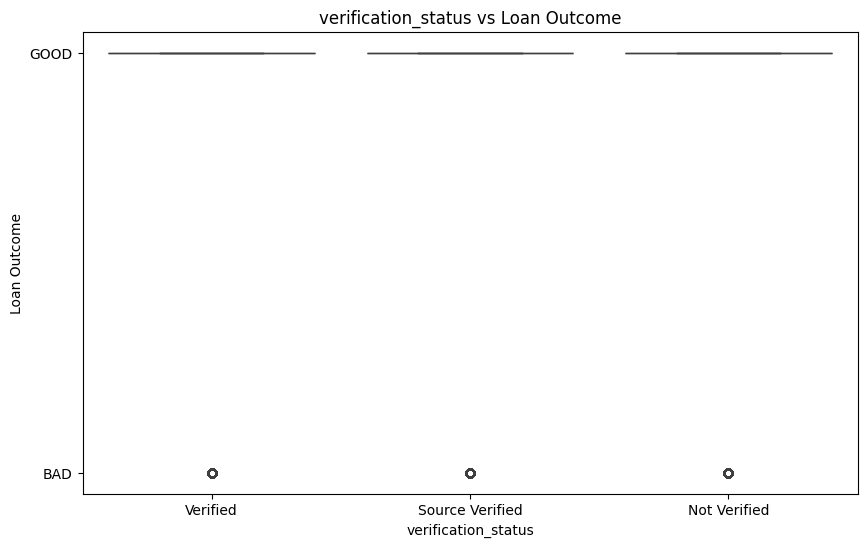

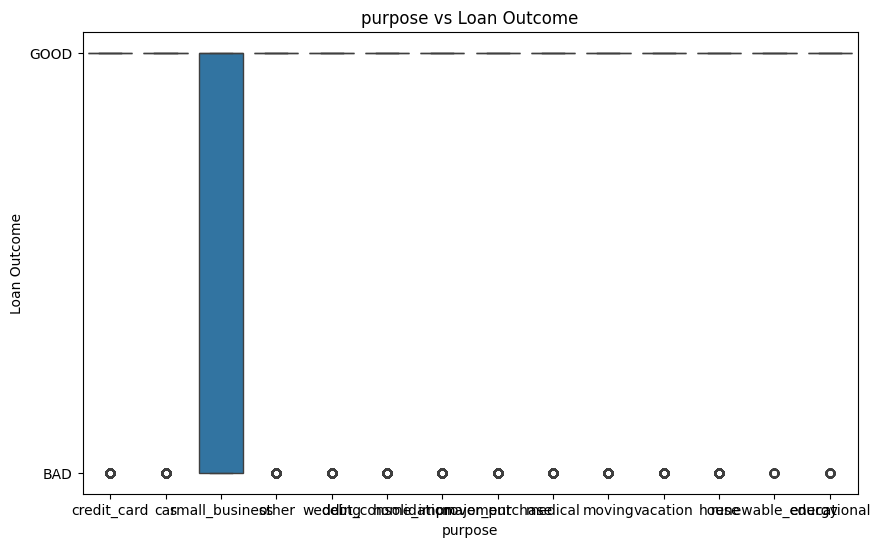

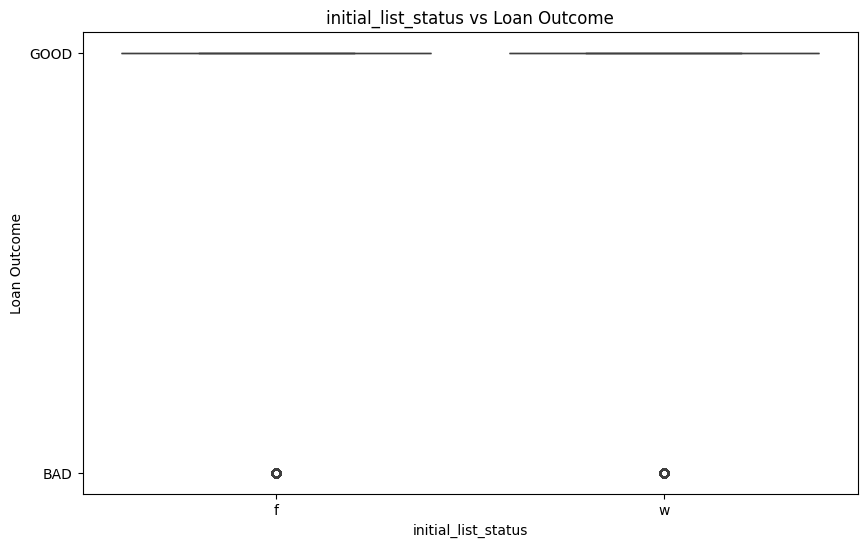

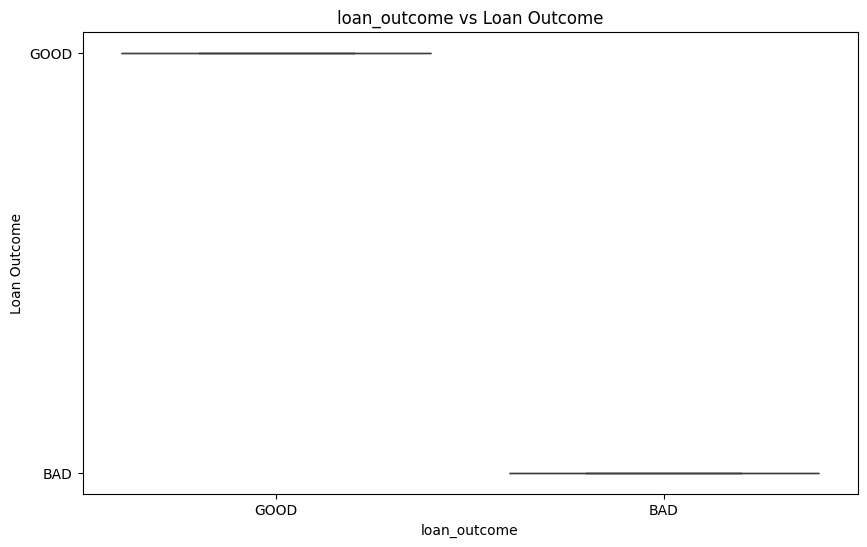

Interpretasi: Perhatikan perbedaan distribusi target di berbagai nilai fitur kategorikal.


In [27]:
# --- 3. Hubungan Antara Fitur Kategorikal (Encoded) dengan Target ---
print("\n--- Hubungan Antara Fitur Kategorikal (Encoded) dengan Target ('loan_outcome') ---")

for col in kategorical_features:
    if df[col].nunique() < 50:  # Batasi untuk visualisasi yang lebih baik
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='loan_outcome', data=df)
        plt.title(f'{col} vs Loan Outcome')
        plt.xlabel(col)
        plt.ylabel('Loan Outcome')
        plt.show()
    else:
        print(f"Kolom '{col}' memiliki terlalu banyak nilai unik untuk box plot yang efektif.")
print("Interpretasi: Perhatikan perbedaan distribusi target di berbagai nilai fitur kategorikal.")



--- Kombinasi Dua Fitur Numerik dengan Warna untuk Target ---


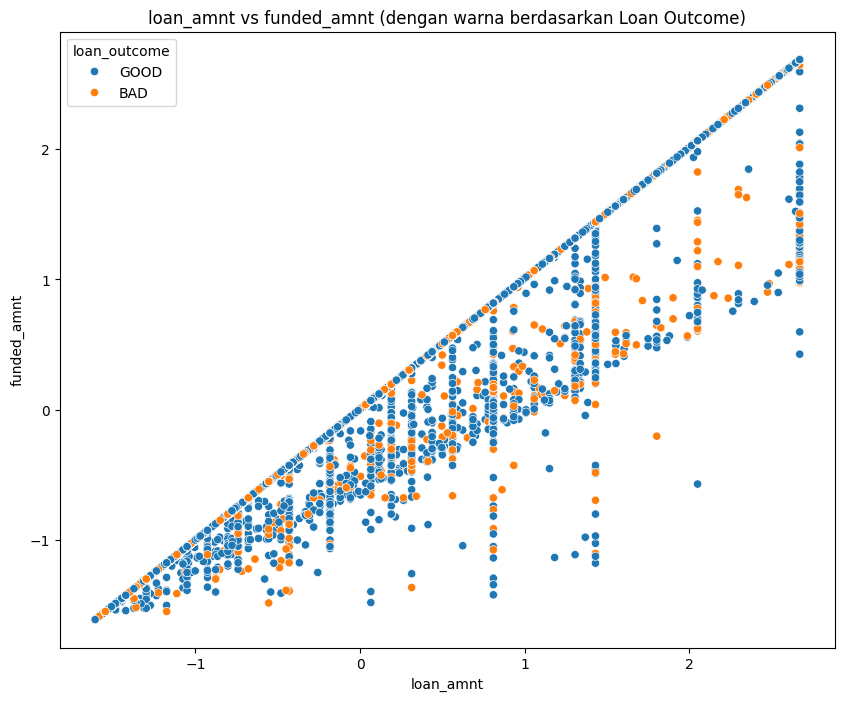

Interpretasi: Cari pemisahan kelas target dalam ruang fitur 2D.


In [28]:
# --- 4. Kombinasi Dua Fitur Numerik dengan Warna untuk Target ---
print("\n--- Kombinasi Dua Fitur Numerik dengan Warna untuk Target ---")
if len(numeric_features) >= 2:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=numeric_features[0], y=numeric_features[1], hue='loan_outcome', data=df)
    plt.title(f'{numeric_features[0]} vs {numeric_features[1]} (dengan warna berdasarkan Loan Outcome)')
    plt.xlabel(numeric_features[0])
    plt.ylabel(numeric_features[1])
    plt.show()
    print("Interpretasi: Cari pemisahan kelas target dalam ruang fitur 2D.")
else:
    print("Tidak cukup fitur numerik untuk membuat scatter plot kombinasi.")

# Data Preparation

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['loan_outcome_encoded'] = label_encoder.fit_transform(df['loan_outcome'])

In [30]:
df = df.drop('loan_outcome', axis=1)

In [31]:
# Identifikasi kolom kategorik (bertipe object)
categorical_cols = df.select_dtypes(include='object').columns

# One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [32]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt_missing_indicator',
       'tot_cur_bal_missing_indicator', 'total_rev_hi_lim_missing_indicator',
       'loan_outcome_encoded', 'term_ 60 months', 'emp_length_10+ years',
       'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years',
       'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
       'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_

In [33]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_outcome_encoded', axis=1)
y = df['loan_outcome_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Data Modelling

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report



logistic_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluation

In [35]:
# Evaluasi model Logistic Regression
print("Evaluasi Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1-Score:", f1_score(y_test, y_pred_logistic))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))

print("\n" + "="*30 + " Random Forest " + "="*30)
# Inisialisasi dan latih model Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Prediksi pada data testing
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]


Evaluasi Logistic Regression:
Accuracy: 0.9933528261006752
Precision: 0.9931019788531706
Recall: 0.9984736912571964
F1-Score: 0.9957805907172996
AUC-ROC: 0.998743350745438

Confusion Matrix:
 [[ 9935   259]
 [   57 37288]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98     10194
           1       0.99      1.00      1.00     37345

    accuracy                           0.99     47539
   macro avg       0.99      0.99      0.99     47539
weighted avg       0.99      0.99      0.99     47539


============================== Random Forest ==============================


In [36]:
# Evaluasi model Random Forest
print("Evaluasi Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Opsional: Interpretasi Koefisien Logistic Regression
print("\nKoefisien Logistic Regression:")
coefficients = pd.DataFrame(logistic_model.coef_[0], index=X_train.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

# Opsional: Feature Importance Random Forest
print("\nFeature Importance Random Forest:")
feature_importances = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)
print(feature_importances.sort_values(ascending=False).head(10)) # Tampilkan 10 fitur terpenting

Evaluasi Random Forest:
Accuracy: 0.9947411598897747
Precision: 0.9946131896850583
Recall: 0.9987146873744812
F1-Score: 0.9966597188819412
AUC-ROC: 0.9993472660641948

Confusion Matrix:
 [[ 9992   202]
 [   48 37297]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     10194
           1       0.99      1.00      1.00     37345

    accuracy                           0.99     47539
   macro avg       0.99      0.99      0.99     47539
weighted avg       0.99      0.99      0.99     47539


Koefisien Logistic Regression:
                                     Coefficient
total_rec_prncp                        18.558507
tot_coll_amt                            1.424489
annual_inc                              0.425142
initial_list_status_w                   0.287178
verification_status_Source Verified     0.259720
...                                          ...
installment                            -6.527992
collec